# Исследование рынка компьютерных игр

### Введение

#### Краткое описание, цель и задачи

Краткое описание:\
Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры, получил исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
В датасете есть данные по продажам игр с 1980 по 2016 год.

Цель - выявить определяющие успешность игры закономерности, которые позволят сделать прогноз на 2017 год.

Задачи:
* Выбрать актуальный период для анализа, основной фактор — эти данные помогут построить прогноз на 2017 год.
* Изучить продажи по платформам, определить есть ли выбросы и выбрать потенциально прибыльные платформы.
* Изучить продажи по жанрам и выбрать наиболее прибыльные жанры.
* Посмотреть, как влияют на продажи отзывы пользователей и критиков, а также рейтинг ESRB.
* Определить портрет пользователя в зависимости от региона.
* Проверить статистические гипотезы.

#### Описание данных

Есть датасет со всеми необходимыми данными: 'games.csv'. 
Укажем, что в его колонках:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Откроем файл с данными и изучим общую информацию 
<a id='general'></a>

Загрузим нужные библиотеки.

In [1]:
! pip install missingno
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from scipy import stats as st

Изучим общую информацию.

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [6]:
data['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [7]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Пропуски есть во многих столбцах:"Name", "Year_of_Release", "Genre", "Critic_Score", "User_Score", "Rating". В "User_Score" есть значение "tbd", которое обработаем. 

В столбцах: "Year_of_Release" и "Critic_Score" надо поменять значения на целочисленные, так как только они там и используются.

Перейдем к разделу 2, где рассмотрим пропуски и дубликаты и сделаем первые выводы.

### Подготовим данные
<a id='prepare'></a>

#### Начнем с того, что все названия столбцов приведем к нижнему регистру. 
<a id='lower_w'></a>

In [8]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Обработаем пропуски и дубликаты
<a id='duplicates'></a>

In [9]:
# нет дубликатов
data.duplicated().sum()

0

In [10]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [11]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [12]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Согласно классификации Entertainment Software Rating Board рейтинг 'K-A' и 'E' - это одно и то же. Поэтому заменим все значения 'K-A' на 'E'.

In [13]:
data.loc[data['rating']=='K-A','rating'] = 'E'

data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

В остальных столбцах нет неявных и явных дубликатов нет.

Пропуски есть в столбцах:"Name", "Year_of_Release", "Genre", "Critic_Score", "User_Score", "Rating".

In [14]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Визуализируем пропуски для наглядности.

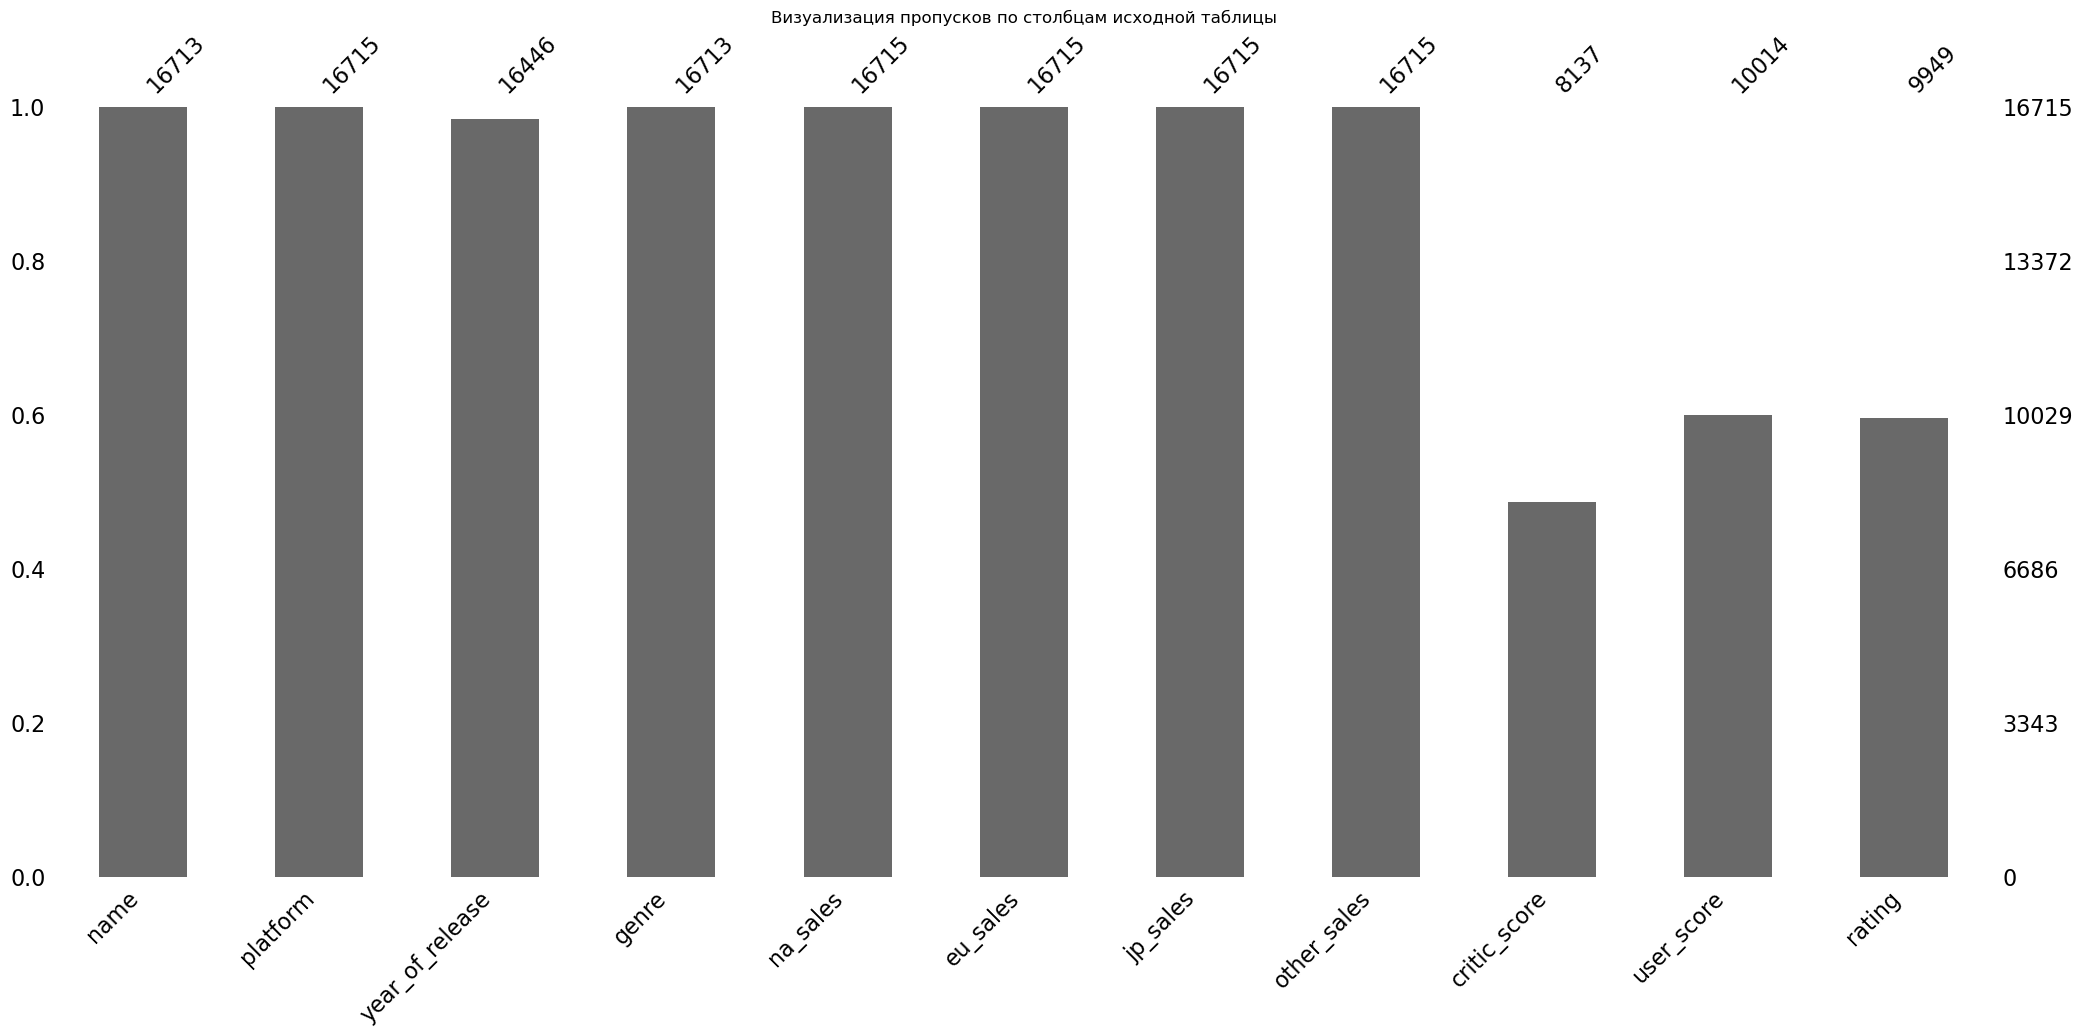

In [15]:
msno.bar(data)
plt.title("Визуализация пропусков по столбцам исходной таблицы")
plt.show()

**Все пропуски в названии игр и жанрах в одних и тех же строчках. Всего 2 таких строчки. Удалим их.**

In [16]:
data.query('name.isna() and genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [17]:
# удалим пропуски
data = data.drop([659,14244])

Этих пропусков очень мало, поэтому причиной их возникновения может быть как небольшой сбой, так и просто отсутствие данных по данной игре для данной платформы "GEN" - "Sega Mega Drive".

**Посмотрим как распределены по платформам и жанрам пропуски в "year_of_release"**

In [18]:
#доля прорусков в стоблце year_of_release по жанрам в долях от общего кол-ва значений

(data.query('year_of_release.isna()').groupby('genre')['platform'].count() /
           data.groupby('genre')['platform'].count() * 100)

genre
Action          1.840309
Adventure       0.767460
Fighting        1.413428
Misc            1.657143
Platform        1.126126
Puzzle          1.896552
Racing          1.841473
Role-Playing    1.134846
Shooter         2.040816
Simulation      1.832761
Sports          1.788756
Strategy        1.464129
Name: platform, dtype: float64

In [19]:
#пропуски в абсолютном выражении

year_miss_count = data.query('year_of_release.isna()').groupby('genre')['platform'].count()
year_miss_count

genre
Action          62
Adventure       10
Fighting        12
Misc            29
Platform        10
Puzzle          11
Racing          23
Role-Playing    17
Shooter         27
Simulation      16
Sports          42
Strategy        10
Name: platform, dtype: int64

Явных перекосов в сторону того или иного жанра нет.

In [20]:
#доля прорусков в стоблце year_of_release по платформам в долях от общего кол-ва значений

(data.query('year_of_release.isna()').groupby('platform')['platform'].count() /
           data.groupby('platform')['platform'].count() * 100)

platform
2600    12.781955
3DO           NaN
3DS      1.538462
DC            NaN
DS       1.394700
GB       1.020408
GBA      1.338200
GC       2.517986
GEN           NaN
GG            NaN
N64      0.940439
NES           NaN
NG            NaN
PC       1.745380
PCFX          NaN
PS       0.584795
PS2      1.573346
PS3      1.878287
PS4           NaN
PSP      1.323408
PSV      0.232558
SAT           NaN
SCD           NaN
SNES          NaN
TG16          NaN
WS            NaN
Wii      2.575758
WiiU          NaN
X360     2.377179
XB       2.548544
XOne          NaN
Name: platform, dtype: float64

In [21]:
data.query('year_of_release.isna()').groupby('platform')['platform'].count()

platform
2600    17
3DS      8
DS      30
GB       1
GBA     11
GC      14
N64      3
PC      17
PS       7
PS2     34
PS3     25
PSP     16
PSV      1
Wii     34
X360    30
XB      21
Name: platform, dtype: int64

Явных перекосов в сторону той или иной платформы нет за исключением платформы 2600. Это игровая приставка начала 1980-ых. Посмотрим, сколько продают игр этой платформы по сравнению с общей суммой продаж.

In [22]:
data['na_sales'].sum() + data['eu_sales'].sum() + data['jp_sales'].sum() + data['other_sales'].sum()

8913.29

In [23]:
data.loc[(data['year_of_release'].isna()) & (
          data['platform'] == '2600'),['eu_sales','na_sales','jp_sales','other_sales']].sum()

eu_sales       0.61
na_sales       9.82
jp_sales       0.00
other_sales    0.07
dtype: float64

Видно, что доля продаж игр для платформы "2600" очень мала. При этом пропущенные значения в столбце "year_of_release" 
распределены достаточно равномерна по жанрам и по платформам. Поэтому можно удалить строки с пропусками в этом столбце.

In [24]:
data = data.dropna(subset = ['year_of_release'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Вероятнее всего по каким-то причинам возникли проблемы с выгрузкой некоторых данных, и год выпуска не прогрузился.

**C пропусками в столбцах "critic_score", "user_score", "rating" сложнее.** \
Таких пропусков очень много. Для "user_score" и "rating" примерно 1/3, а для "critic_score" 1/2 от всего датасета. Заменять их на медианы или средние - опасно, так как можно навредить распределению значений в этих столбцах.

Посмотрим, какую долю в каждом жанре имеют пропущенные значения указанных трех столбцов. 

In [25]:
def missing_count (column, groupby):
    missing_grouped = 0
    missing_grouped = data[data[column].isna()].groupby(groupby)[groupby].count()
    return missing_grouped

In [26]:
# для столбца critic_score

missing_count('critic_score', 'genre') / data.groupby('genre')['genre'].count() * 100

genre
Action          44.027820
Adventure       75.251353
Fighting        51.612903
Misc            70.424172
Platform        44.191344
Puzzle          61.335677
Racing          40.864600
Role-Playing    50.641458
Shooter         28.780864
Simulation      59.393232
Sports          49.479618
Strategy        56.017831
Name: genre, dtype: float64

In [27]:
# для столбца user_score 

missing_count('user_score', 'genre') / data.groupby('genre')['genre'].count() * 100

genre
Action          34.563048
Adventure       64.887858
Fighting        48.387097
Misc            49.506101
Platform        36.332574
Puzzle          41.476274
Racing          30.016313
Role-Playing    48.210668
Shooter         22.839506
Simulation      33.255543
Sports          35.516045
Strategy        48.885587
Name: genre, dtype: float64

In [28]:
# для столбца rating 

missing_count('rating', 'genre') / data.groupby('genre')['genre'].count() * 100

genre
Action          35.107348
Adventure       65.970611
Fighting        48.387097
Misc            49.912841
Platform        36.104784
Puzzle          40.949033
Racing          30.179445
Role-Playing    48.008103
Shooter         23.148148
Simulation      34.772462
Sports          35.906331
Strategy        50.668648
Name: genre, dtype: float64

Доля пропущенных значений в выбранном столбце при разбивке по жанрам игр всегда высокая. 
Поэтому заменять на какие-либо значения даже внутри какого-то жанра не стоит, так как можно исказить данные. 
Поэтому пропуски в этих трех столбцах лучше оставить.

**Посмотрим, какие уникальные значения есть в столбце "user_score"**

In [29]:
data['user_score'].unique()
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Видим, что чаще всего встречается оценка "tbd". В рейтингах такая аббревиатура означает на англ. To Be Determined, что в переводе на русский означает "будет определено позднее". Посмотрим на распределение данной оценки по годам.

In [30]:
data.query('user_score == "tbd"').groupby('year_of_release')['year_of_release'].count()

year_of_release
1997.0      1
1999.0      8
2000.0     43
2001.0     82
2002.0    192
2003.0     95
2004.0    107
2005.0    121
2006.0    124
2007.0    192
2008.0    326
2009.0    405
2010.0    331
2011.0    217
2012.0     24
2013.0     15
2014.0     21
2015.0     38
2016.0     34
Name: year_of_release, dtype: int64

Если бы такая оценка стояла у самых новых игр, то можно было бы предположить, что ее не успели сформировать. Но мы видим, 
что чаще всего таккая оценка у игр с 2002 по 2011 год. Т.е. можно сделать вывод, что "tbd" в нашей таблице означает, что оценка не определена и определена уже не будет. Вероятно, пользователи неохотно ставят оценки в некоторых случаях, и не набрали нужный кворум.

In [31]:
# доли tbd в оценке пользователя по жанрам

data.query('user_score == "tbd"').groupby('genre')['genre'].count() / data.groupby('genre')['genre'].count() * 100

genre
Action          11.127910
Adventure       12.064965
Fighting         4.420550
Misc            25.566531
Platform        15.375854
Puzzle          36.555360
Racing          18.678630
Role-Playing     2.025658
Shooter          7.330247
Simulation      27.187865
Sports          17.606245
Strategy         5.794948
Name: genre, dtype: float64

In [32]:
# доли tbd в оценке пользователя по платформам

data.query('user_score == "tbd"').groupby('platform')['genre'].count() / data.groupby('platform')['genre'].count() * 100

platform
2600          NaN
3DO           NaN
3DS     10.546875
DC            NaN
DS      35.077793
GB            NaN
GBA     31.812577
GC      18.450185
GEN           NaN
GG            NaN
N64           NaN
NES           NaN
NG            NaN
PC       5.120167
PCFX          NaN
PS       3.697479
PS2     11.095440
PS3      6.661562
PS4      1.530612
PSP      9.891031
PSV      1.631702
SAT           NaN
SCD           NaN
SNES          NaN
TG16          NaN
WS            NaN
Wii     33.281493
WiiU     3.401361
X360     6.737013
XB      18.181818
XOne     4.453441
Name: genre, dtype: float64

С 2012 года не так много непроставленных оценок, то есть по наиболее свежим играм оценки есть. С одной стороны - это хорошо для дальнейшего анализа. С другой наличие большой доли "tbd" в оценках может говорить, о том, что платформа старая. Так и есть, наибольшие доли оценок "tbd" у платформ Wii, DS, GBA, XB, GC.
* GC - Nintendo GameCube - поддержка прекращена в 2007 (https://ru.wikipedia.org/wiki/Nintendo_GameCube#Библиотека_игр)
* XB - Xbox - поддержка прекращена в 2009 (https://ru.wikipedia.org/wiki/Xbox)
* GBA - Game Boy Advance - поддержка прекращена в 2008 (https://ru.wikipedia.org/wiki/Game_Boy_Advance)
* DS - Nintendo DS - поддержка прекращена в 2013 (https://ru.wikipedia.org/wiki/Nintendo_DS)
* Wii - домашняя консоль фирмы Nintendo - поддержка прекращена в 2013 (https://ru.wikipedia.org/wiki/Wii)

Так как надо будет проводить в дальнейшем операции с оценкой пользователей, то лучше всего заменить "tbd" на пропуск, т.е. "Nan". Для жанров, платформ, где высокая доля значений "tbd" - это вынужденная мера. Заменять значения на медиану или среднюю может быть некорректно. Для остальных жанров и платформ - это не должно привести к значительным искажениям.

In [33]:
# заполним все пропуски значения "tbd" на Nan
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [34]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

#### Преобразуем данные в нужные типы
<a id='types'></a>

В столбцах: "year_of_release" и "user_score" надо поменять значения на int и float соответственно, так как именно эти типы данных там используются.

In [35]:
data['year_of_release'] = pd.to_numeric(data['year_of_release'], downcast='integer')
data['user_score'] = pd.to_numeric(data['user_score'], downcast='float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float32
 10  rating           9768 non-null   object 
dtypes: float32(1), float64(5), int16(1), object(4)
memory usage: 1.3+ MB


In [36]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
<a id='sum'></a>

In [37]:
data["total_sales"] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float32
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float32(1), float64(6), int16(1), object(4)
memory usage: 1.5+ MB


**Выводы по разделу 2:**
* полных дубликатов обнаружено не было, но в столбце Entertainment Software Rating Board рейтинг 'K-A' был заменен на 'E', так как это одно и то же; 
* строки с пропусками в "name", "genre" и "year_of_release" были удалены, так как эти строки не влияют на наше исследование;
* значение "tbd" в столбце с оценкой пользователя означает отсутствие оценки. Поэтому заменили значение на пропуск NaN;
* создали новый столбец с данными по продажам во всех регионах по каждой игре.

### Проведем исследовательский анализ данных
<a id='research'></a>

#### Посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды
<a id='year_product'></a>

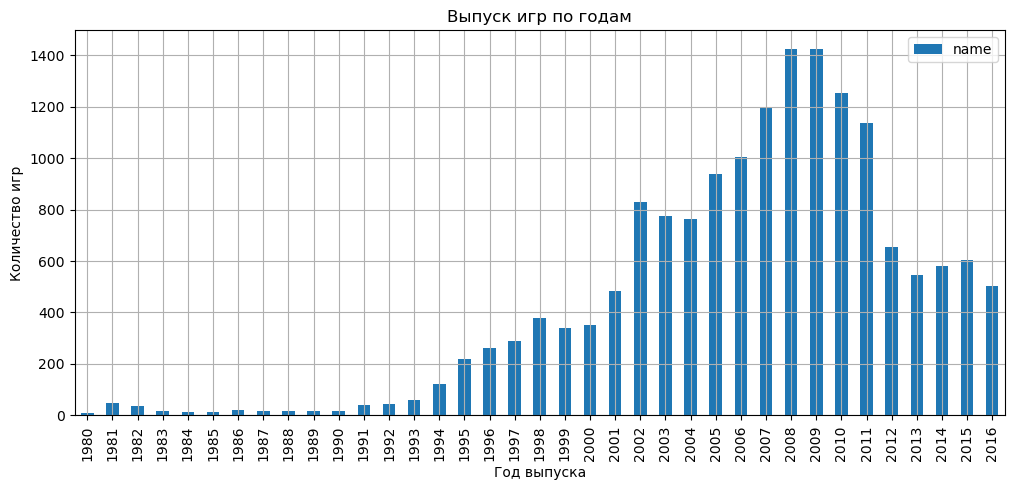

In [38]:
data.pivot_table(index = 'year_of_release', values = 'name', aggfunc='count').plot(
grid = True, kind = 'bar', figsize = (12,5), y='name')

plt.ylabel('Количество игр')

plt.xlabel('Год выпуска')

plt.title("Выпуск игр по годам")

plt.show()

Видим, что распределение сильно скошено влево. При этом с 2002 года начинается заметный рост в продажах игр. 
Поэтому для дальнейшего анализа факторов успеха игры можно рассматривать период с 2002 года по 2016 включительно. В случаях, когда надо будет брать самые актуальные данные, можно выбрать 2015-2016 год. Но этих данных может быть мало для некоторых наших исследований.

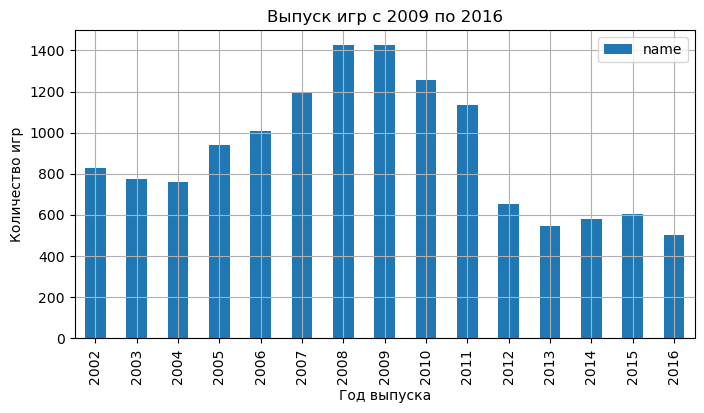

In [39]:
data.query('2002 <= year_of_release <= 2016').pivot_table(
index = 'year_of_release', values = 'name', aggfunc='count').plot(grid = True, kind = 'bar', figsize = (8,4), y='name')

plt.ylabel('Количество игр')

plt.xlabel('Год выпуска')

plt.title("Выпуск игр c 2009 по 2016")

plt.show()

Продажи резко упали после пика в 2009 году, и находятся на стабильном уровне с 2012 года.

#### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Посмотрим за какой характерный срок появляются новые и исчезают старые платформы.
<a id='platform_sales'></a>

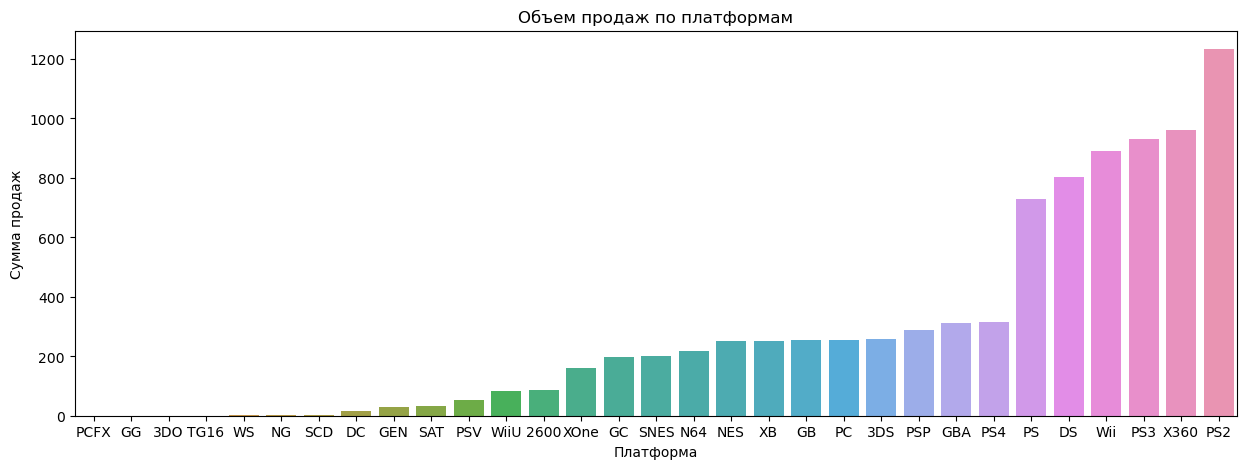

In [40]:
plt.figure(figsize=(15, 5))

platform_sales = data.groupby('platform').agg(total_sales = ('total_sales', 'sum')).sort_values(by = 'total_sales')

sns.barplot(x = platform_sales.index, y ='total_sales', data = platform_sales)

plt.ylabel('Сумма продаж')

plt.xlabel('Платформа')

plt.title("Объем продаж по платформам")

plt.show()

Посмотрим на популярные платформы 2015 и 2016 году. 

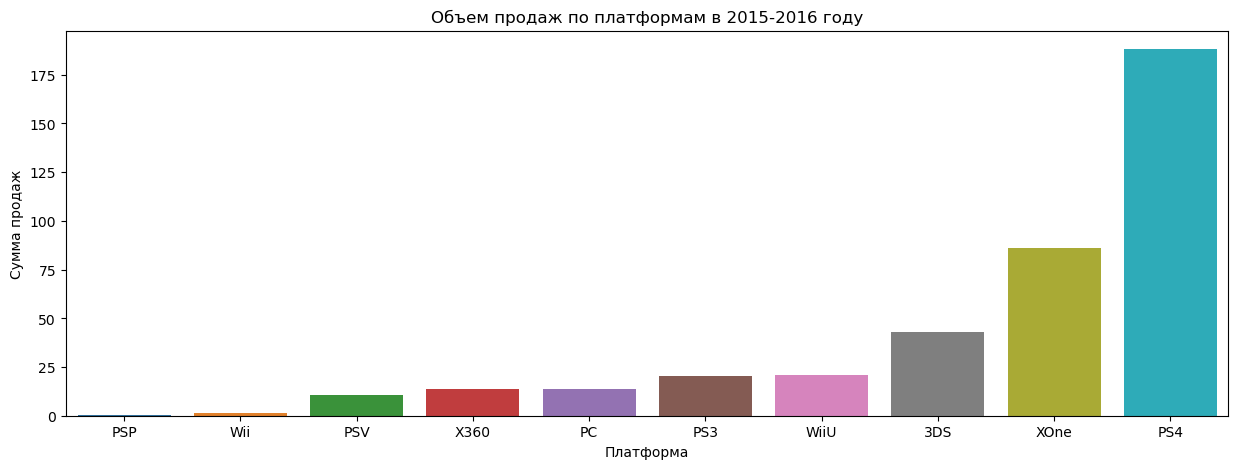

In [41]:
plt.figure(figsize=(15, 5))

platform_sales_2015 = data.query('2015 <= year_of_release').groupby('platform').agg(
                      total_sales = ('total_sales', 'sum')).sort_values(by = 'total_sales')

sns.barplot(x = platform_sales_2015.index, y ='total_sales', data = platform_sales_2015)

plt.ylabel('Сумма продаж')

plt.xlabel('Платформа')

plt.title("Объем продаж по платформам в 2015-2016 году")

plt.show()

Видим, что очень сильно выделяется PS4. На всех остальных платформах продажи менее 100 млн. копий.

Возьмем те платформы, для которых было продано в сумме более 300 млн.копий.

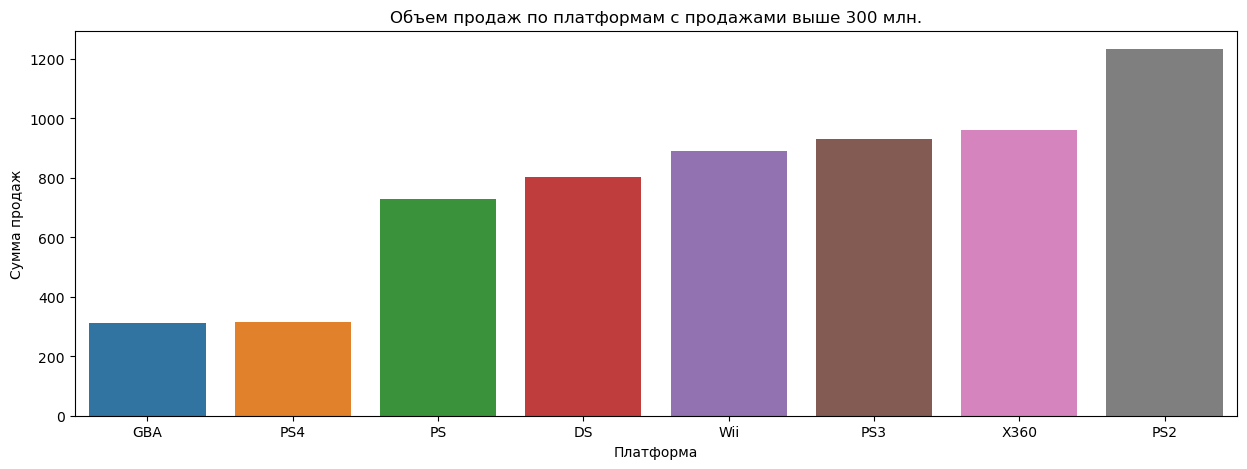

In [42]:
platform_sales_filtered = platform_sales.query('total_sales > 300')

plt.figure(figsize=(15, 5))

sns.barplot(x = platform_sales_filtered.index, y ='total_sales', data = platform_sales_filtered)

plt.ylabel('Сумма продаж')

plt.xlabel('Платформа')

plt.title("Объем продаж по платформам с продажами выше 300 млн.")

plt.show()

In [43]:
platform_sales_filtered.sort_values(by = "total_sales")

,total_sales
platform,
GBA,312.88
PS4,314.14
PS,727.58
DS,802.78
Wii,891.18
PS3,931.34
X360,961.24
PS2,1233.56


Посмотрим как по годам распределены продажи у каждой из этих платформ:

In [44]:
def platform_life (platform_name):
    platform_type = data.loc[data["platform"] == platform_name].groupby("year_of_release").agg(total_sales = (
        'total_sales', 'sum'))
    
    plt.figure(figsize=(15, 5))

    platform_bar_chart=sns.barplot(y = "total_sales", x = platform_type.index, data = platform_type)
    
    plt.ylabel('Сумма продаж')

    plt.xlabel('Года')

    plt.title("platform_name")
    
    return platform_bar_chart, plt.ylabel('Сумма продаж'), plt.xlabel('Года'), plt.title(platform_name)

In [45]:
#список для сбора инфор-ции о сроке жизни платформы
life_list=[]

**Платформа GBA**

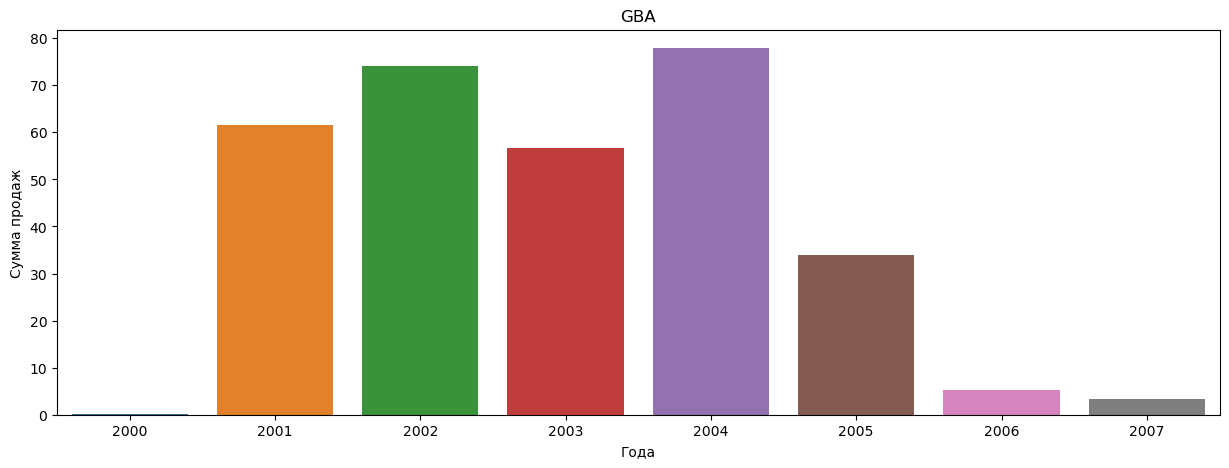

In [46]:
platform_life("GBA")

plt.show()

Получаем, что наиболее активно использовалась платформа с 2001 по 2005 год включительно. Это 5 лет.

In [47]:
life_list.append(5)

**Патформа PS4**

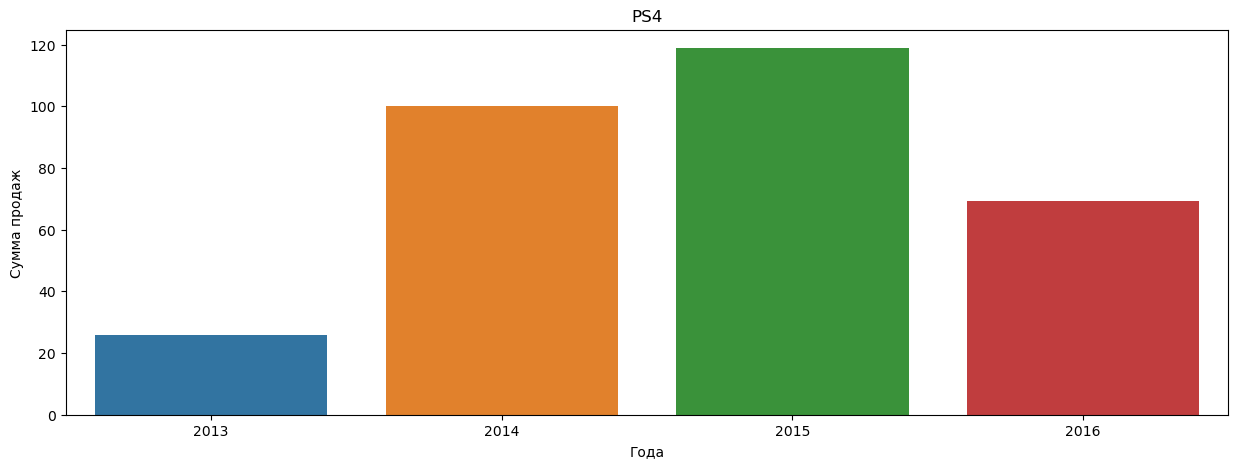

In [48]:
platform_life("PS4")

plt.show()

Платформа еще молодая, поэтому рано делать о ней вывод.

**Платформа PS**

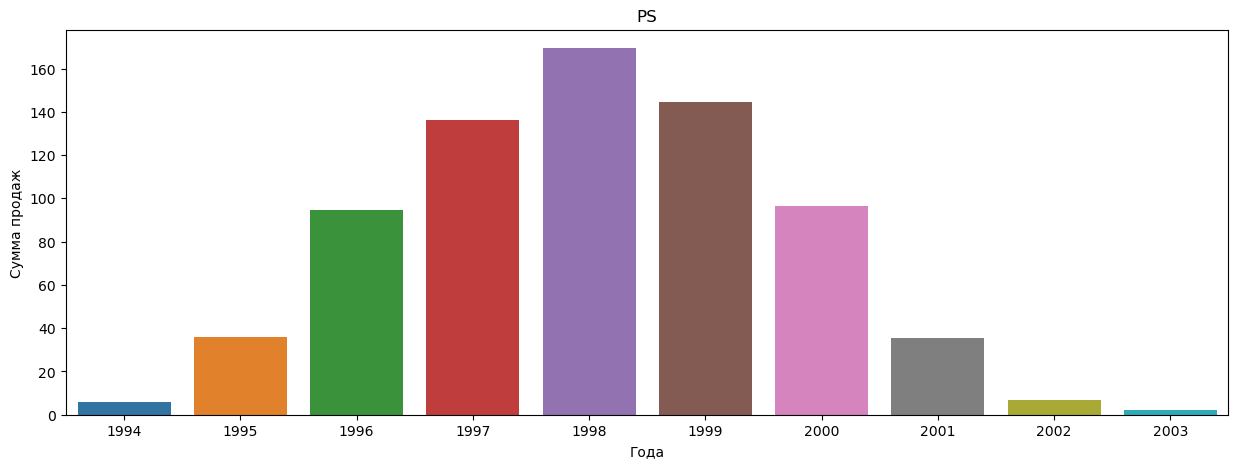

In [49]:
platform_life("PS")

plt.show()

Получаем, что наиболее активно использовалась платформа с 1995 по 2001 год включительно. Это 7 лет.

In [50]:
life_list.append(7)

**Платформа DS**

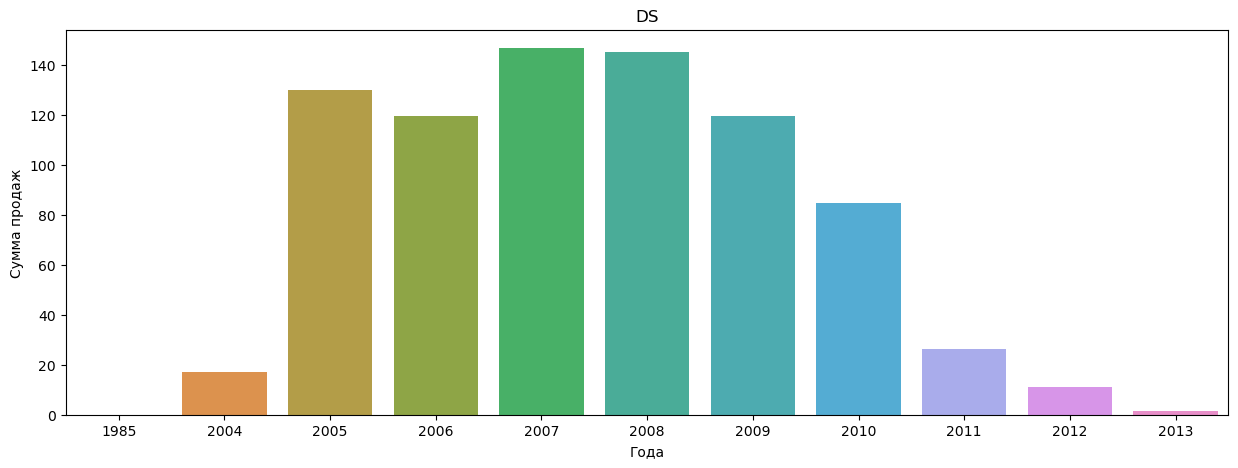

In [51]:
platform_life("DS")

plt.show()

Получаем, что наиболее активно использовалась платформа с 2004 по 2011 год включительно. Это 8 лет.

In [52]:
life_list.append(8)

**Платформа Wii**

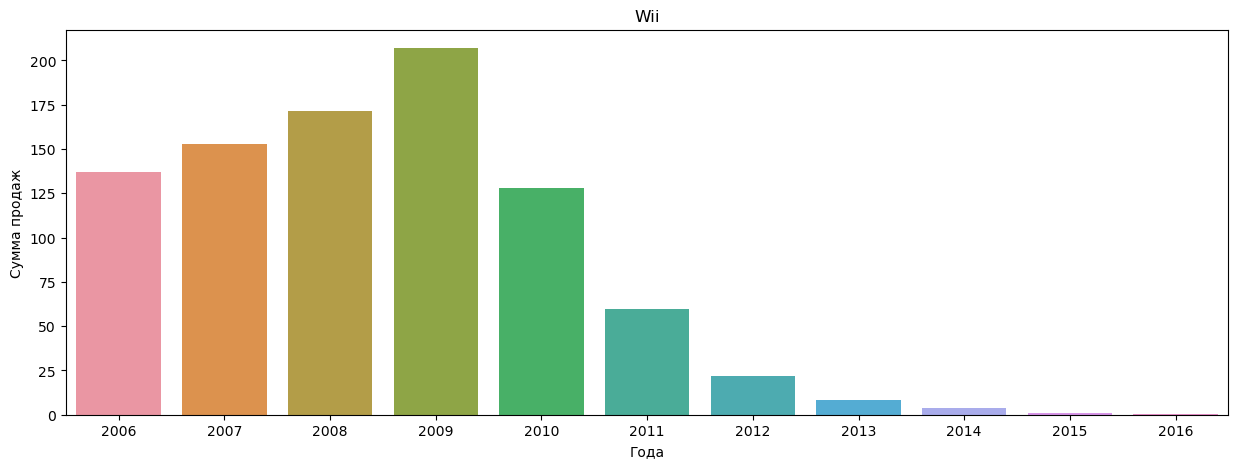

In [53]:
platform_life("Wii")

plt.show()

Получаем, что наиболее активно использовалась платформа с 2006 по 2011 год включительно. Это 6 лет.

In [54]:
life_list.append(6)

**Платформа PS3**

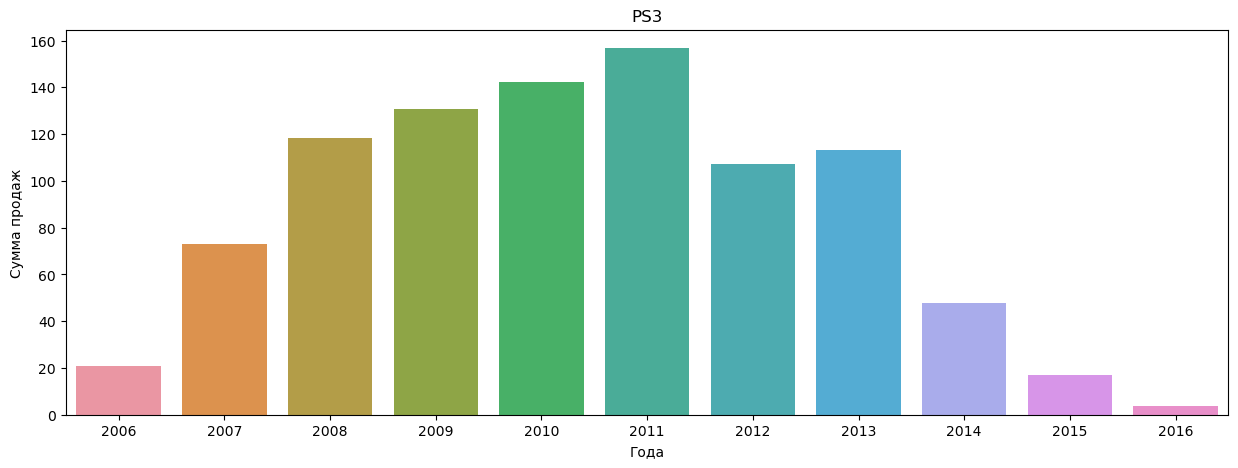

In [55]:
platform_life("PS3")

plt.show()

Получаем, что наиболее активно использовалась платформа с 2007 по 2014 год включительно. Это 8 лет.

In [56]:
life_list.append(8)

**Платформа X360**

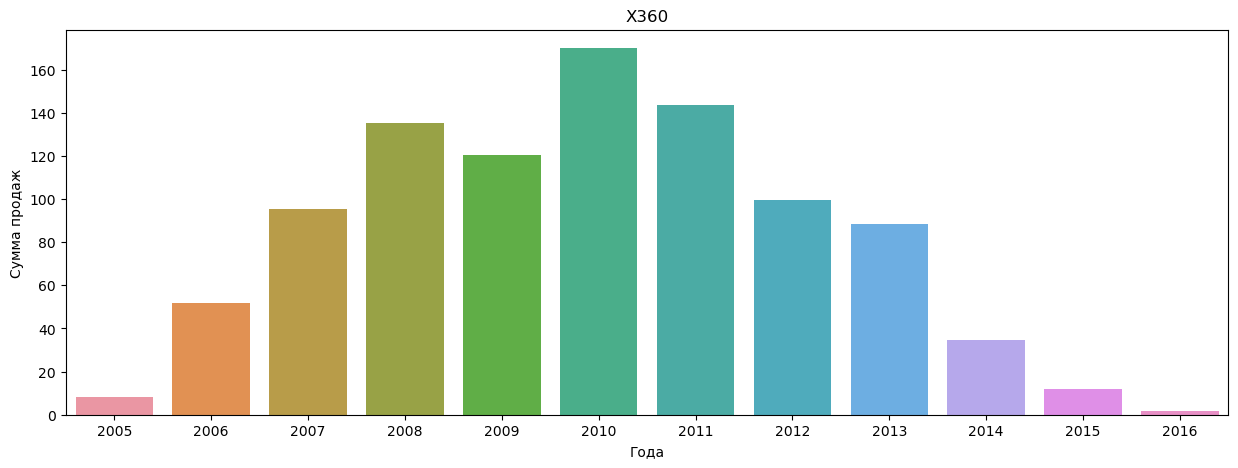

In [57]:
platform_life("X360")

plt.show()

Получаем, что наиболее активно использовалась платформа с 2006 по 2014 год включительно. Это 9 лет.

In [58]:
life_list.append(9)

**Платформа PS2**

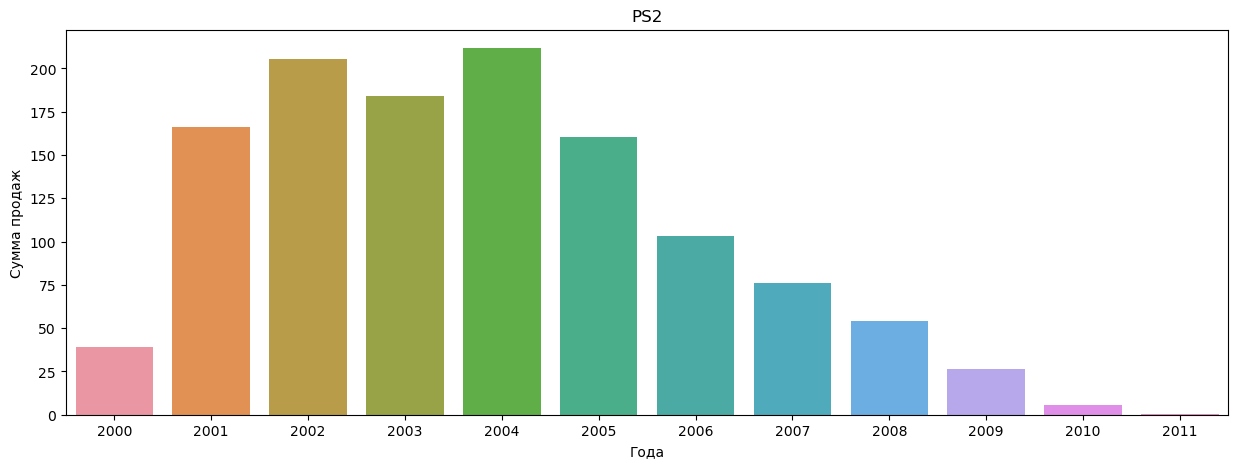

In [59]:
platform_life("PS2")

plt.show()

Получаем, что наиболее активно использовалась платформа с 2000 по 2009 год включительно. Это 10 лет.

In [60]:
life_list.append(10)

In [61]:
# life_list
print(f'Итого получаем, что средний срок жизни игровой платформы - это {sum(life_list)/len(life_list):.2} года')

Итого получаем, что средний срок жизни игровой платформы - это 7.6 года


Теперь узнаем как часто появлялись новые платформы.

In [62]:
platform_start = data.groupby('platform')['year_of_release'].agg('first').sort_values()
platform_start

platform
2600    1982
NES     1985
SNES    1990
GEN     1992
GG      1992
SCD     1993
NG      1994
3DO     1995
TG16    1995
SAT     1995
GB      1996
PCFX    1996
N64     1996
PS      1997
DC      1998
WS      2000
GC      2001
GBA     2002
XB      2004
PS2     2004
PSP     2005
Wii     2006
DS      2006
PC      2009
X360    2010
3DS     2013
PS3     2013
PSV     2014
WiiU    2014
PS4     2015
XOne    2015
Name: year_of_release, dtype: int16

In [63]:
new_platform = 0
summary = 0
for index in range(1, len(platform_start)):
    summary = summary + platform_start[index] - platform_start[index - 1]
    new_platform = summary / len(platform_start)
print(new_platform)

1.064516129032258


In [64]:
print('Итого получаем, что в среднем новые платформы появляются каждый год.')

Итого получаем, что в среднем новые платформы появляются каждый год.


**Краткие выводы по разделам 3.1 и 3.2:**

* для определения предпочтений покупателя по жанрам и платформа целесообразно брать самые актуальные данные, то есть 2015 и 2016 года;
* продажи резко упали после пика в 2009 году, и находятся на стабильном уровне с 2012 года;
* в среднем новые платформы появляются каждый год;
* средний срок жизни игровой платформы - это 7.6 года.

#### Проанализируем продажи по различным платформам

В первую очередь посмотрим, какие продажи у разных платформ за выбраннй период с 2002 по 2016 год.

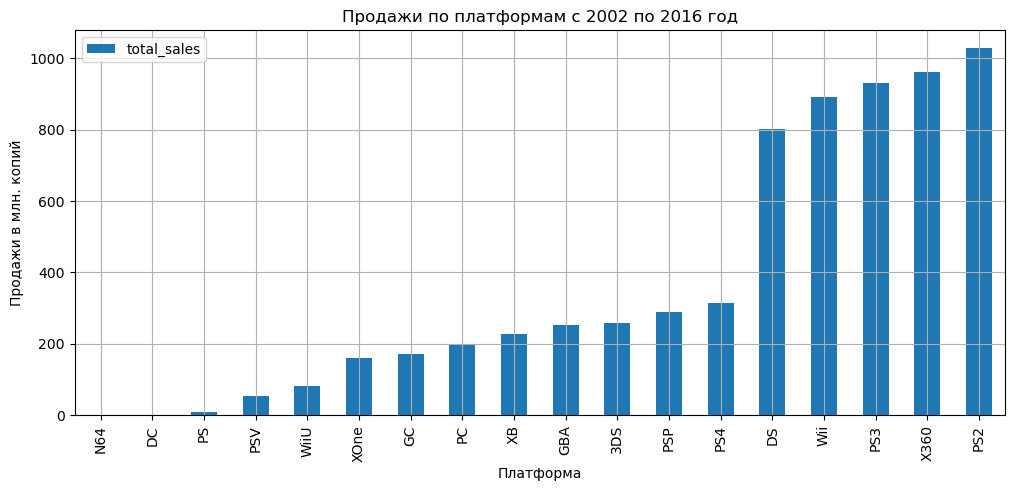

In [65]:
data.query('2002 <= year_of_release').groupby('platform').agg(
    total_sales = ('total_sales', 'sum')).sort_values(by = 'total_sales').plot(
    grid = True, kind = 'bar', figsize = (12,5))

plt.ylabel('Продажи в млн. копий')

plt.xlabel('Платформа')

plt.title("Продажи по платформам с 2002 по 2016 год")

plt.show()

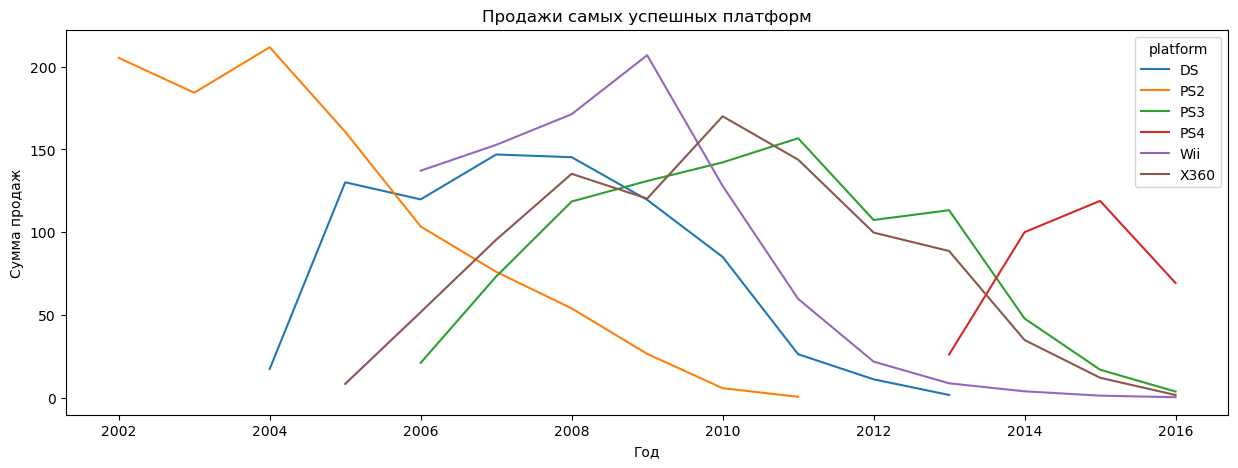

In [66]:
data_filtered_grouped = (
data.query('2002 <= year_of_release and platform in["PS4","DS","Wii","PS3","X360","PS2"]').groupby(
['platform','year_of_release']).agg(total_sales=('total_sales', 'sum')))

plt.figure(figsize=(15, 5))

sns.lineplot(data = data_filtered_grouped, x ='year_of_release', y = 'total_sales', hue='platform')

plt.ylabel('Сумма продаж')

plt.xlabel('Год')

plt.title("Продажи самых успешных платформ")

plt.show()

Можно выделить платформы PS2, X360, PS3, Wii, DS, PS4 как платформы с наибольшим количеством проданных игр.
PS4 на момент исследования новая платформа, но ее можно тоже взять, так как из новых платформ она единственная показывает большие продажи.

**Построим диаграммы размаха по продажам в млн.копий для каждой платформы**

**PS2**

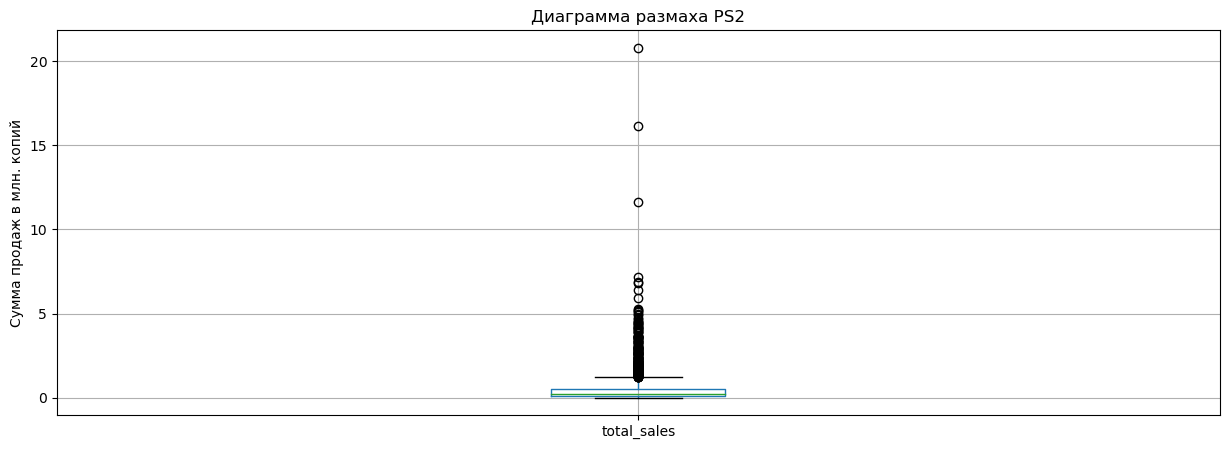

In [67]:
data_filtered = data.query('2002 <= year_of_release and platform in["PS4","DS","Wii","PS3","X360","PS2"]')

plt.figure(figsize=(15, 5))

data_filtered[data_filtered['platform'] == 'PS2'].boxplot('total_sales')

plt.ylabel('Сумма продаж в млн. копий')

plt.title("Диаграмма размаха PS2")

plt.show()

Для наглядности покажем усеченный график, чтобы был виден межквартильный размах.

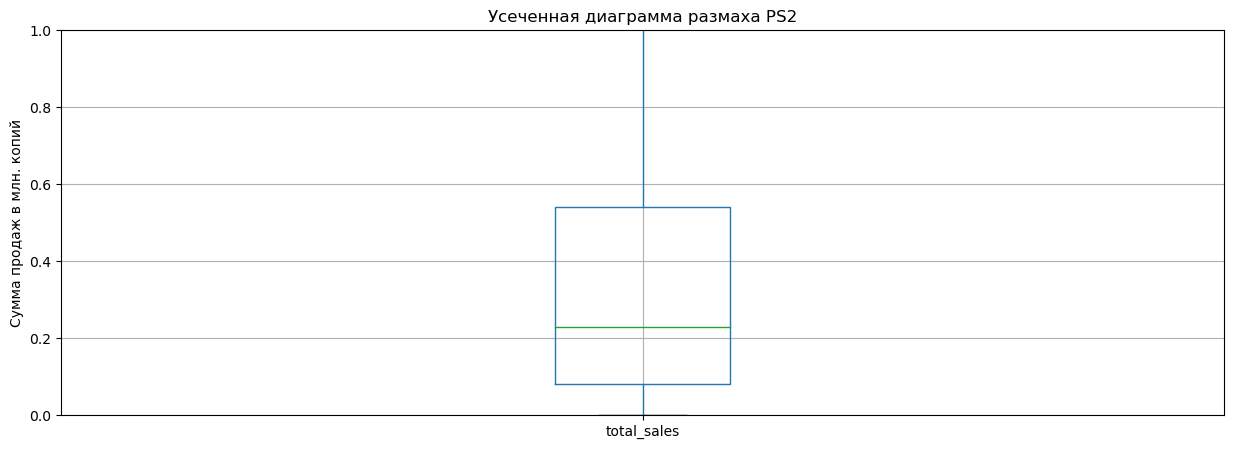

In [68]:
plt.figure(figsize=(15, 5))

plt.ylim(0, 1)

data_filtered[data_filtered['platform'] == 'PS2'].boxplot('total_sales')

plt.title("Усеченная диаграмма размаха PS2")

plt.ylabel('Сумма продаж в млн. копий')

plt.show()

In [69]:
data_filtered[data_filtered['platform'] == 'PS2']['total_sales'].describe()

count    1860.000000
mean        0.552667
std         1.064984
min         0.000000
25%         0.080000
50%         0.230000
75%         0.540000
max        20.810000
Name: total_sales, dtype: float64

Максимальное количество проданных копий самой популярной игры 20.8 млн. 
При этом наиболее обычными среди высоких значений можно считать значения в диапазоне от 230 тысяч до 1,2 млн. проданных игр. То есть от медианы до верхней границы межквартильного размаха.
Значений с продажами до 5 млн. достаточно много, чтобы тоже можно было брать их в расчет в качестве очень успешных продаж.

**PS3**

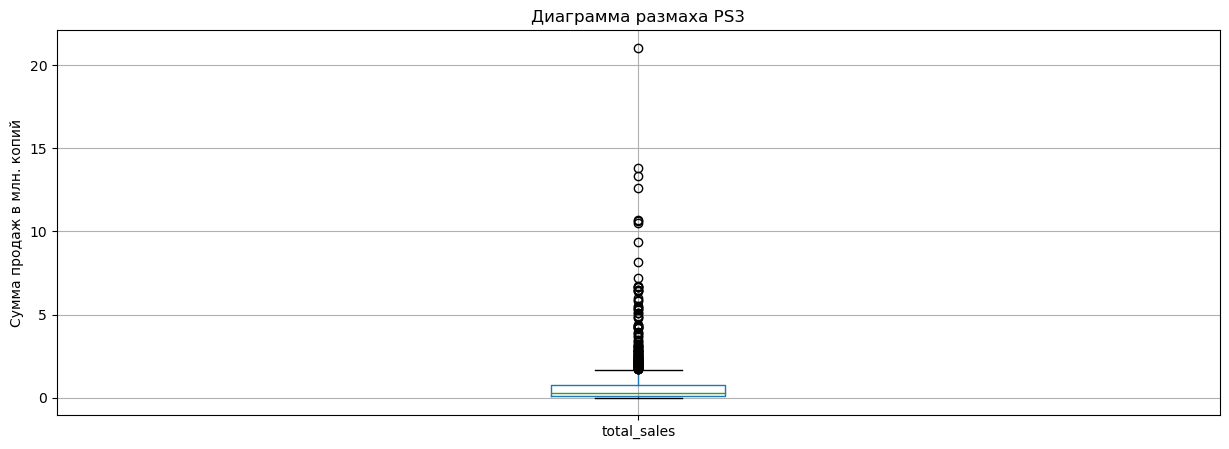

In [70]:
plt.figure(figsize=(15, 5))

data_filtered[data_filtered['platform'] == 'PS3'].boxplot('total_sales')

plt.ylabel('Сумма продаж в млн. копий')

plt.title("Диаграмма размаха PS3")

plt.show()

Для наглядности покажем усеченный график, чтобы был виден межквартильный размах.

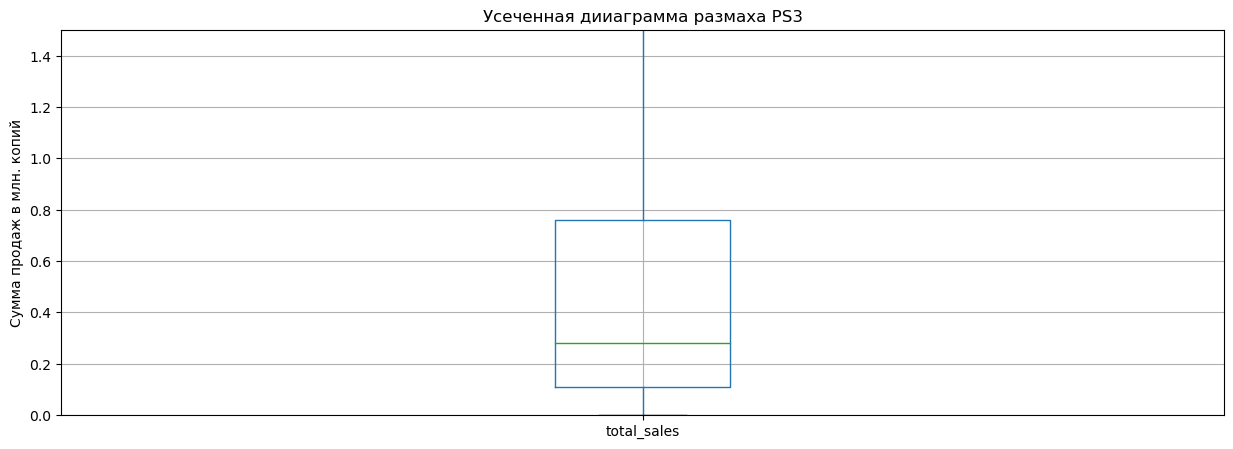

In [71]:
plt.figure(figsize=(15, 5))

plt.ylim(0, 1.5)

data_filtered[data_filtered['platform'] == 'PS3'].boxplot('total_sales')

plt.title("Усеченная дииаграмма размаха PS3")

plt.ylabel('Сумма продаж в млн. копий')

plt.show()

In [72]:
data_filtered[data_filtered['platform'] == 'PS3']['total_sales'].describe()

count    1306.000000
mean        0.713124
std         1.403065
min         0.000000
25%         0.110000
50%         0.280000
75%         0.760000
max        21.050000
Name: total_sales, dtype: float64

Максимальное количество проданных копий самой популярной игры 21 млн. 
При этом наиболее обычными среди высоких значений можно считать значения в диапазоне от 280 тысяч до 1,7 млн. проданных игр. То есть от медианы до верхней границы межквартильного размаха.
Значений с продажами до 5 млн. достаточно много, чтобы тоже можно было брать их в расчет в качестве очень успешных продаж.

**PS4**

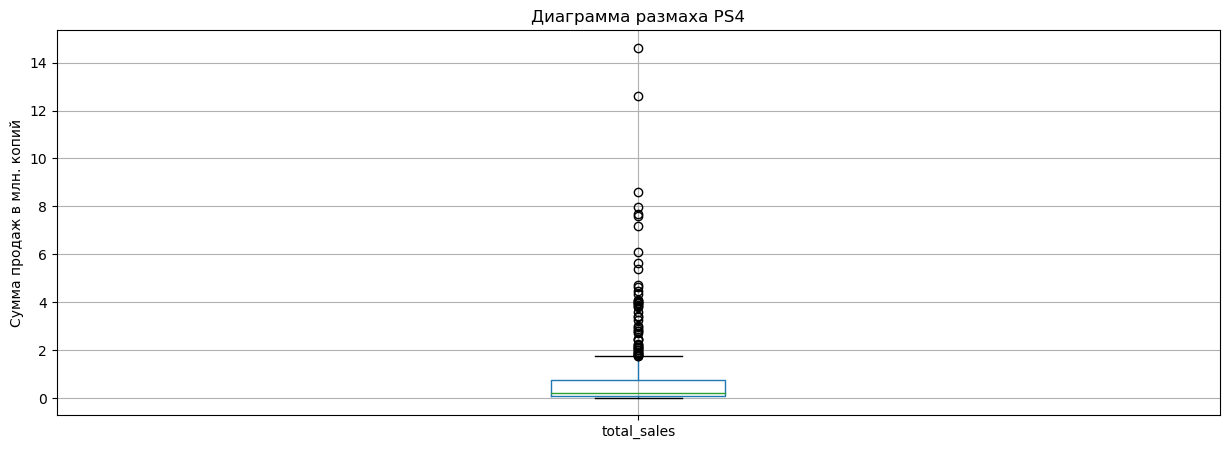

In [73]:
plt.figure(figsize=(15, 5))

data_filtered[data_filtered['platform'] == 'PS4'].boxplot('total_sales')

plt.title("Диаграмма размаха PS4")

plt.ylabel('Сумма продаж в млн. копий')

plt.show()

Для наглядности покажем усеченный график, чтобы был виден межквартильный размах.

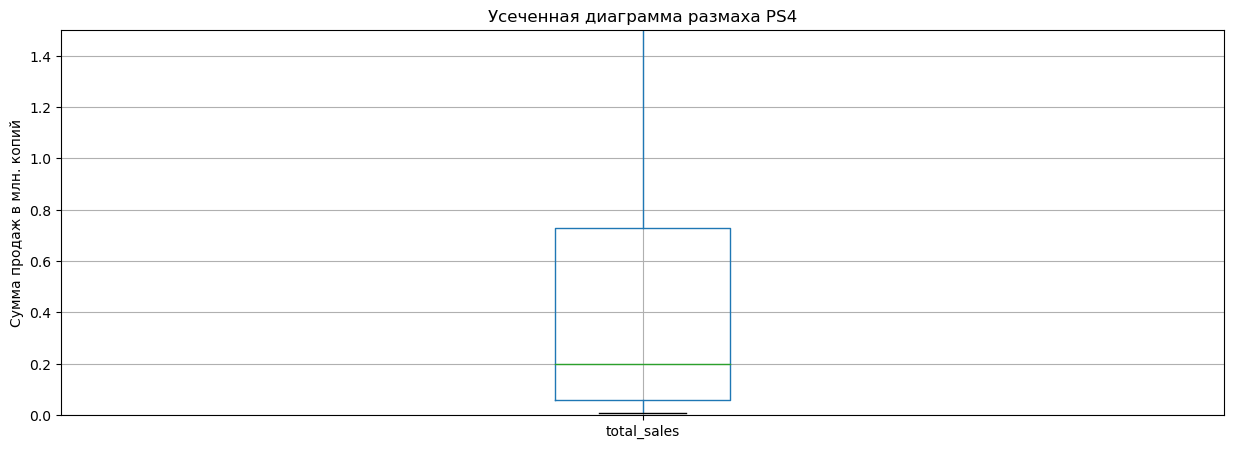

In [74]:
plt.figure(figsize=(15, 5))

plt.ylim(0, 1.5)

data_filtered[data_filtered['platform'] == 'PS4'].boxplot('total_sales')

plt.title("Усеченная диаграмма размаха PS4")

plt.ylabel('Сумма продаж в млн. копий')

plt.show()

In [75]:
data_filtered[data_filtered['platform'] == 'PS4']['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

Максимальное количество проданных копий самой популярной игры 14,6 млн. При этом наиболее обычными среди высоких значений можно считать значения в диапазоне от 200 тысяч до 1,5 млн. проданных игр. То есть от медианы до верхней границы межквартильного размаха.
Значений с продажами до 4 млн. достаточно много, чтобы тоже можно было брать их в расчет в качестве очень успешных продаж.

**DS**

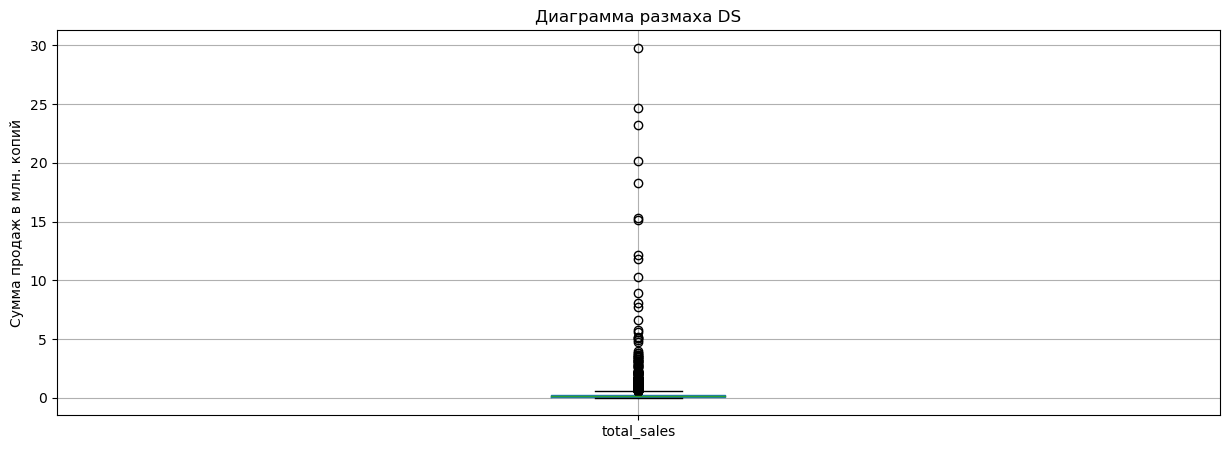

In [76]:
plt.figure(figsize=(15, 5))

data_filtered[data_filtered['platform'] == 'DS'].boxplot('total_sales')

plt.title("Диаграмма размаха DS")

plt.ylabel('Сумма продаж в млн. копий')

plt.show()

Для наглядности покажем усеченный график, чтобы был виден межквартильный размах.

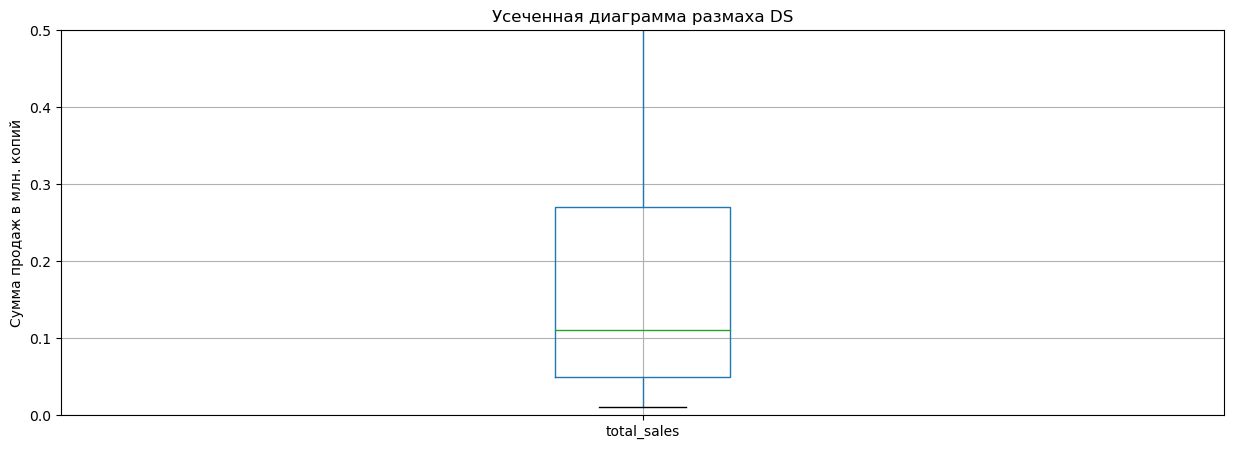

In [77]:
plt.figure(figsize=(15, 5))

plt.ylim(0, 0.5)

data_filtered[data_filtered['platform'] == 'DS'].boxplot('total_sales')

plt.title("Усеченная диаграмма размаха DS")

plt.ylabel('Сумма продаж в млн. копий')

plt.show()

In [78]:
data_filtered[data_filtered['platform'] == 'DS']['total_sales'].describe()

count    2120.000000
mean        0.378660
std         1.436359
min         0.010000
25%         0.050000
50%         0.110000
75%         0.270000
max        29.800000
Name: total_sales, dtype: float64

Максимальное количество проданных копий самой популярной игры 29,8 млн. При этом наиболее обычными среди высоких значений можно считать значения в диапазоне от 110 тысяч до 500 тысяч проданных игр. То есть от медианы до верхней границы межквартильного размаха.
Значений с продажами до 4 млн. достаточно много, чтобы тоже можно было брать их в расчет в качестве очень успешных продаж.

**Wii**

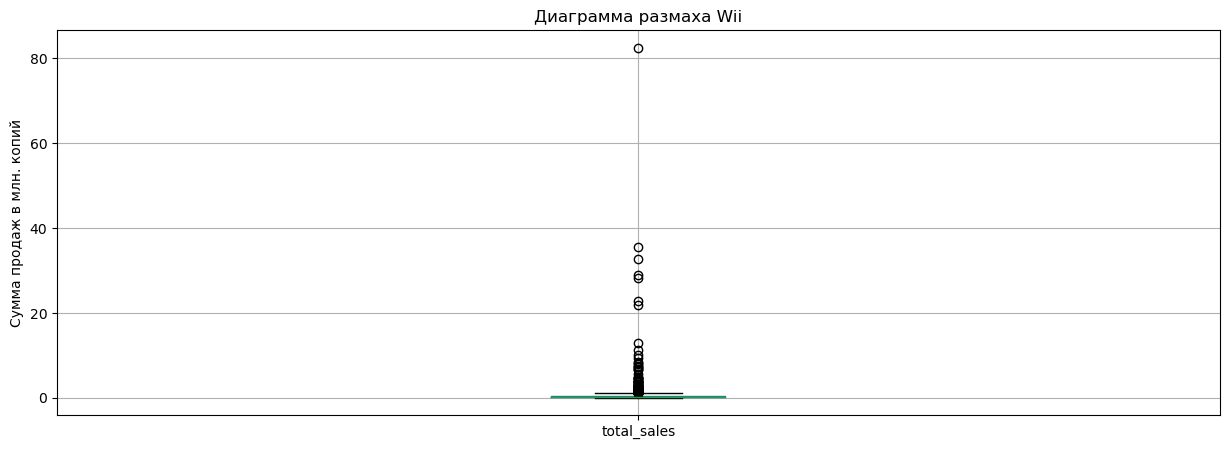

In [79]:
plt.figure(figsize=(15, 5))

data_filtered[data_filtered['platform'] == 'Wii'].boxplot('total_sales')

plt.title("Диаграмма размаха Wii")

plt.ylabel('Сумма продаж в млн. копий')

plt.show()

Для наглядности покажем усеченный график, чтобы был виден межквартильный размах.

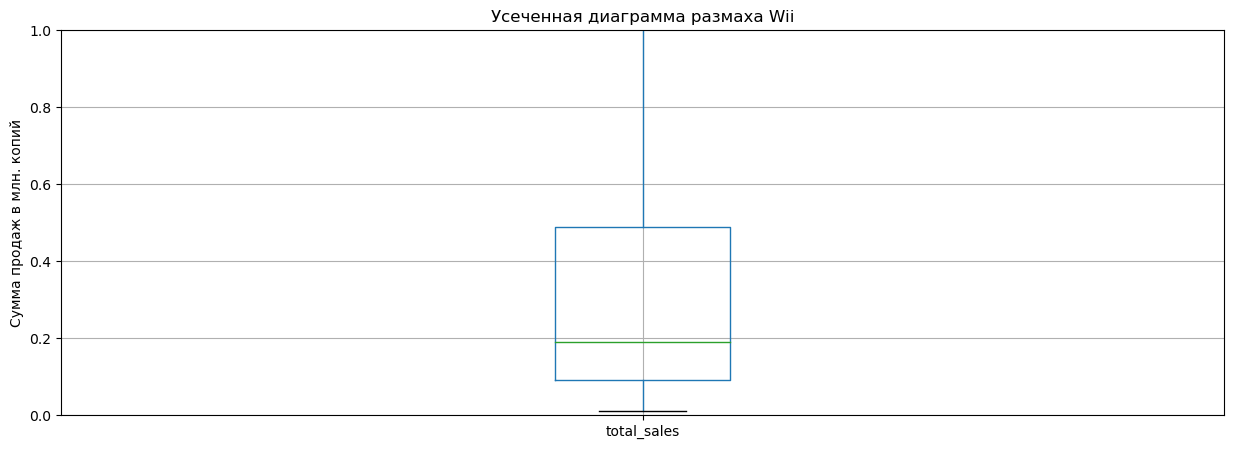

In [80]:
plt.figure(figsize=(15, 5))

plt.ylim(0, 1)

data_filtered[data_filtered['platform'] == 'Wii'].boxplot('total_sales')

plt.title("Усеченная диаграмма размаха Wii")

plt.ylabel('Сумма продаж в млн. копий')

plt.show()

In [81]:
data_filtered[data_filtered['platform'] == 'Wii']['total_sales'].describe()

count    1286.000000
mean        0.692986
std         3.165022
min         0.010000
25%         0.090000
50%         0.190000
75%         0.487500
max        82.540000
Name: total_sales, dtype: float64

Максимальное количество проданных копий самой популярной игры 82,54 млн. При этом наиболее обычными среди высоких значений можно считать значения в диапазоне от 190 тысяч до 1 млн. проданных игр. То есть от медианы до верхней границы межквартильного размаха.
Значений с продажами до 10 млн. достаточно много, чтобы тоже можно было брать их в расчет в качестве очень успешных продаж.

**X360**

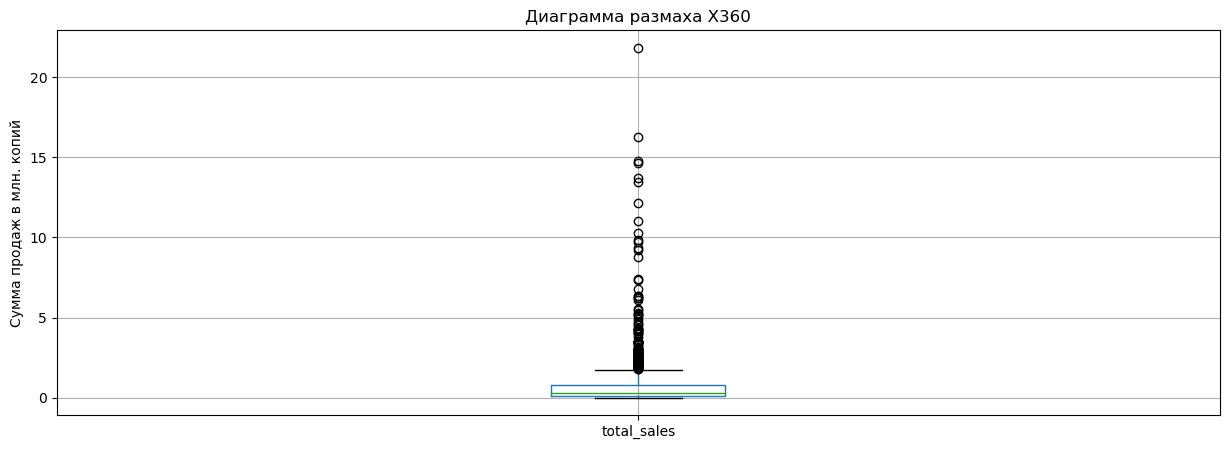

In [82]:
plt.figure(figsize=(15, 5))

data_filtered[data_filtered['platform'] == 'X360'].boxplot('total_sales')

plt.title("Диаграмма размаха X360")

plt.ylabel('Сумма продаж в млн. копий')

plt.show()

Для наглядности покажем усеченный график, чтобы был виден межквартильный размах.

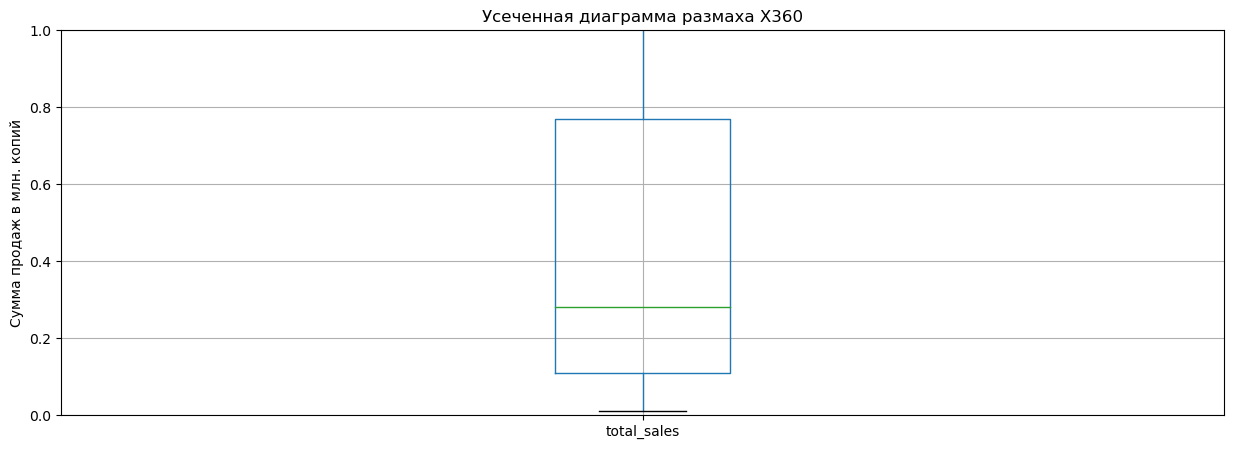

In [83]:
plt.figure(figsize=(15, 5))

plt.ylim(0, 1)

data_filtered[data_filtered['platform'] == 'X360'].boxplot('total_sales')

plt.title("Усеченная диаграмма размаха X360")

plt.ylabel('Сумма продаж в млн. копий')

plt.show()

In [84]:
data_filtered[data_filtered['platform'] == 'X360']['total_sales'].describe()

count    1232.000000
mean        0.780227
std         1.632122
min         0.010000
25%         0.110000
50%         0.280000
75%         0.770000
max        21.820000
Name: total_sales, dtype: float64

Максимальное количество проданных копий самой популярной игры 21,82 млн. При этом наиболее обычными среди высоких значений можно считать значения в диапазоне от 280 тысяч до 1,76 млн. проданных игр. То есть от медианы до верхней границы межквартильного размаха.
Значений с продажами до 5 млн. достаточно много, чтобы тоже можно было брать их в расчет в качестве очень успешных продаж.

Можно сделать общий вывод, что на всех разобранных платформах медианное 
значение и верхняя граница межквартильного размаха похожи. Медиана отсекает половину значений. 
Поэтому все значения выше медианы - это та половина игр, которые продаются лучше всего. 
Верхняя граница межквартильного размаха дает понять какие игры обычно лучше остальных, но при этом защищает от выбросов.\
Выбросы могут быть как невероятно успешными играми, так и ошибками в данных.
При этом для всех платформ кроме "Wii" можно верхней границей успешных продаж взять значение 5 млн. копий. До этого уровня много значений у каждой платформы, поэтому выбросами их считать нельзя.\
А вот Wii - платформа рекордсмен. На этой платформе согласно данным самая популярная игра с 82,54 млн. проданными копиями. 
И значений продаж до 10 лмн. копий достаточно, чтобы их учесть для платформы Wii.

Для того, чтобы продолжить анализ для платформ "PS4","DS","PS3","X360","PS2" можно установить диапазон от 0.3 млн. до 5 млн. проданных копий как диапазон успешных продаж.
Для платформы "Wii" диапазон 0.3 млн. до 10 млн. копий.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

В качестве такой платформы возьмем "PS3", так как у нее из выбранных топовых платформ пик продаж был ближе всего - 2011 год. 
Берем не "PS4" в данном случае, так как у нее данных сильно меньше.

**Посмотрим сперва на отзывы покупателей.**

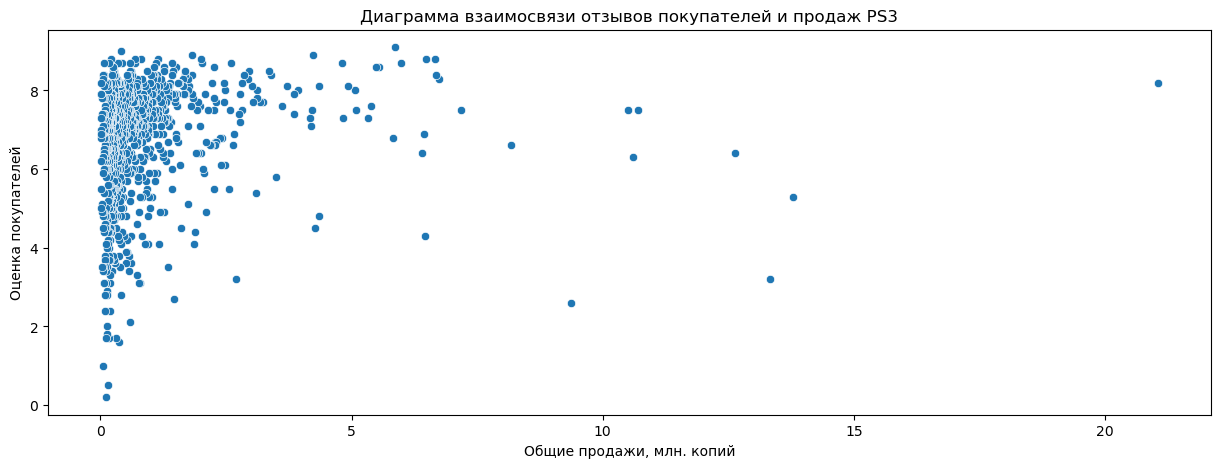

In [85]:
plt.figure(figsize=(15, 5))

PS3_data = data_filtered.query('platform == "PS3"')

sns.scatterplot(data=PS3_data, y="user_score", x="total_sales")

plt.title("Диаграмма взаимосвязи отзывов покупателей и продаж PS3")

plt.ylabel('Оценка покупателей')

plt.xlabel('Общие продажи, млн. копий')

plt.show()

In [86]:
PS3_data['user_score'].corr(PS3_data['total_sales'])

0.12841563260142255

Возьмем также срез с играми, которые были проданы в количестве от 300 тысяч до 5 млн. копий.

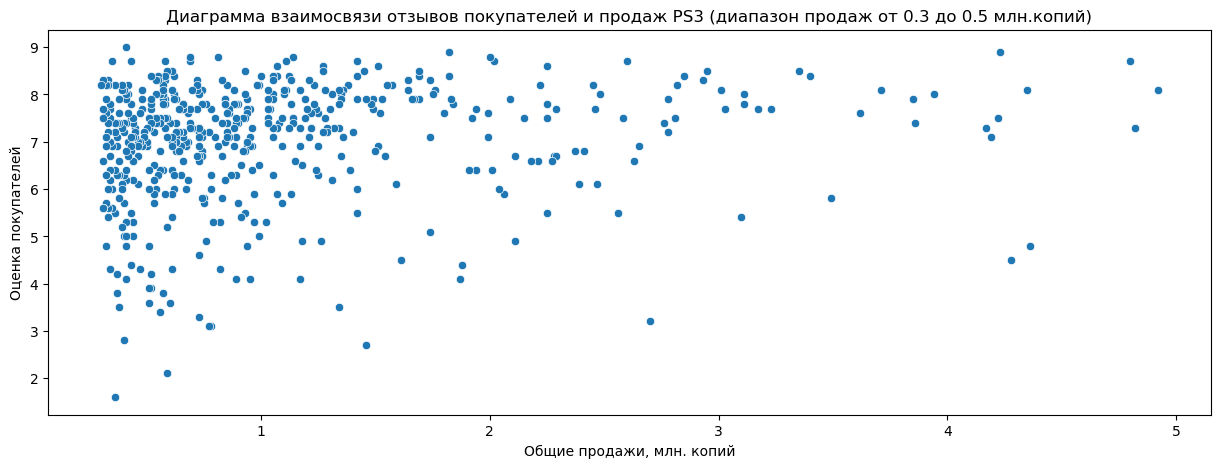

In [87]:
plt.figure(figsize=(15, 5))

PS3_data_filtered = data_filtered.query('platform == "PS3" and 0.3<total_sales<5')

sns.scatterplot(data=PS3_data_filtered, y="user_score", x="total_sales")

plt.ylabel('Оценка покупателей')

plt.xlabel('Общие продажи, млн. копий')

plt.title("Диаграмма взаимосвязи отзывов покупателей и продаж PS3 (диапазон продаж от 0.3 до 0.5 млн.копий)")

plt.show()

In [88]:
PS3_data_filtered['user_score'].corr(PS3_data_filtered['total_sales'])

0.15009384417121147

Видим, что линейной связи нет. Оценка пользователей не коррелирует с продажами. Пробежимся по коэффициентам корреляции для отдельных регионов.

In [89]:
print(PS3_data['user_score'].corr(PS3_data['na_sales']))

print(PS3_data['user_score'].corr(PS3_data['eu_sales']))

print(PS3_data['user_score'].corr(PS3_data['jp_sales']))

PS3_data['user_score'].corr(PS3_data['other_sales'])

0.13769886331468176
0.08782259404009364
0.1710218074359473


0.11148956199847823

Опять же видим, что прямой связи нет.

**Теперь посмотрим на корреляцию с отзывами критиков сперва всех продаж, а потом продаж от 300 тысяч до 5 млн. копий.**

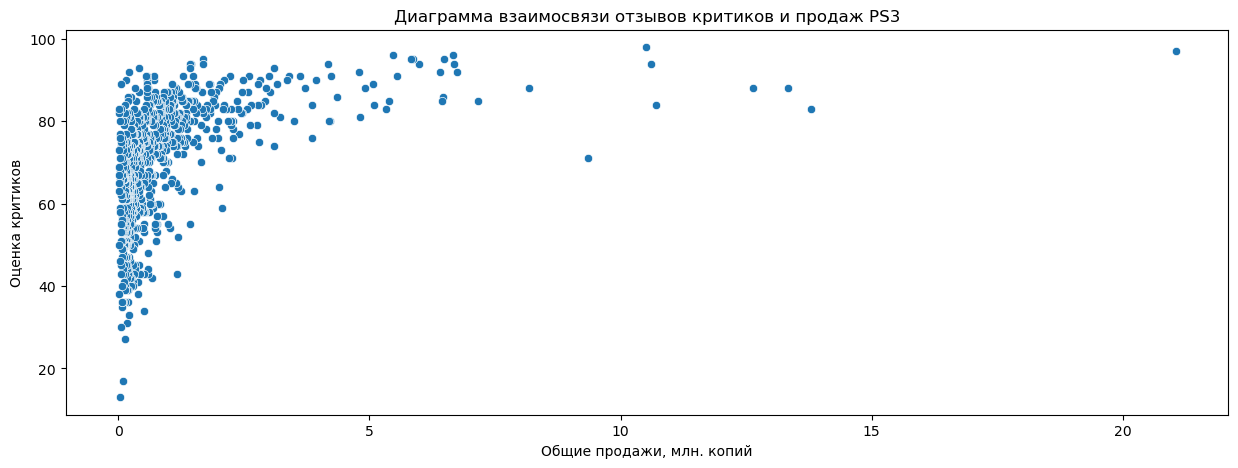

In [90]:
plt.figure(figsize=(15, 5))

sns.scatterplot(data=PS3_data, y="critic_score", x="total_sales")

plt.title("Диаграмма взаимосвязи отзывов критиков и продаж PS3")

plt.ylabel('Оценка критиков')

plt.xlabel('Общие продажи, млн. копий')

plt.show()

In [91]:
PS3_data['critic_score'].corr(PS3_data['total_sales'])

0.43275895789971347

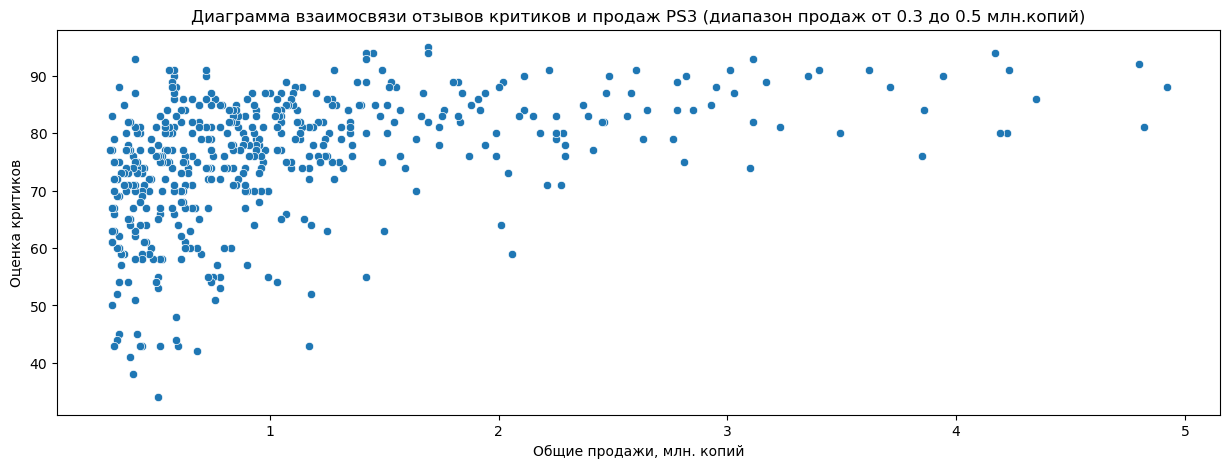

In [92]:
plt.figure(figsize=(15, 5))

sns.scatterplot(data=PS3_data_filtered, y="critic_score", x="total_sales")

plt.title("Диаграмма взаимосвязи отзывов критиков и продаж PS3 (диапазон продаж от 0.3 до 0.5 млн.копий)")

plt.ylabel('Оценка критиков')

plt.xlabel('Общие продажи, млн. копий')

plt.show()

In [93]:
PS3_data_filtered['critic_score'].corr(PS3_data_filtered['total_sales'])

0.43634986698450295

Зависимость продаж от оценок критиков значительно выше, чем от оценок пользователей. На диаграмме рассеяния это заметно, но не слишком явно. Для продаж тиражом от 2 млн. копий оценки от 60 баллов. Посмотрим как обстоит дело в разрере по регионам с влиянием оценок критиков.

In [94]:
print(PS3_data['critic_score'].corr(PS3_data['na_sales']))

print(PS3_data['critic_score'].corr(PS3_data['eu_sales']))

print(PS3_data['critic_score'].corr(PS3_data['jp_sales']))

PS3_data['critic_score'].corr(PS3_data['other_sales'])

0.45441272545984107
0.38253605706677196
0.202936858579346


0.3948825383197307

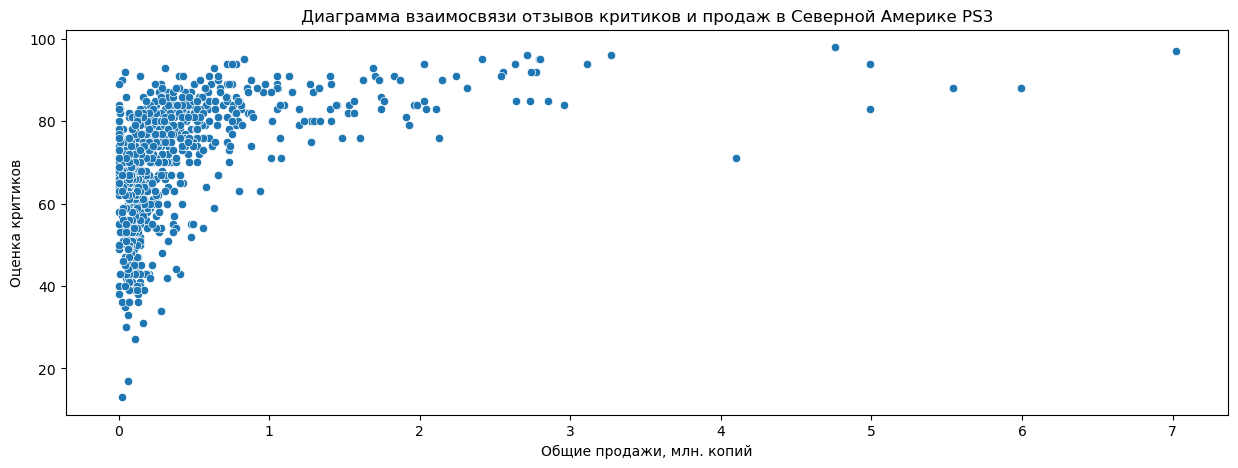

In [95]:
plt.figure(figsize=(15, 5))

sns.scatterplot(data=PS3_data, y="critic_score", x="na_sales")

plt.title("Диаграмма взаимосвязи отзывов критиков и продаж в Северной Америке PS3")

plt.ylabel('Оценка критиков')

plt.xlabel('Общие продажи, млн. копий')

plt.show()

Заметная корреляция и связь на диаграмме рассения видна только для продаж в Северной Америке. В случае продаж от 1 млн. копий оценка критиков выше 70 баллов.

**Краткие выводы:**
* У продаж как в разбивке по регионам, так и вообще нет линейной связи с оценкой пользователя.
* Прослеживается линейная связь продаж с оценкой критиков. Для общих продаж тиражом от 2 млн. копий оценки критиков от 60 баллов.
* Наиболее сильно связь с оценкой критиков видна в продажах в Северной Америке. В случае продаж от 1 млн. копий оценка критиков выше 70 баллов.
* Для всех продаж и продаж в диапазоне от 0.3 до 5 млн. копий очень схожие корреляции с оценками критиков и пользователей.

#### Соотнесем выводы с продажами игр на других платформах

Для этого анализа все также берем период с 2002 по 2016 год, чтобы учесть как можно больше данных. В качестве платформ возьмем самые успешные платформы, которые разбирали в подразделе 3.3. 
Для того, чтобы продолжить анализ для платформ "PS4","DS","PS3","X360","PS2" можно установить диапазон от 0.3 млн. до 5 млн. проданных копий как диапазон успешных продаж. Для платформы "Wii" диапазон 0.3 млн. до 10 млн. копий.

**PS4**\
Оценка пользователей:

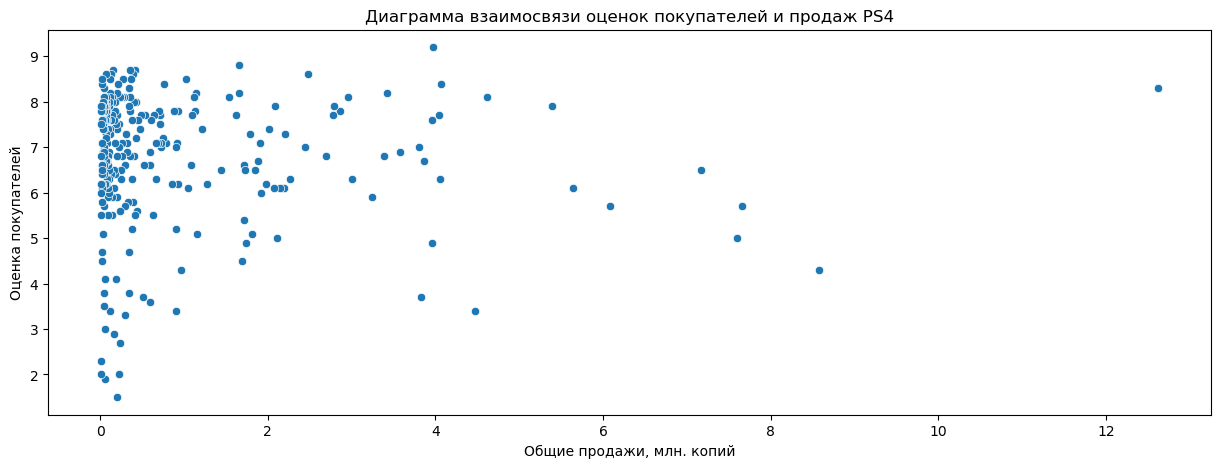

In [96]:
plt.figure(figsize=(15, 5))

PS4_data = data_filtered.query('platform == "PS4"')

sns.scatterplot(data=PS4_data, y="user_score", x="total_sales")

plt.title("Диаграмма взаимосвязи оценок покупателей и продаж PS4")

plt.ylabel('Оценка покупателей')

plt.xlabel('Общие продажи, млн. копий')

plt.show()

In [97]:
PS4_data['user_score'].corr(PS4_data['total_sales'])

-0.031957109005188285

Оценка критиков:

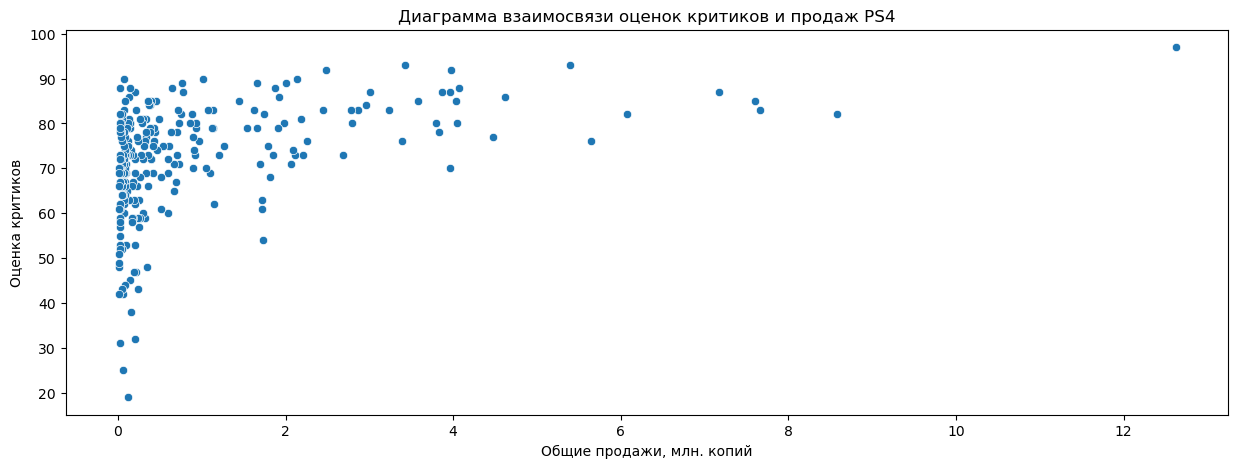

In [98]:
plt.figure(figsize=(15, 5))

sns.scatterplot(data=PS4_data, y="critic_score", x="total_sales")

plt.title("Диаграмма взаимосвязи оценок критиков и продаж PS4")

plt.ylabel('Оценка критиков')

plt.xlabel('Общие продажи, млн. копий')

plt.show()

In [99]:
PS4_data['critic_score'].corr(PS4_data['total_sales'])

0.40656790206178095

In [100]:
print(PS4_data['critic_score'].corr(PS4_data['na_sales']))

print(PS4_data['critic_score'].corr(PS4_data['eu_sales']))

print(PS4_data['critic_score'].corr(PS4_data['jp_sales']))

PS4_data['critic_score'].corr(PS4_data['other_sales'])

0.41500763162387244
0.3467204675025865
0.3223579813084539


0.40919130070774706

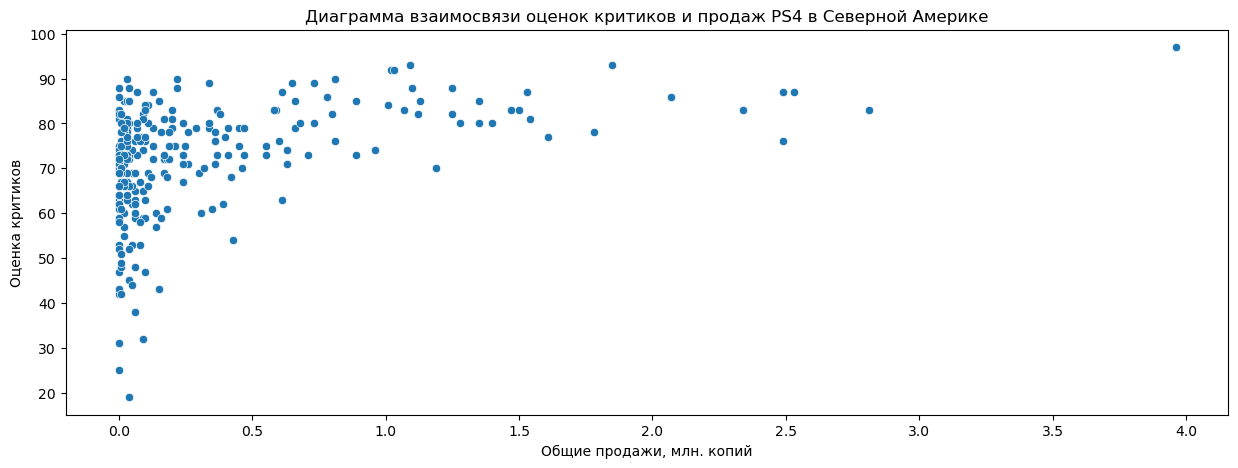

In [101]:
plt.figure(figsize=(15, 5))

sns.scatterplot(data=PS4_data, y="critic_score", x="na_sales")

plt.title("Диаграмма взаимосвязи оценок критиков и продаж PS4 в Северной Америке")

plt.ylabel('Оценка критиков')

plt.xlabel('Общие продажи, млн. копий')

plt.show()

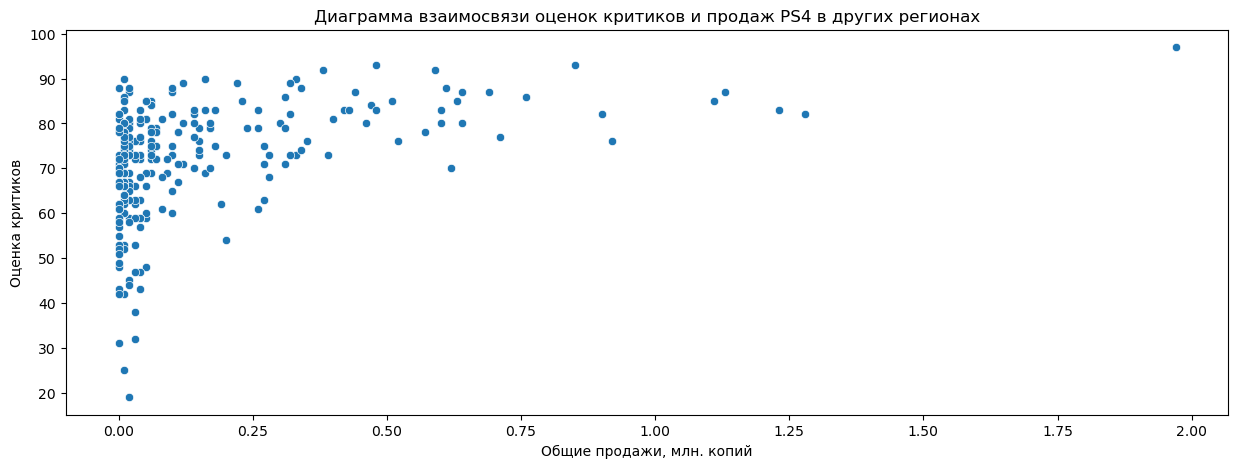

In [102]:
plt.figure(figsize=(15, 5))

sns.scatterplot(data=PS4_data, y="critic_score", x="other_sales")

plt.title("Диаграмма взаимосвязи оценок критиков и продаж PS4 в других регионах")

plt.ylabel('Оценка критиков')

plt.xlabel('Общие продажи, млн. копий')

plt.show()

Для "PS4" выводы в целом подтверждаются. 
* Продажи лучше всего корреляируют с оценкой критиков и не коррелируют с оценкой пользователей.
* Корреляция с оценкой критиков выше всего в Северной Америке и в страных за пределами Европы и Японии.
* Для общих продаж тиражом примерно от 1,5 млн. копий оценка критиков почти всегда от 60 баллов.
* Для продаж в Северной Америке объемом от 500 тысяч игр оценка критиков почти всегда от 70 баллов.
* Для продаж за пределами Европы и Японии от 200 тысяч. экземпляров оценка критиков почти всегда ниже 60 баллов.

**DS**

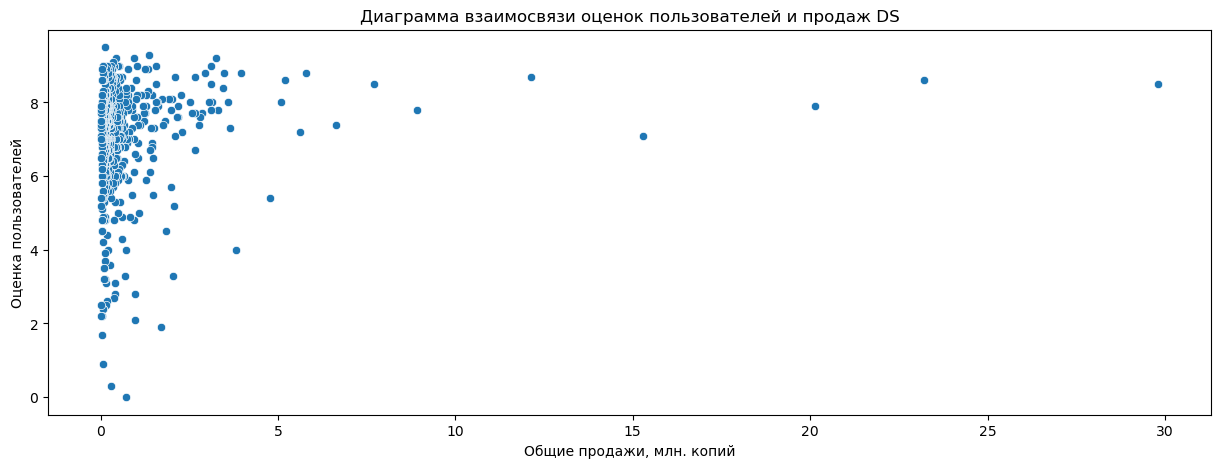

In [103]:
plt.figure(figsize=(15, 5))

DS_data = data_filtered.query('platform == "DS"')

sns.scatterplot(data=DS_data, y="user_score", x="total_sales")

plt.title("Диаграмма взаимосвязи оценок пользователей и продаж DS")

plt.ylabel('Оценка пользователей')

plt.xlabel('Общие продажи, млн. копий')

plt.show()

In [104]:
DS_data['user_score'].corr(DS_data['total_sales'])

0.1308760133383496

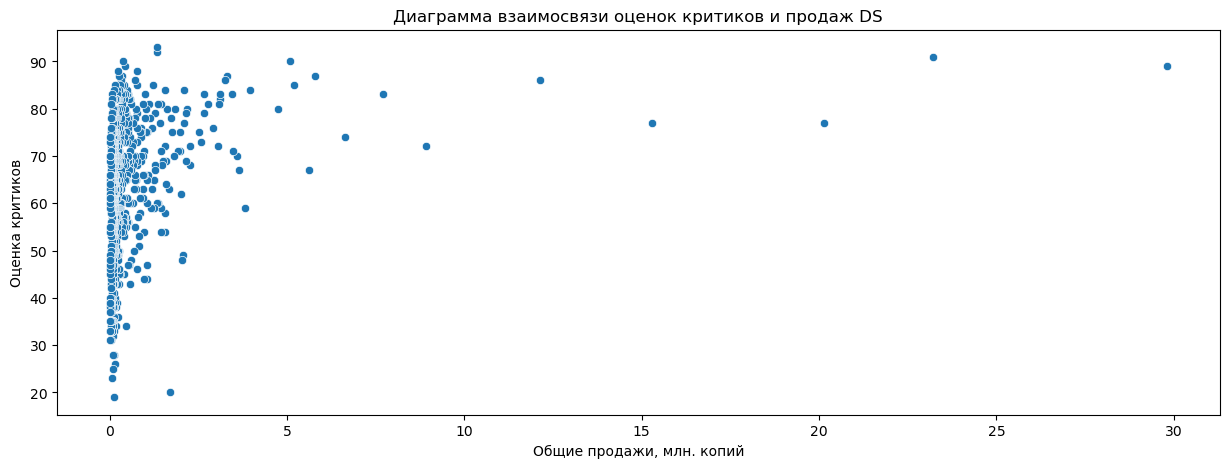

0.23754579854113467

In [105]:
plt.figure(figsize=(15, 5))

sns.scatterplot(data=DS_data, y="critic_score", x="total_sales")

plt.title("Диаграмма взаимосвязи оценок критиков и продаж DS")

plt.ylabel('Оценка критиков')

plt.xlabel('Общие продажи, млн. копий')

plt.show()

DS_data['critic_score'].corr(DS_data['total_sales'])

In [106]:
print(DS_data['critic_score'].corr(DS_data['na_sales']))

print(DS_data['critic_score'].corr(DS_data['eu_sales']))

print(DS_data['critic_score'].corr(DS_data['jp_sales']))

DS_data['critic_score'].corr(DS_data['other_sales'])

0.22392029268926508
0.1973956876879988
0.2562097982615104


0.2064526051857173

В случае "DS" выводы не подтверждаются. Линейная связь не прослеживается не на графике разброса, не в коэффициентах корреляции. 

**PS2**

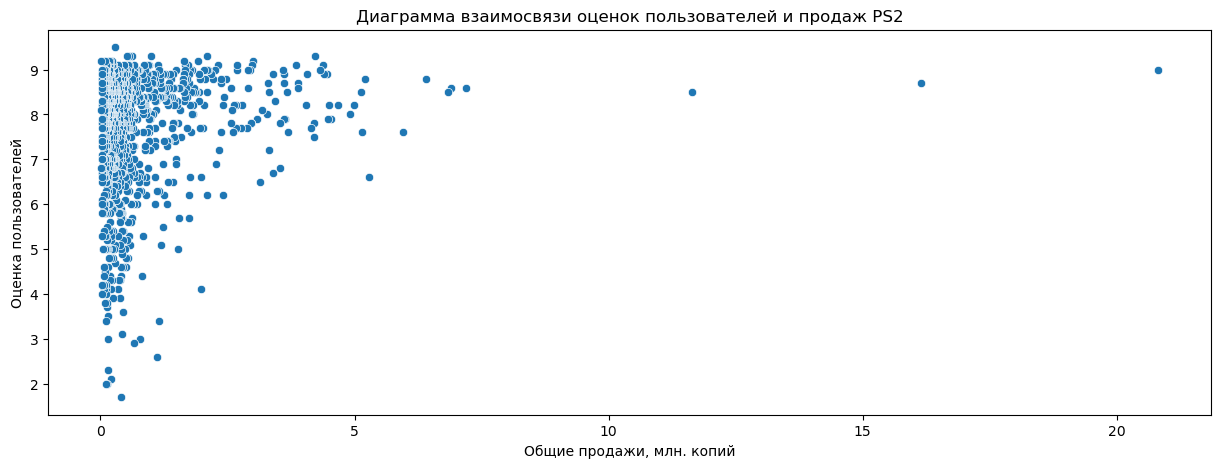

In [107]:
PS2_data = data_filtered.query('platform == "PS2"')

plt.figure(figsize=(15, 5))

sns.scatterplot(data=PS2_data, y="user_score", x="total_sales")

plt.title("Диаграмма взаимосвязи оценок пользователей и продаж PS2")

plt.ylabel('Оценка пользователей')

plt.xlabel('Общие продажи, млн. копий')

plt.show()

In [108]:
PS2_data['user_score'].corr(PS2_data['total_sales'])

0.16637206166883686

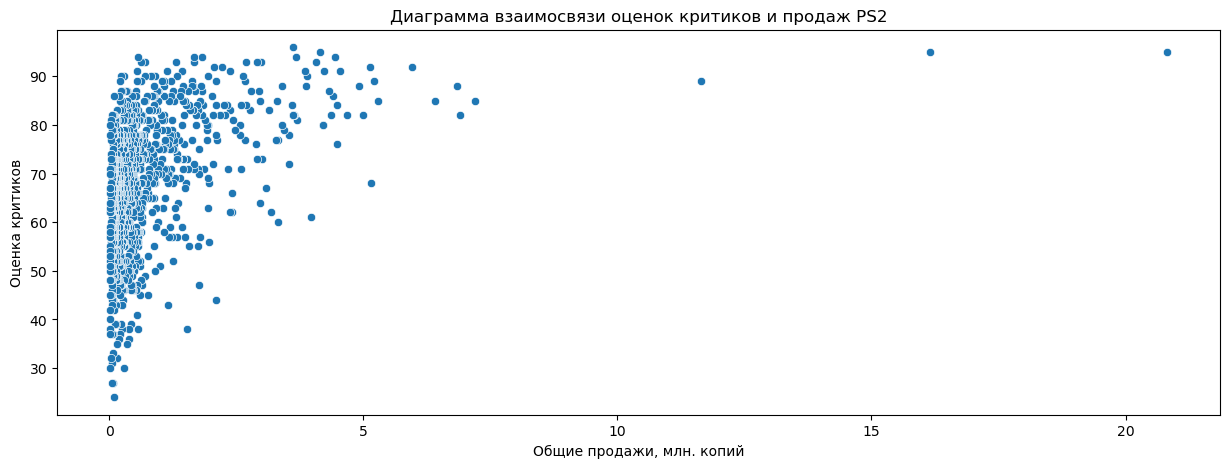

0.38265889026281225

In [109]:
plt.figure(figsize=(15, 5))

sns.scatterplot(data=PS2_data, y="critic_score", x="total_sales")

plt.title("Диаграмма взаимосвязи оценок критиков и продаж PS2")

plt.ylabel('Оценка критиков')

plt.xlabel('Общие продажи, млн. копий')

plt.show()

PS2_data['critic_score'].corr(PS2_data['total_sales'])

In [110]:
print(PS2_data['critic_score'].corr(PS2_data['na_sales']))

print(PS2_data['critic_score'].corr(PS2_data['eu_sales']))

print(PS2_data['critic_score'].corr(PS2_data['jp_sales']))

PS2_data['critic_score'].corr(PS2_data['other_sales'])

0.3839753293070089
0.2783925984101718
0.19826870899092808


0.20854365278740283

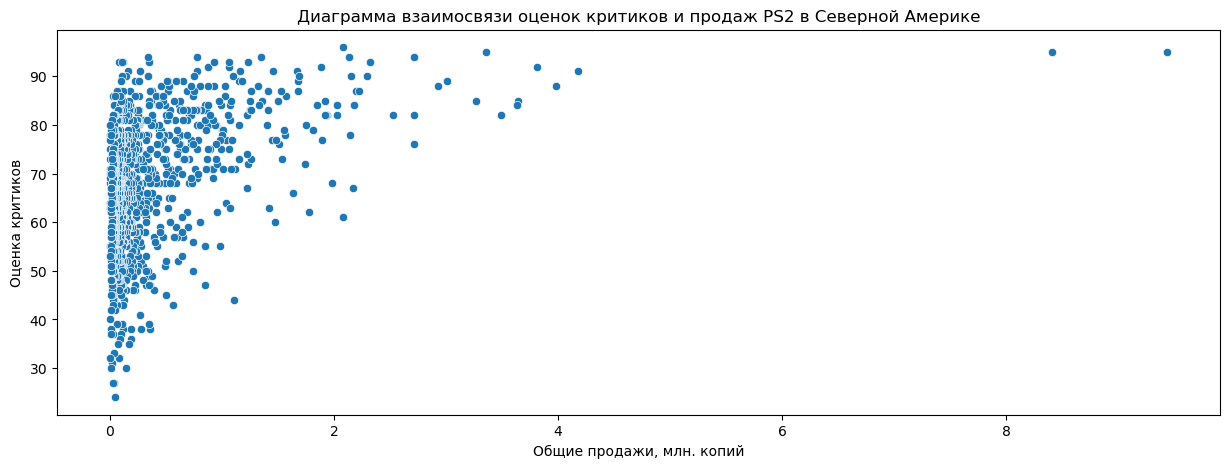

In [111]:
plt.figure(figsize=(15, 5))

sns.scatterplot(data=PS2_data, y="critic_score", x="na_sales")

plt.title("Диаграмма взаимосвязи оценок критиков и продаж PS2 в Северной Америке")

plt.ylabel('Оценка критиков')

plt.xlabel('Общие продажи, млн. копий')

plt.show()

Для "PS2" выводы в целом подтверждаются.
* Продажи лучше всего корреляируют с оценкой критиков и не коррелируют с оценкой пользователей.
* Корреляция с оценкой критиков выше всего в Северной Америке.
* Для общих продаж тиражом примерно от 3 млн. копий оценка критиков всегда от 60 баллов.
* Для продаж в Северной Америке объемом от 1,7 млн. игр оценка критиков всегда от 60 баллов.

**X360**

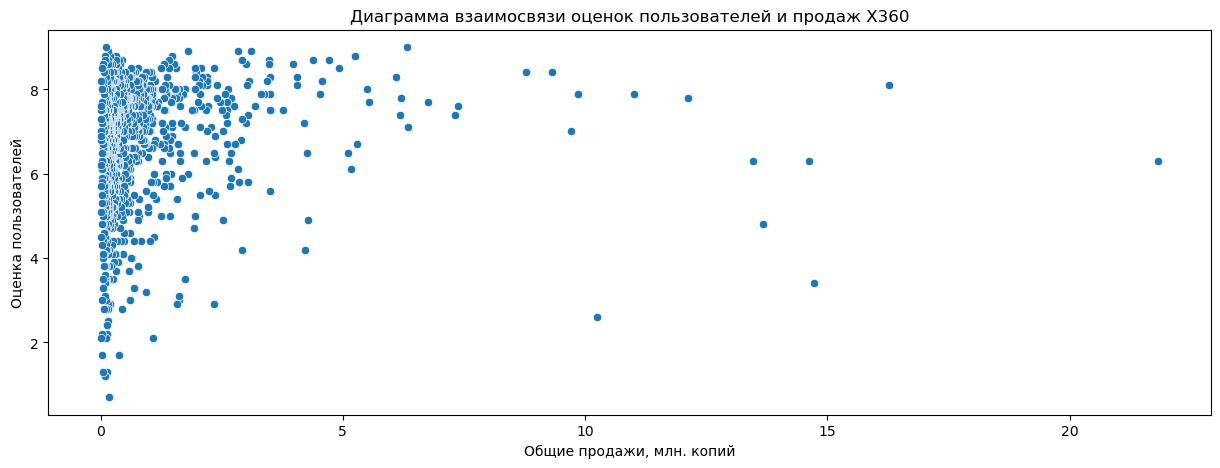

In [112]:
plt.figure(figsize=(15, 5))

X360_data = data_filtered.query('platform == "X360"')

sns.scatterplot(data=X360_data, y="user_score", x="total_sales")

plt.title("Диаграмма взаимосвязи оценок пользователей и продаж X360")

plt.ylabel('Оценка пользователей')

plt.xlabel('Общие продажи, млн. копий')

plt.show()

In [113]:
X360_data['user_score'].corr(X360_data['total_sales'])

0.11418661762928556

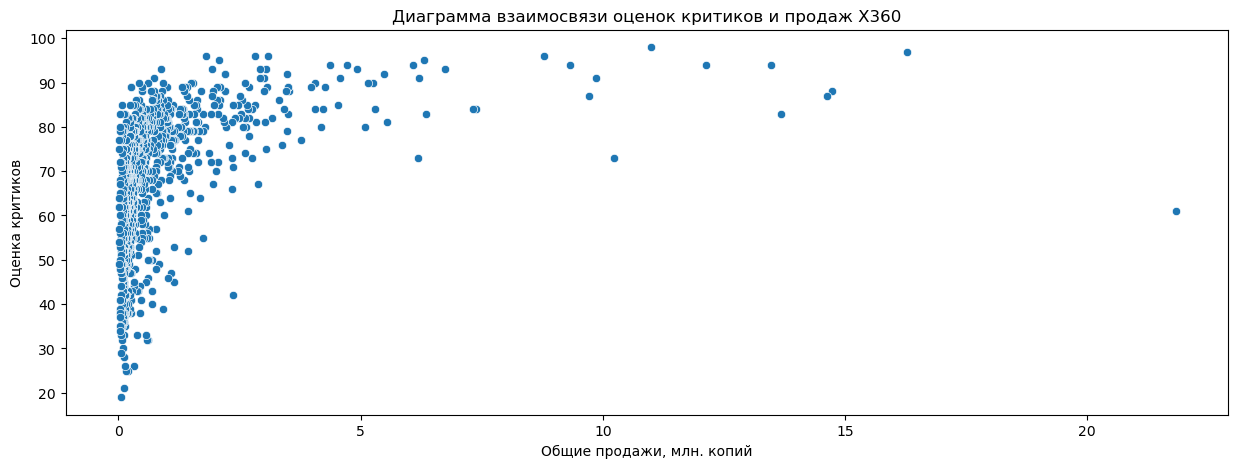

0.3928658925400699

In [114]:
plt.figure(figsize=(15, 5))

sns.scatterplot(data=X360_data, y="critic_score", x="total_sales")

plt.title("Диаграмма взаимосвязи оценок критиков и продаж X360")

plt.ylabel('Оценка критиков')

plt.xlabel('Общие продажи, млн. копий')

plt.show()

X360_data['critic_score'].corr(X360_data['total_sales'])

In [115]:
print(X360_data['critic_score'].corr(X360_data['na_sales']))

print(X360_data['critic_score'].corr(X360_data['eu_sales']))

print(X360_data['critic_score'].corr(X360_data['jp_sales']))

X360_data['critic_score'].corr(X360_data['other_sales'])

0.3766545256882762
0.385040396427579
0.28426728669298373


0.4018115551436032

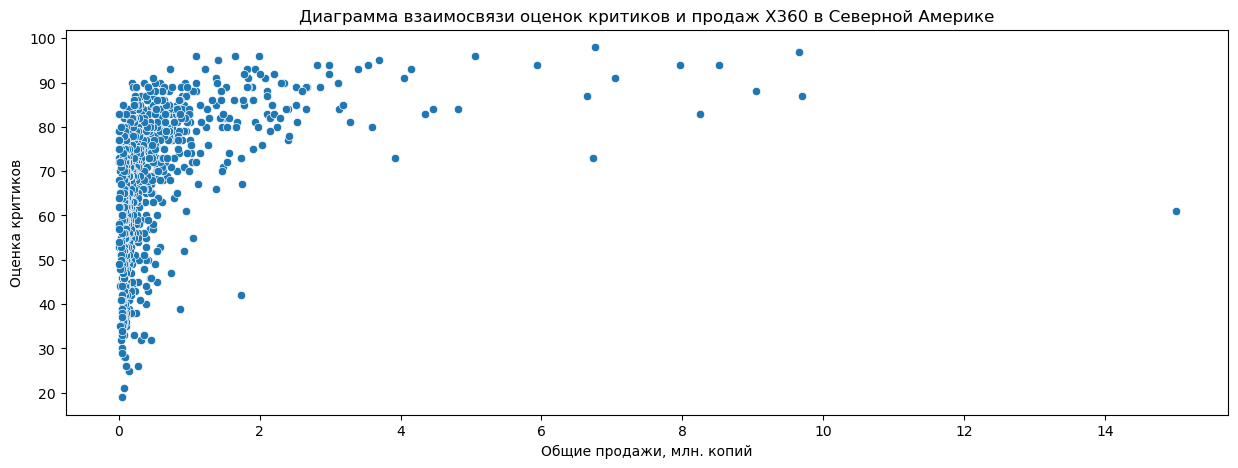

In [116]:
plt.figure(figsize=(15, 5))

sns.scatterplot(data=X360_data, y="critic_score", x="na_sales")

plt.title("Диаграмма взаимосвязи оценок критиков и продаж X360 в Северной Америке")

plt.ylabel('Оценка критиков')

plt.xlabel('Общие продажи, млн. копий')

plt.show()

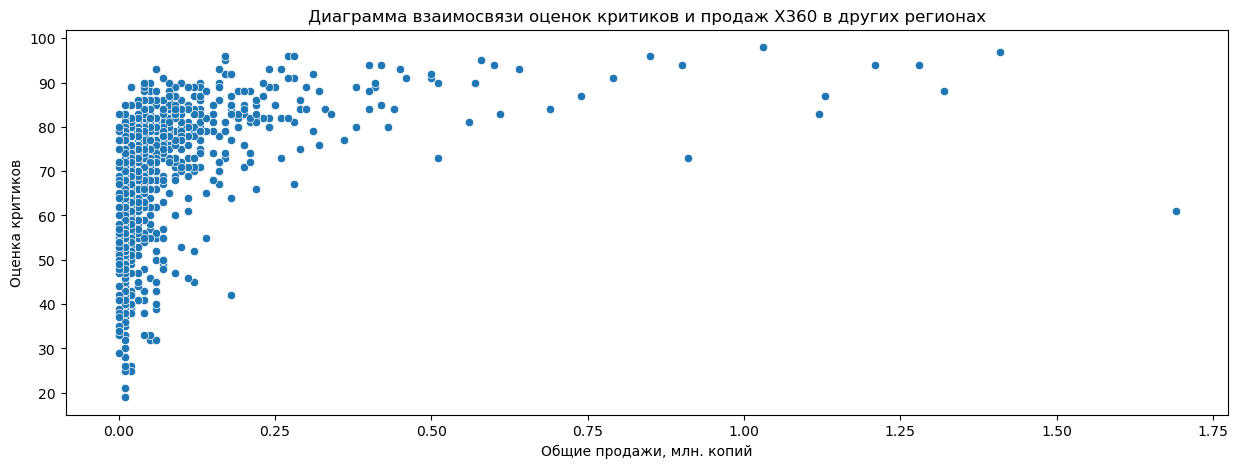

In [117]:
plt.figure(figsize=(15, 5))

sns.scatterplot(data=X360_data, y="critic_score", x="other_sales")

plt.title("Диаграмма взаимосвязи оценок критиков и продаж X360 в других регионах")

plt.ylabel('Оценка критиков')

plt.xlabel('Общие продажи, млн. копий')

plt.show()

Для "X360" выводы в целом подтверждаются.

* Продажи лучше всего корреляируют с оценкой критиков и не коррелируют с оценкой пользователей.
* Корреляция с оценкой критиков выше всего в Северной Америке и в страных за пределами Европы и Японии.
* Для общих продаж тиражом примерно от 3 млн. копий оценка критиков почти всегда от 70 баллов.
* Для продаж в Северной Америке объемом от 1.7 млн. игр оценка критиков почти всегда от 65 баллов.
* Для продаж в регионах за пределами Европы и Японии от 0.25 млн. игр оценка критиков почти всегда от 70 баллов.

**Wii**

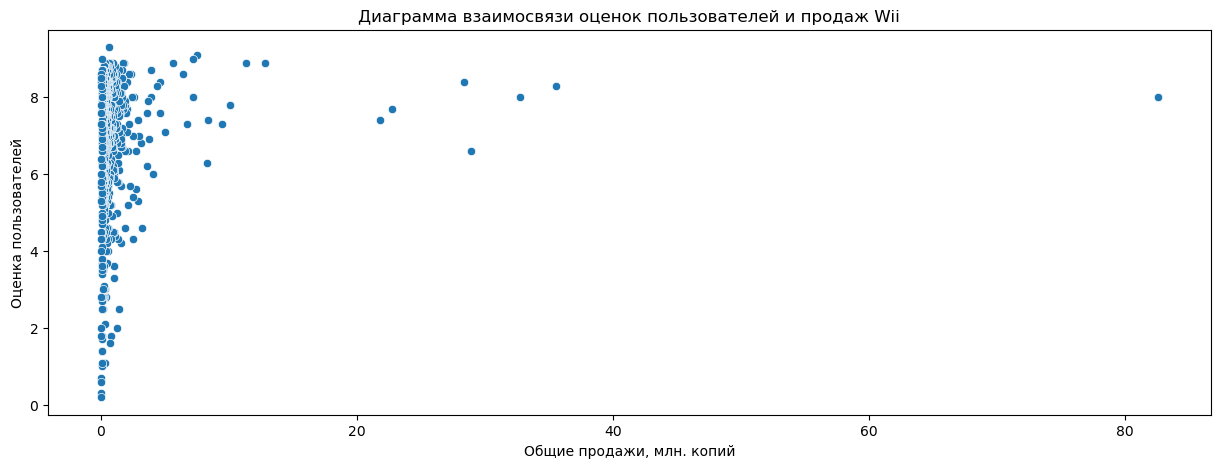

In [118]:
Wii_data = data_filtered.query('platform == "Wii"')

plt.figure(figsize=(15, 5))

sns.scatterplot(data=Wii_data, y="user_score", x="total_sales")

plt.title("Диаграмма взаимосвязи оценок пользователей и продаж Wii")

plt.ylabel('Оценка пользователей')

plt.xlabel('Общие продажи, млн. копий')

plt.show()

In [119]:
Wii_data['user_score'].corr(Wii_data['total_sales'])

0.11283121107411768

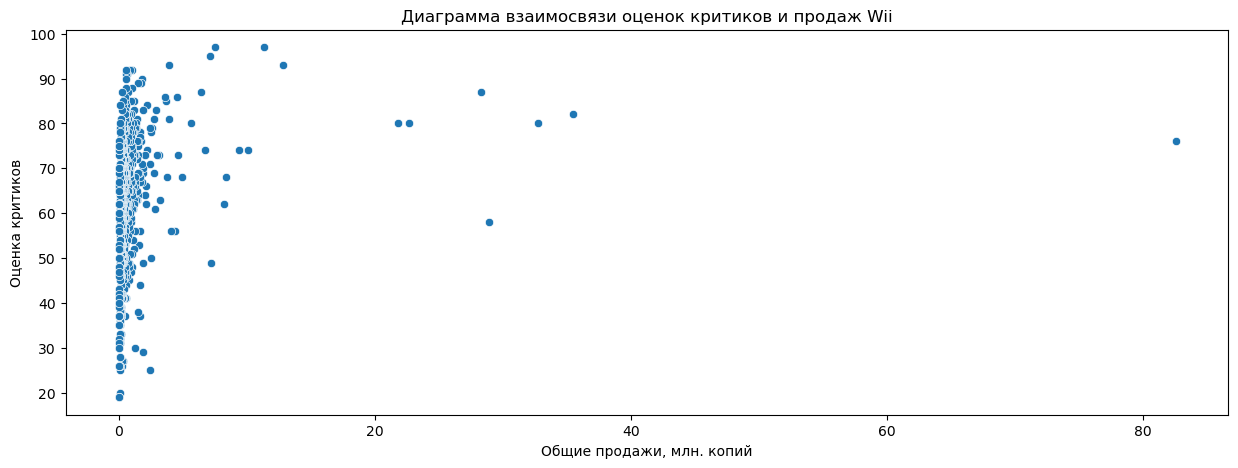

0.17790728577594914

In [120]:
plt.figure(figsize=(15, 5))

sns.scatterplot(data=Wii_data, y="critic_score", x="total_sales")

plt.title("Диаграмма взаимосвязи оценок критиков и продаж Wii")

plt.ylabel('Оценка критиков')

plt.xlabel('Общие продажи, млн. копий')

plt.show()

Wii_data['critic_score'].corr(Wii_data['total_sales'])

In [121]:
print(Wii_data['critic_score'].corr(Wii_data['na_sales']))

print(Wii_data['critic_score'].corr(Wii_data['eu_sales']))

print(Wii_data['critic_score'].corr(Wii_data['jp_sales']))

Wii_data['critic_score'].corr(Wii_data['other_sales'])

0.17787034183258682
0.16480237217262253
0.19971318260429247


0.16245565363530892

В случае "Wii" выводы не подтверждаются. Линейная связь не прослеживается не на графике разброса, не в коэффициентах корреляции.

**Общий краткий вывод по подразделу:**

* Выводы раздела 3.4 подтверждаются на всех рассмотренных платформах кроме "DS" и "Wii".
* Для "X360" и "PS4" добавляется наблюдение, что продажи в других регионах (за пределами Северной Америки, Европы и Японии) коррелируют с оценками критиков также или лучше, чем в Северной Америке. В случае "PS3" корреляция для других регионов тоже заметна, но она слабее, чем в Северной Америке. В случае "PS2" корреляция маленькая.
* Вспомним, когда был пик популярности у разных платформ.
Получается, что в регионах под названием "другие" оценка критиков начала влиять на продажи в последние годы. Ведь "X360", "PS4" и "PS3" - это самые новые платформы из наиболее успешных, а "PS2", "DS" и "Wii"- это наиболее старые.

#### Посмотрим на общее распределение количества игр и продаж по жанрам

Возьмем для оценки значительного периода времени данные за 2002-2016 года и по платформам "PS4","DS","Wii","PS3","X360","PS2".

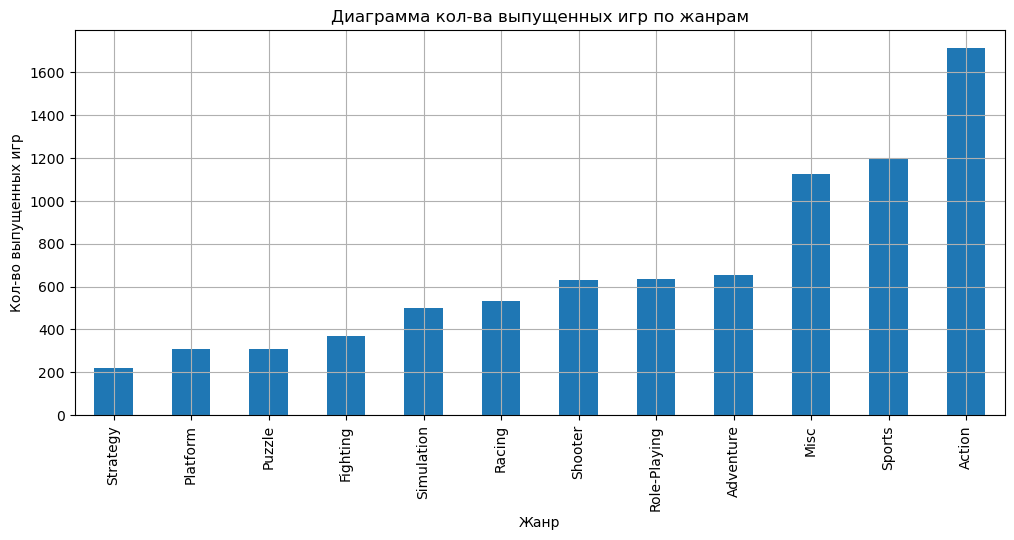

In [122]:
# посчитаем кол-во выпущенных игр разных жанров
data_filtered.groupby('genre')['name'].count().sort_values().plot(grid = True, kind = 'bar', figsize = (12,5))

plt.ylabel('Кол-во выпущенных игр')
plt.xlabel('Жанр')
plt.title("Диаграмма кол-ва выпущенных игр по жанрам")
plt.show()

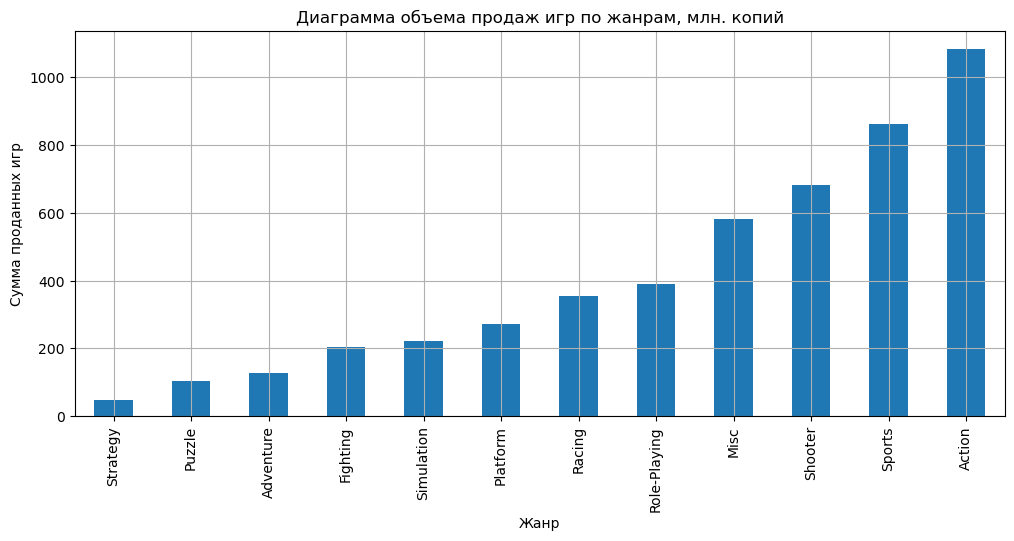

In [123]:
# посчитаем продажи выпущенных игр разных жанров
data_filtered.groupby('genre')['total_sales'].sum().sort_values().plot(grid = True, kind = 'bar', figsize = (12,5))

plt.ylabel('Сумма проданных игр')
plt.xlabel('Жанр')
plt.title("Диаграмма объема продаж игр по жанрам, млн. копий")
plt.show()

Больше всего выпущено игр и больше всего продано в жанрах Спорт и Экшн. На третьем месте по кол-ву выпущенных игр и на 4-ом по
объему продаж - игры жанра Misc - это прочие игры, не вошедшие в другие жанры, с англ. miscellaneous - прочие.
Третий жанр по объему продаж - "стрелялки" - Shooter. 
Приключенческий жанр - Adventure имеет много выпущенных игр, но среди пользователей один из наименее популярных.

**Можно посчитать коэффициент востребованности - соотношение количества проданных копий к количеству выпущенных игр. Чем выше данный коэффициент тем больше продаж на одну выпущенную игру жанра и тем жанр как будто бы более дефицитный, более востребован.**

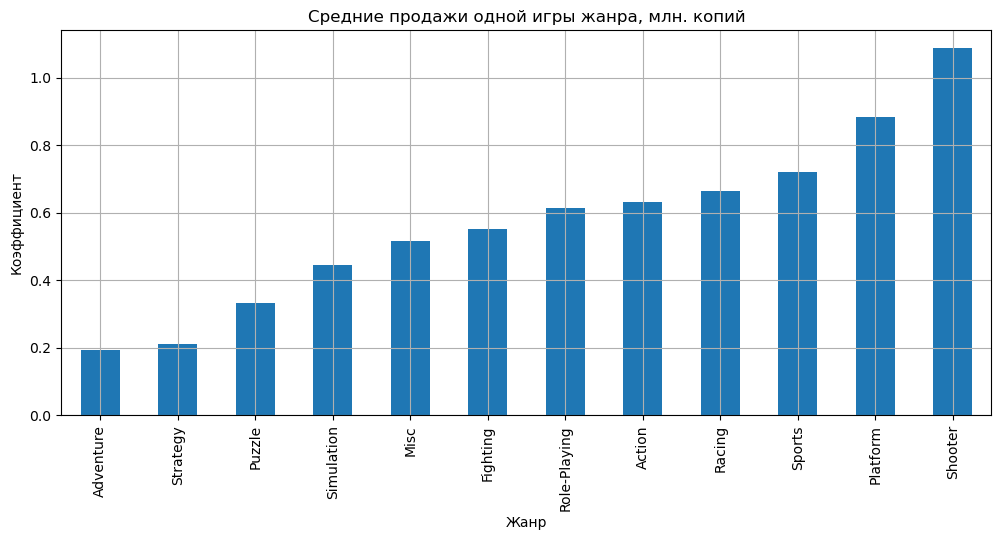

In [124]:
ratio = data_filtered.groupby('genre')['total_sales'].sum() / data_filtered.groupby('genre')['name'].count()
ratio.sort_values().plot(grid = True, kind = 'bar', figsize = (12,5))

plt.ylabel('Коэффициент')
plt.xlabel('Жанр')
plt.title("Средние продажи одной игры жанра, млн. копий")
plt.show()

Так как продажи в таблице в млн. проданных копий, то данные на графике - это среднее кол-во продаж в млн. игр каждого жанра.
* То есть игра жанра "Shooter" продается в среднем в количестве около 1,1 млн. копий. Самый востребованный жанр.
* Следом идет жанр "Платформер" - "Platform". Суть таких игр заключается в прохождении препятсвий и чаще всего в ходе прыжков, движений на различных платформах. (https://gamersgate.ru/reviews/zhanr-kompyuternykh-igr-platfo/)
* Затем с небольшим отрывом друг от друга идут игры жанров "Sports","Racing","Action","Role-Playing", "Fighting".
* На графике коэффициента и на графике объема продаж игры жанров "Puzzle","Strategy","Adventure" на последних местах. Эти игры пользуются наименьшим спросом.

В таком случае для дальнейшего анализа можно ограничиться списком жанров:"Racing", "Action", "Role-Playing", "Fighting", "Shooter", "Platform", "Sports".

#### Посмотрим на  популярность жанров по разным платформам
<a id='popularity'></a>

Для анализа будем использовать датасет отфильтрованный по объему продаж, так как нам интересны те игры, которые продаются лучше всего.
Возьмем для анализа жанров три платформы: "X360", "PS4" и "PS3". Из платформ с наибольшим количеством продаж они самые молодые, а значит лучше всего отражают текущие предпочтения потребителя в плане жанров.

**Начнем с "PS3" как с самой современной приставки с большим объемом продаж.**

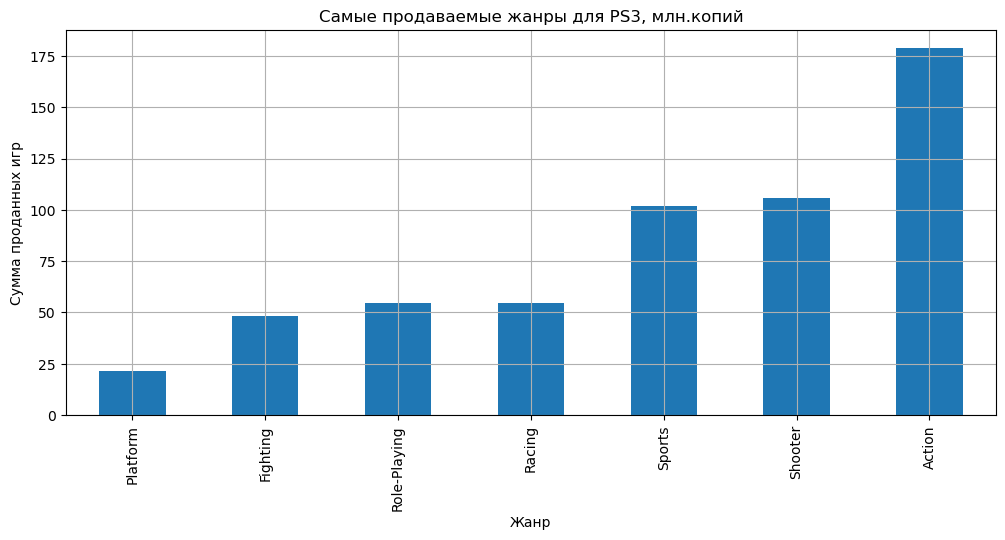

In [125]:
PS3_data_filtered.query(
    'genre in ["Racing","Action","Role-Playing", "Fighting","Shooter","Platform","Action","Sports"]').groupby(
    'genre')['total_sales'].sum().sort_values().plot(
                    grid = True, kind = 'bar', figsize = (12,5))

plt.ylabel('Сумма проданных игр')
plt.xlabel('Жанр')
plt.title("Самые продаваемые жанры для PS3, млн.копий")
plt.show()

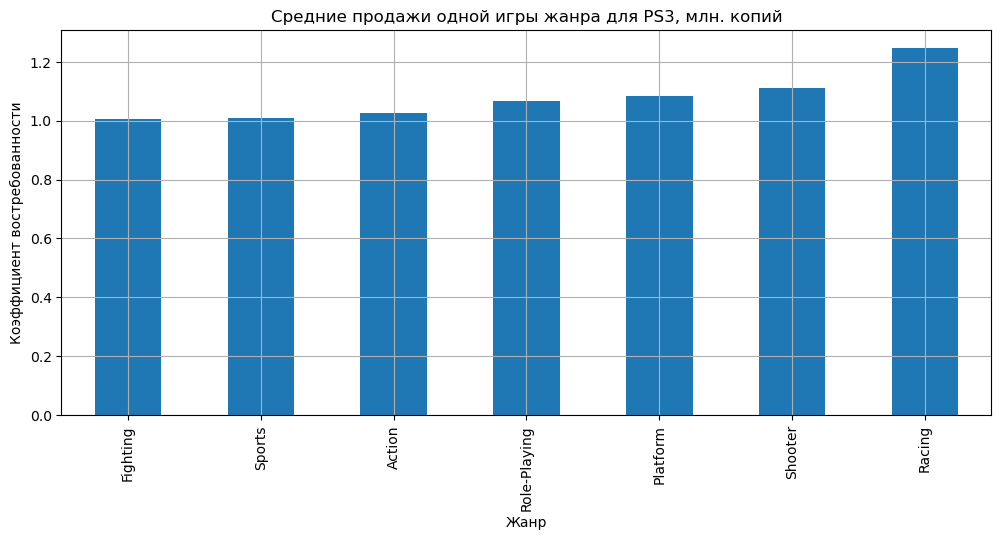

In [126]:
PS3_ratio = PS3_data_filtered.query(
    'genre in ["Racing","Action","Role-Playing", "Fighting","Shooter","Platform","Action","Sports"]').groupby(
    'genre')['total_sales'].sum() / PS3_data_filtered.query(
    'genre in ["Racing","Action","Role-Playing", "Fighting","Shooter","Platform","Action","Sports"]').groupby(
    'genre')['name'].count()

PS3_ratio.sort_values().plot(grid = True, kind = 'bar', figsize = (12,5))

plt.ylabel('Коэффициент востребованности')
plt.xlabel('Жанр')
plt.title("Средние продажи одной игры жанра для PS3, млн. копий")
plt.show()

По коэффициенту востребованности все жанры продаются примерно одинаково, только "Racing" продаются немного получше.
По объемам продаж с запасом лидирует "Action". Далее "Shooter" и "Sports", а потом все остальные.

**PS4**

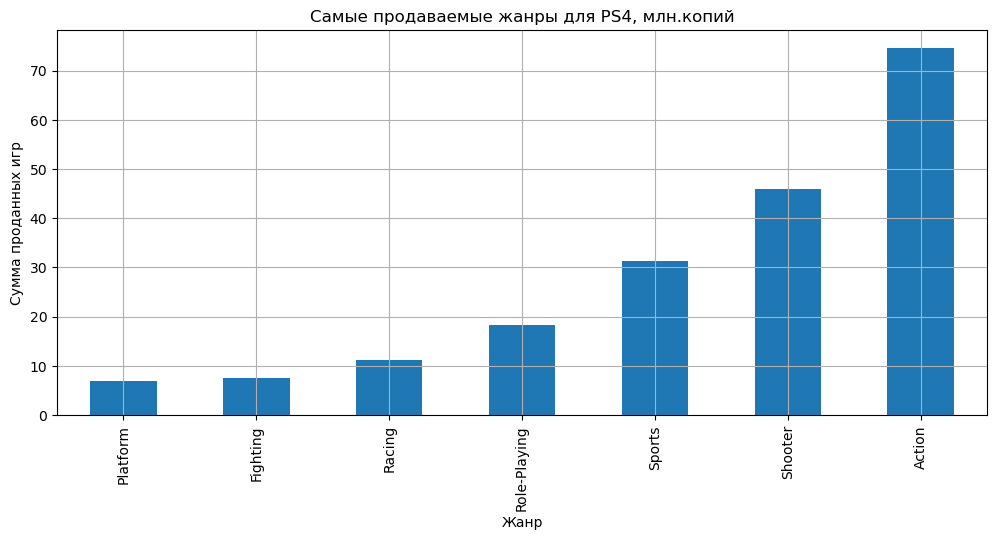

In [127]:
PS4_data_filtered = data_filtered.query('platform == "PS4" and 0.3<total_sales<5')

PS4_data_filtered.query(
    'genre in ["Racing","Action","Role-Playing", "Fighting","Shooter","Platform","Action","Sports"]').groupby(
    'genre')['total_sales'].sum().sort_values().plot(
                    grid = True, kind = 'bar', figsize = (12,5))

plt.ylabel('Сумма проданных игр')
plt.xlabel('Жанр')
plt.title("Самые продаваемые жанры для PS4, млн.копий")
plt.show()

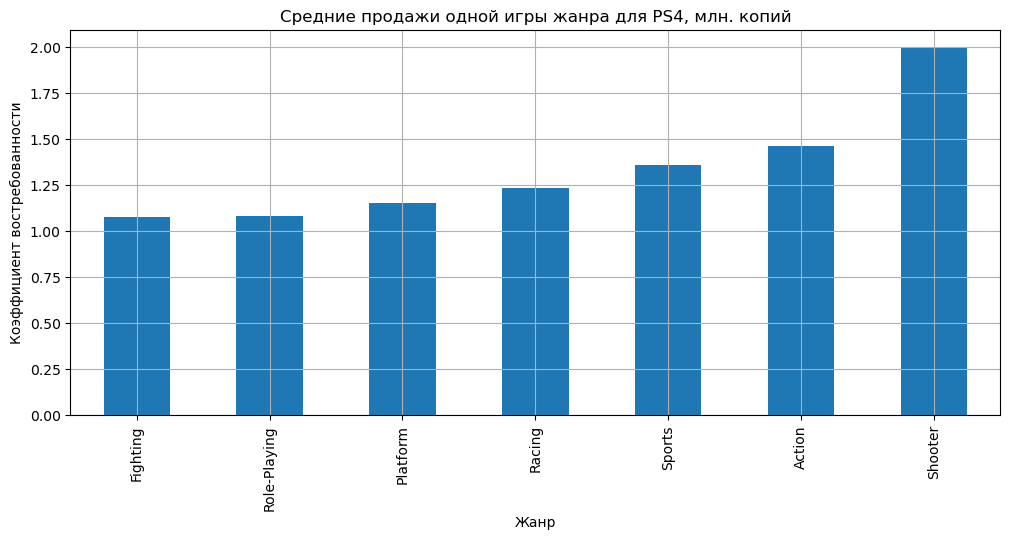

In [128]:
PS4_ratio = PS4_data_filtered.query(
    'genre in ["Racing","Action","Role-Playing", "Fighting","Shooter","Platform","Action","Sports"]').groupby(
    'genre')['total_sales'].sum() / PS4_data_filtered.query(
    'genre in ["Racing","Action","Role-Playing", "Fighting","Shooter","Platform","Action","Sports"]').groupby(
    'genre')['name'].count()

PS4_ratio.sort_values().plot(grid = True, kind = 'bar', figsize = (12,5))

plt.ylabel('Коэффициент востребованности')
plt.xlabel('Жанр')
plt.title("Средние продажи одной игры жанра для PS4, млн. копий")
plt.show()

По коэффициенту востребованности и по объемам продаж лидируют и выделяются "Shooter" и "Action". 

**X360**

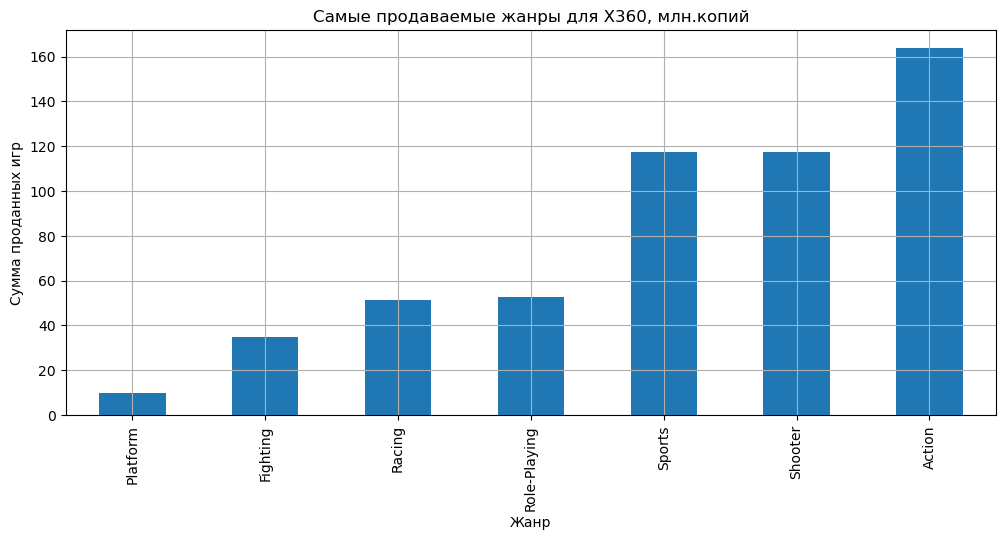

In [129]:
X360_data_filtered = data_filtered.query('platform == "X360" and 0.3<total_sales<5')

X360_data_filtered.query(
    'genre in ["Racing","Action","Role-Playing", "Fighting","Shooter","Platform","Action","Sports"]').groupby(
    'genre')['total_sales'].sum().sort_values().plot(
                    grid = True, kind = 'bar', figsize = (12,5))

plt.ylabel('Сумма проданных игр')
plt.xlabel('Жанр')
plt.title("Самые продаваемые жанры для X360, млн.копий")
plt.show()

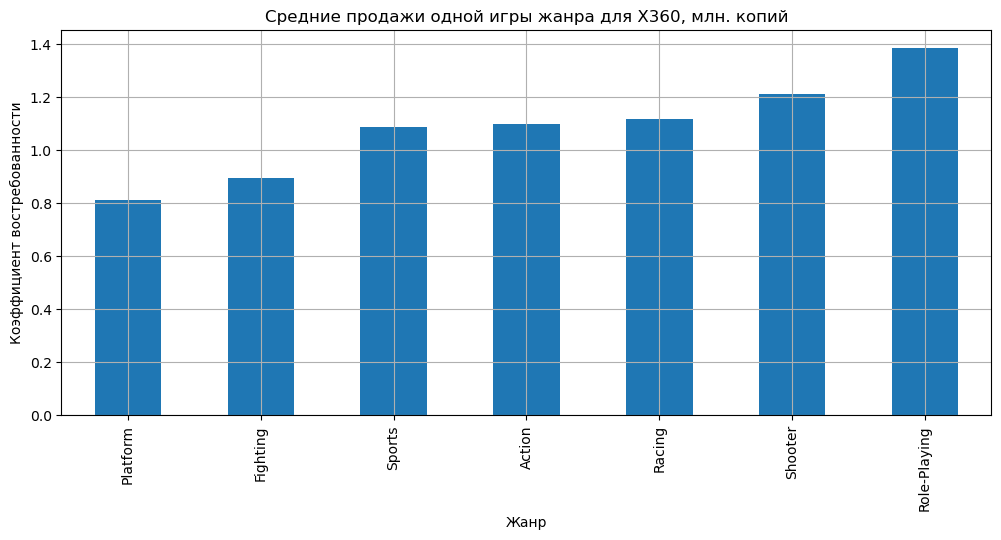

In [130]:
X360_ratio = X360_data_filtered.query(
    'genre in ["Racing","Action","Role-Playing", "Fighting","Shooter","Platform","Action","Sports"]').groupby(
    'genre')['total_sales'].sum() / X360_data_filtered.query(
    'genre in ["Racing","Action","Role-Playing", "Fighting","Shooter","Platform","Action","Sports"]').groupby(
    'genre')['name'].count()

X360_ratio.sort_values().plot(grid = True, kind = 'bar', figsize = (12,5))

plt.ylabel('Коэффициент востребованности')
plt.xlabel('Жанр')
plt.title("Средние продажи одной игры жанра для X360, млн. копий")
plt.show()

По объемам продаж лидируют "Action", "Shooter", "Sports". При этом по коэффициенту заметно лучше всех выглядит жанр "Role-Playing".

**Общий вывод по подразделу:**
* У всех трех приставок в продажах лидируют жанры "Action", "Shooter", "Sports".
* У "PS3" отношение суммы продаж к количеству игр внутри жанра по всем жанрам примерно одинаковое, ни один жанр не выделяется.
* У "PS4" жанры Action", "Shooter", "Sports" показывают наибольшие значения кол-ва проданных копий на одну игру.
* У "X360" в коэффициенте востребованности неожиданно лидирует "Role-Playing", но продажи этот жанр показывает маленькие. Поэтому,возможно, там есть небольшой незакртый спрос. Все остальные жанры имеют примерно одинаковые коэффициенты. 

В таком случае наши лидеры по востребованности и популярности жанры "Action", "Shooter", "Sports". Кстати, игры именно этих жанров показывают наибольшие продажи, если не делать разбивку по платформам.

#### Посмотрим как у жанров распределены оценки критиков
<a id='critic_distribution'></a>

Для этого возьмем жанры "Action", "Shooter", "Sports", платформы "PS3", "PS4", "X360", а продажи каждой игры в диапазоне от 0.3 до 5 млн. экземлпяров. То есть продажи и платформы берем самые популярные, чтобы захватить как можно больше релевантных данных. Период оставляем с 2002 года.

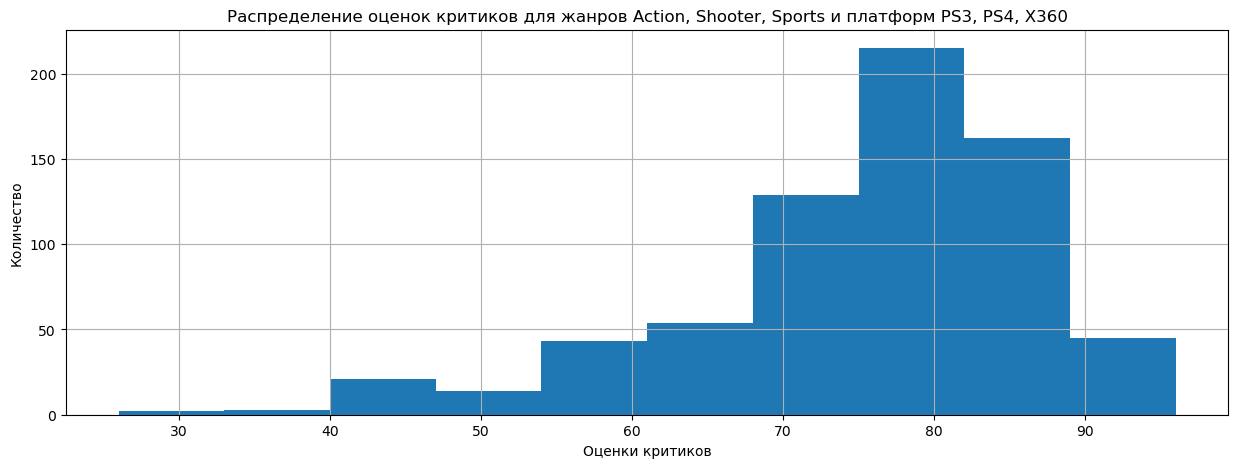

In [131]:
plt.figure(figsize=(15, 5))

(data_filtered.query(
'genre in ["Action","Shooter","Sports"] and platform in ["PS3","PS4","X360"] and 0.3<total_sales<5')
["critic_score"].hist())
plt.title("Распределение оценок критиков для жанров Action, Shooter, Sports и платформ PS3, PS4, X360")
plt.xlabel('Оценки критиков')
plt.ylabel('Количество')
plt.show()

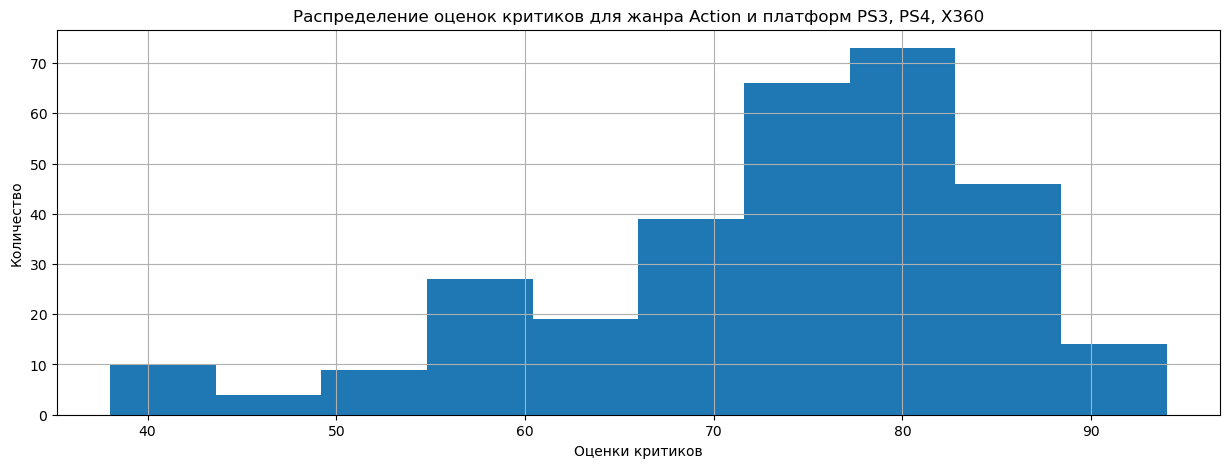

In [132]:
plt.figure(figsize=(15, 5))

data_filtered.query(
'genre in ["Action"] and platform in ["PS3", "PS4", "X360"]and 0.3<total_sales<5')["critic_score"].hist()
plt.title("Распределение оценок критиков для жанра Action и платформ PS3, PS4, X360")
plt.xlabel('Оценки критиков')
plt.ylabel('Количество')
plt.show()

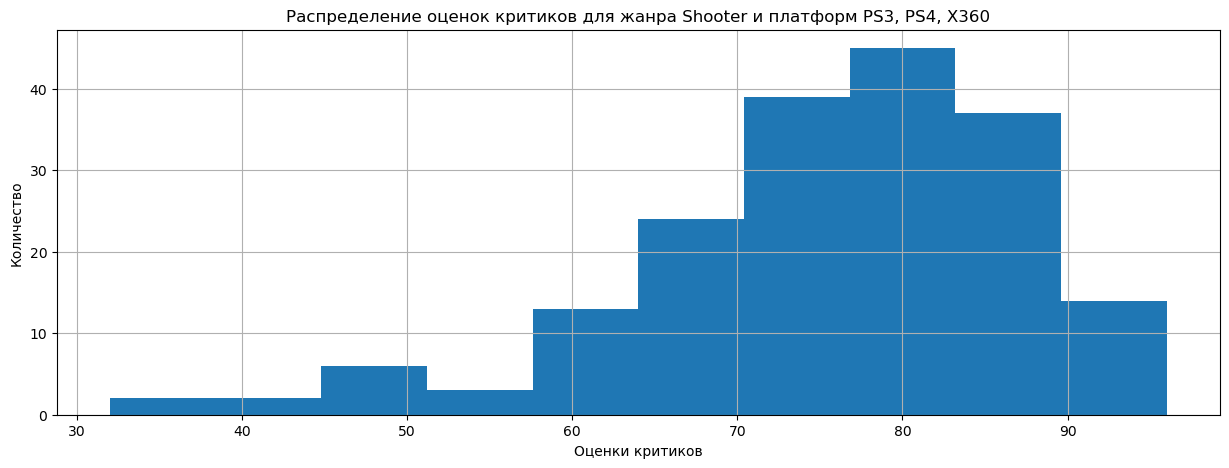

In [133]:
plt.figure(figsize=(15, 5))

data_filtered.query(
'genre in ["Shooter"] and platform in ["PS3", "PS4", "X360"]and 0.3<total_sales<5')["critic_score"].hist()
plt.title("Распределение оценок критиков для жанра Shooter и платформ PS3, PS4, X360")
plt.xlabel('Оценки критиков')
plt.ylabel('Количество')
plt.show()

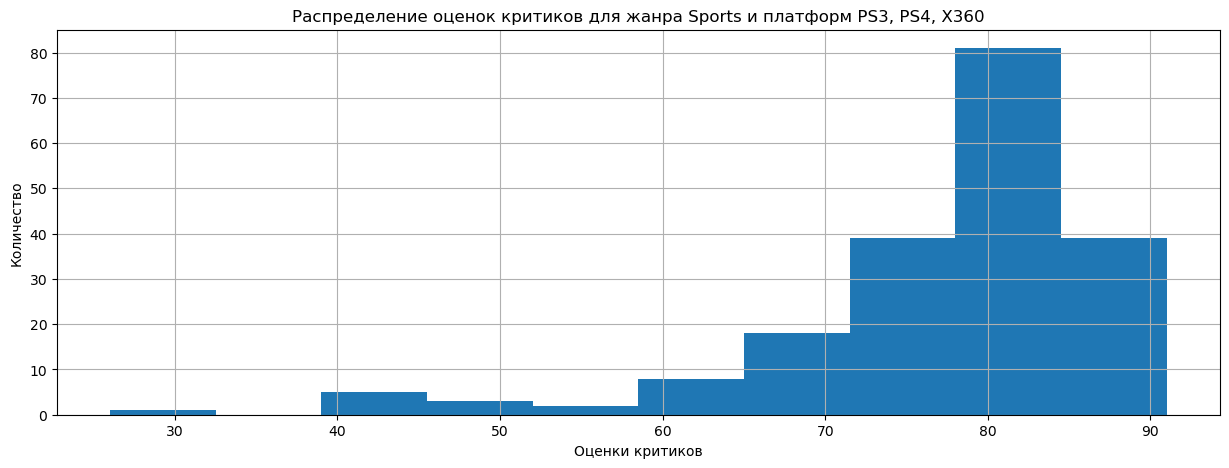

In [134]:
plt.figure(figsize=(15, 5))

data_filtered.query(
'genre in ["Sports"] and platform in ["PS3", "PS4", "X360"]and 0.3<total_sales<5')["critic_score"].hist()
plt.title("Распределение оценок критиков для жанра Sports и платформ PS3, PS4, X360")
plt.xlabel('Оценки критиков')
plt.ylabel('Количество')
plt.show()

По всем распределениям можно увидеть, что везде есть длинный хвост с оценками ниже от 30 до 60, но в то же время основная масса значений от 70 и выше.

Проверим гипотезы, что средние оценки критиков равны в каждом жанре в нашей отфильтрованной выборке.

Для этого заполним пропуски в оценке критиков "заглушкой", которая будет равна значению 200.

In [135]:
warnings.filterwarnings("ignore")

action_pvalue = data_filtered.query(
    'genre == "Action" and platform in ["PS3", "PS4", "X360"]and 0.3<total_sales<5')
action_pvalue['critic_score'] = action_pvalue['critic_score'].fillna(200)

shooter_pvalue = data_filtered.query(
    'genre == "Shooter" and platform in ["PS3", "PS4", "X360"]and 0.3<total_sales<5')
shooter_pvalue['critic_score'] = shooter_pvalue['critic_score'].fillna(200)

sports_pvalue = data_filtered.query(
    'genre == "Sports" and platform in ["PS3", "PS4", "X360"]and 0.3<total_sales<5')
sports_pvalue['critic_score'] = sports_pvalue['critic_score'].fillna(200)

Начнем с нулевой гипотезы - средние оценки критиков для жанров "Action" и "Shooter" равны. Альтернативная гипотеза: средние оценки критиков для жанров "Action" и "Shooter" не равны.

In [136]:
action_critic = action_pvalue.loc[action_pvalue['critic_score']!=200]['critic_score']

shooter_critic = shooter_pvalue.loc[shooter_pvalue['critic_score']!=200]['critic_score']

alpha = 0.05

results = st.ttest_ind(action_critic, shooter_critic, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.024950882867134302
Отвергаем нулевую гипотезу


Следующая нулевая гипотеза - средние оценки для жанров "Sports" и "Shooter" равны. Альтернативная гипотеза: средние не равны.

In [137]:
sports_critic = sports_pvalue.loc[sports_pvalue['critic_score']!=200]['critic_score']

shooter_critic = shooter_pvalue.loc[shooter_pvalue['critic_score']!=200]['critic_score']

alpha = 0.05

results = st.ttest_ind(sports_critic, shooter_critic, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.15562567183432008
Не получилось отвергнуть нулевую гипотезу


Следующая нулевая гипотеза - средние оценки для жанров "Sports" и "Action" равны. Альтернативная гипотеза: средние не равны.

In [138]:
sports_critic = sports_pvalue.loc[sports_pvalue['critic_score']!=200]['critic_score']

alpha = 0.05

results = st.ttest_ind(sports_critic, action_critic, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.553169262459207e-05
Отвергаем нулевую гипотезу


Мы проверили гипотезы о равенстве оценок критиков. Получаем, что нельзя однозначно утверждать, что оценки критиков в среднем одинаковые для жанров "Action" и "Sports", а также "Action" и "Shooter". Вероятность получить одинаковые средние на наших выборках оказалось достаточно мала, чтобы так утверждать.\
При этом вероятность получить одинаковые средние оценки критиков на выборках с жанрами "Sports" и "Shooter" оказалась около 15.5%. Это достаточно много, поэтому мы не отвергаем гипотезу и предполагаем, что средние могут быть одинаковыми.

Такой вывод может свидетельствовать о том, что критики примерно одинаково хорошо относятся к жанрам "Sports" и "Shooter".

Ранее мы заметили, что основная масса оценок критиков выше 70. Посмотрим, где доля таких оценок выше. 

In [139]:
action_data = data_filtered.query(
    'genre == "Action" and platform in ["PS3", "PS4", "X360"]and 0.3<total_sales<5')
action_data.loc[action_data['critic_score']>70,'critic_score'].count() / action_data['critic_score'].count()

0.6840390879478827

In [140]:
shooter_data = data_filtered.query(
    'genre == "Shooter" and platform in ["PS3", "PS4", "X360"]and 0.3<total_sales<5')
shooter_data.query('critic_score>70')['critic_score'].count() / shooter_data['critic_score'].count()

0.7297297297297297

In [141]:
sports_data = data_filtered.query(
    'genre == "Sports" and platform in ["PS3", "PS4", "X360"]and 0.3<total_sales<5')
sports_data.query('critic_score>70')['critic_score'].count() / sports_data['critic_score'].count()

0.8214285714285714

Получаем, что доля высоких оценок выше всего у игр на спортивную тематику.

**Выводы по разделу 3:**


* Для анализа влияния разных закономерностей на успешность игры решено выбрать период с 2002 по 2016 год. В случае необоходимости рассмотреть самые актуальные данные можно брать период 2015-2016.

* В среднем новые платформы появляются каждый год.

* Средний срок жизни игровой платформы - это 7.5 года.

* Выбраны следующие платформы, как самые успешные: "PS4","DS","PS3","X360","PS2","Wii".

* Для того, чтобы продолжить анализ для платформ "PS4","DS","PS3","X360","PS2" можно установить диапазон от 0.3 млн. до 5 млн. проданных копий как диапазон успешных продаж. Для платформы "Wii" диапазон 0.3 млн. до 10 млн. копий.

* У продаж как в разбивке по регионам, так и без нее нет линейной связи с оценкой пользователя.

* Прослеживается линейная связь продаж с оценкой критиков. 

* Наиболее сильно связь с оценкой критиков видна в продажах в Северной Америке.

* Для "X360" и "PS4" добавляется наблюдение, что продажи в других регионах (за пределами Европы и Японии) коррелируют с оценками критиков также или чуть лучше, чем в Северной Америке.

* Получается, что в регионах под названием "другие" оценка критиков начала влиять на продажи в последние годы. Ведь "X360", "PS4" и "PS3" - это самые новые платформы.

* У всех трех приставок "X360", "PS4" и "PS3" в продажах лидируют жанры "Action", "Shooter", "Sports".

* У "PS3" отношение суммы продаж игр жанра к количеству игр внутри жанра по всем жанрам примерно одинаковое, ни один жанр не выделяется.

* У "PS4" жанры Action", "Shooter", "Sports" показывают наибольшие значения кол-ва проданных копий на одну игру.

* У "X360" по коэффициенту востребованности неожиданно лидирует "Role-Playing", но продажи этот жанр показывает маленькие. Поэтому,возможно, там есть небольшой незакртый спрос. Все остальные жанры имеют примерно одинаковые коэффициенты. 

* Нельзя однозначно утверждать, что оценки критиков в среднем одинаковые для жанров "Action" и "Sports", а также "Action" и "Shooter". Вероятность получить одинаковые средние на наших выборках оказалось достаточно мала, чтобы так утверждать.

* Вероятность получить одинаковые средние оценки критиков на выборках с жанрами "Sports" и "Shooter" оказалась около 15.5%. Это достаточно много, поэтому мы не отвергаем гипотезу и предполагаем, что средние оценки критиков могут быть одинаковыми.

* Такой вывод может свидетельствовать о том, что критики примерно одинаково хорошо относятся к жанрам "Sports" и "Shooter".

* Доля оценок критиков выше 70 баллов больше всего у игр на спортивную тематику. Составляет более 82%.

### Составим портрет пользователя каждого региона (для пользователя регионов NA, EU, JP):
<a id='portrait'></a>

Сперва посмотрим, где продают больше, а где меньше за период с 2002 года.

In [142]:
data.query('2002 <= year_of_release').pivot_table(
    index = 'year_of_release', values = ['na_sales','eu_sales','jp_sales','other_sales'], aggfunc ='sum').sort_values(
    by = 'year_of_release', ascending = False)

,eu_sales,jp_sales,na_sales,other_sales
year_of_release,,,,
2016,51.22,19.31,44.93,14.48
2015,96.72,34.09,106.86,30.31
2014,122.74,39.69,132.27,36.83
2013,121.55,47.69,153.65,38.35
2012,114.59,51.80,153.26,36.19
2011,162.97,53.07,238.79,52.75
2010,171.42,59.49,300.65,58.57
2009,187.94,61.89,335.55,73.44
2008,181.14,60.25,348.69,81.42


Видно, что за исключением 2016 года Северная Америка показывала наибольшие продажи, далее идет Европа и затем Япония. Но в Северной Америке продажи заметно просели за последние годы. В категории регионов "другие" продажи сопоставимы с одной Японией.

#### Найдем самые популярные платформы (топ-5). Опишем различия в долях продаж
<a id='top_platforms'></a>

Наиболее популярные платформы мы уже находили, но без разбивки по регионам. Самые популярные: "PS4","DS","PS3","X360","PS2","Wii".
Теперь тоже самое найдем в разбивке по регионам. Сперва возьмем период с 2002 года, а затем с 2015-2016 для оценки последних тенденций.

 Сделаем таблицы с долями продаж для каждой платформы ко всем продажам в регионе.

In [143]:
na_2002_platform = data.query('2002 <= year_of_release').pivot_table(
    index = 'platform', values = ['na_sales'], aggfunc ='sum').sort_values(
    by = 'na_sales', ascending = False) / data.query('2002 <= year_of_release')['na_sales'].sum()*100

eu_2002_platform = data.query('2002 <= year_of_release').pivot_table(
    index = 'platform', values = ['eu_sales'], aggfunc ='sum').sort_values(
    by = 'eu_sales', ascending = False) / data.query('2002 <= year_of_release')['eu_sales'].sum()*100

jp_2002_platform = data.query('2002 <= year_of_release').pivot_table(
    index = 'platform', values = ['jp_sales'], aggfunc ='sum').sort_values(
    by = 'jp_sales', ascending = False) / data.query('2002 <= year_of_release')['jp_sales'].sum()*100

na_2002_platform.join([eu_2002_platform,jp_2002_platform], how='left')

,na_sales,eu_sales,jp_sales
platform,,,
X360,18.267901,13.845558,1.677601
Wii,14.929488,13.329549,9.312729
PS2,14.637564,13.912640,15.122956
PS3,11.963031,16.884337,10.830753
DS,11.661909,9.722129,23.868302
XB,5.050703,2.827214,0.137754
GBA,4.533091,3.026394,5.332861
GC,3.527305,1.729663,2.385466
PS4,3.334427,7.280374,2.176789


In [144]:
eu_2015_platform = data.query('2015 <= year_of_release').pivot_table(
    index = 'platform', values = 'eu_sales', aggfunc ='sum').sort_values(
    by = 'eu_sales', ascending = False) / data.query('2015 <= year_of_release')['eu_sales'].sum()*100

na_2015_platform = data.query('2015 <= year_of_release').pivot_table(
    index = 'platform', values = 'na_sales', aggfunc ='sum').sort_values(
    by = 'na_sales', ascending = False) / data.query('2015 <= year_of_release')['na_sales'].sum()*100

jp_2015_platform = data.query('2015 <= year_of_release').pivot_table(
    index = 'platform', values = 'jp_sales', aggfunc ='sum').sort_values(
    by = 'jp_sales', ascending = False) / data.query('2015 <= year_of_release')['jp_sales'].sum()*100

na_2015_platform.join([eu_2015_platform,jp_2015_platform], how='left')

,na_sales,eu_sales,jp_sales
platform,,,
PS4,42.071283,56.468839,22.565543
XOne,33.137888,18.994187,0.337079
3DS,6.792279,4.995268,44.101124
WiiU,5.837012,4.386914,7.715356
X360,5.303380,2.845748,0.000000
PS3,3.728836,4.934433,9.307116
PC,2.450754,6.151142,0.000000
PSV,0.355755,0.730026,15.749064
Wii,0.322814,0.493443,0.000000


**Для наглядного понимания последних тенденций можно построить круговую диаграмму по данным за 2015-2016 года.**

In [145]:
eu_2015_platform.loc['Other', 'eu_sales'] = eu_2015_platform.iloc[5:].sum()[0]
eu_2015_platform = eu_2015_platform.drop(['WiiU','X360','PSV','Wii','PSP'])

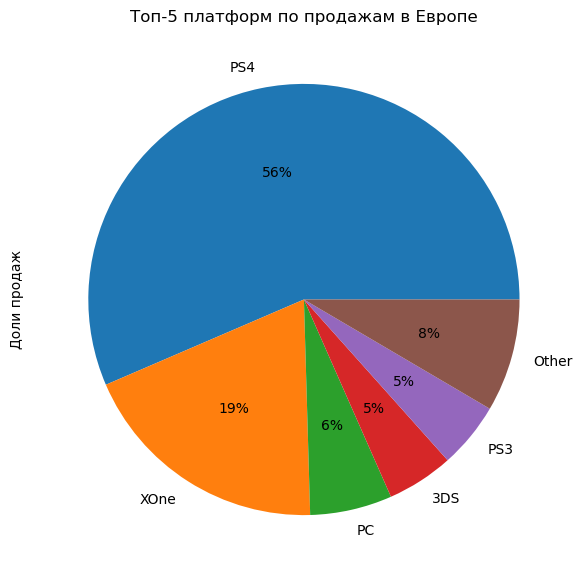

In [146]:
eu_2015_platform.plot(kind = 'pie', y='eu_sales', legend = False, autopct = '%.0f%%',figsize=(7,7))

plt.title("Топ-5 платформ по продажам в Европе")
plt.ylabel("Доли продаж")
plt.show()

In [147]:
na_2015_platform.loc['Other', 'na_sales'] = na_2015_platform.iloc[5:].sum()[0]
na_2015_platform = na_2015_platform.drop(['PS3','PC','PSV','Wii','PSP'])

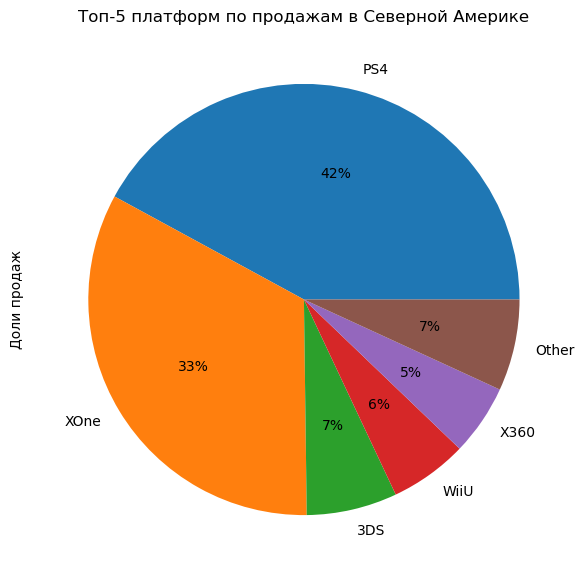

In [148]:
na_2015_platform.plot(kind = 'pie', y='na_sales', legend = False, autopct = '%.0f%%',figsize=(7,7))

plt.title("Топ-5 платформ по продажам в Северной Америке")
plt.ylabel("Доли продаж")
plt.show()

In [149]:
jp_2015_platform.loc['Other', 'jp_sales'] = jp_2015_platform.iloc[5:].sum()[0]
jp_2015_platform = jp_2015_platform.drop(['XOne','PSP','PC','Wii','X360'])

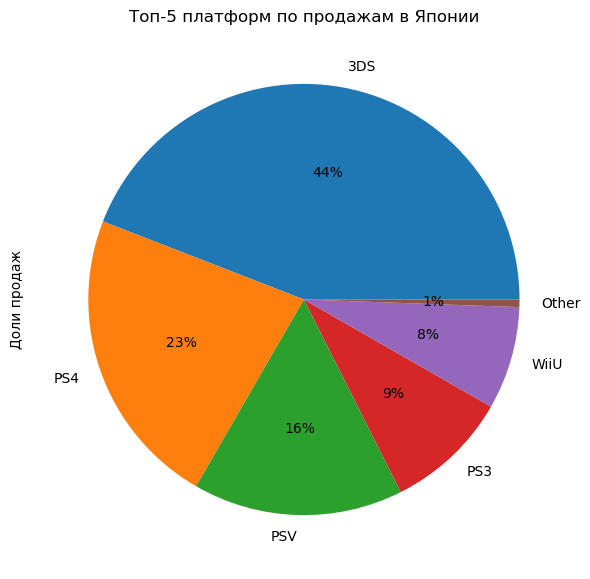

In [150]:
jp_2015_platform.plot(kind = 'pie', y='jp_sales', legend = False, autopct = '%.0f%%',figsize=(7,7))

plt.title("Топ-5 платформ по продажам в Японии")
plt.ylabel("Доли продаж")
plt.show()

В Японии наиболее популярные игровыми платформами за период с 2002 года были: DS, PS2, 3DS, PS3, PSP. Это сильно расходится рейтингом по остальным странам.\
В Европе наиболее популярные игровыми платформами за период с 2002 года были: PS3, PS2, X360, Wii, DS. Также как в Северной Америке, только места другие.\
Северная Америка: X360, Wii, PS3, PS2, DS. 

За период с 2015 по 2016 год лидерами среди игровых платформ в Европе были: PS4, XOne, PC, 3DS, PS3.\
За период с 2015 по 2016 год лидерами среди приставок в Северной Америке были: PS4, XOne, 3DS, WiiU, X360.\
За период с 2015 по 2016 год лидерами среди игровых платформ в Японии были: 3DS, PS4, PSV, PS3, WiiU.

Получается, что в США и Европе более схожие предпочтения по платформам за оба периода.
В Японии значительные отличия от двух других регионов.

Всего по всем регионам за период с 2002 года такие платформы были в топ 5: "PS3", "PS2", "X360", "Wii", "DS", "3DS", "PSP".
Последние две только за счет Японии.

Всего по всем регионам за период с 2015 по 2016 год такие платформы были в топ 5: "PS4", "XOne", "PC", "3DS", "PS3", "WiiU", "X360", "PSV".\
При этом "PSV" только за счет Японии, а "X360" только за счет Северной Америки.\
**Значит "PS4", "XOne", "3DS" - это наиболее популярные платформы.** "PS4", "XOne" самые популярные в Европе и Северной Америке, где продаж больше, чем в Японии. "3DS" самая популярная платформа одновременно в Японии и занимает долю 7% и 5% в Северной Америке и Европе.

####  Выведем топ-5 самых популярных жанров
**Аналогичным образом посмотрим данные за период с 2002 года и построим круговую диаграмму по данным за 2015-2016 года.**
<a id='famous_genres'></a>

Самые популярные жанры для всех регионов мы уже изучали.
Теперь посмотрим в разбивке по регионам. Сделаем таблицы с долями продаж для каждого жанра ко всем продажам в регионе.

In [151]:
na_2002_genre = data.query('2002 <= year_of_release').pivot_table(
    index = 'genre', values = ['na_sales'], aggfunc ='sum').sort_values(
    by = 'na_sales', ascending = False) / data.query('2002 <= year_of_release')['na_sales'].sum()*100

eu_2002_genre = data.query('2002 <= year_of_release').pivot_table(
    index = 'genre', values = ['eu_sales'], aggfunc ='sum').sort_values(
    by = 'eu_sales', ascending = False) / data.query('2002 <= year_of_release')['eu_sales'].sum()*100

jp_2002_genre = data.query('2002 <= year_of_release').pivot_table(
    index = 'genre', values = ['jp_sales'], aggfunc ='sum').sort_values(
    by = 'jp_sales', ascending = False) / data.query('2002 <= year_of_release')['jp_sales'].sum()*100

na_2002_genre.join([eu_2002_genre,jp_2002_genre], how='left')

,na_sales,eu_sales,jp_sales
genre,,,
Action,21.608154,22.523285,16.707811
Sports,16.492443,16.288862,8.949931
Shooter,14.599847,14.672721,3.075601
Misc,10.676361,9.677752,11.102170
Role-Playing,8.206971,7.602879,29.509404
Racing,7.111339,8.649862,3.081057
Platform,6.993588,6.385098,6.706311
Simulation,4.622937,5.138419,4.790027
Fighting,4.350946,3.261178,5.334224


In [152]:
eu_2015_genre = data.query('2015 <= year_of_release').pivot_table(
    index = 'genre', values = 'eu_sales', aggfunc ='sum').sort_values(
    by = 'eu_sales', ascending = False) / data.query('2015 <= year_of_release')['eu_sales'].sum()*100

na_2015_genre = data.query('2015 <= year_of_release').pivot_table(
    index = 'genre', values = 'na_sales', aggfunc ='sum').sort_values(
    by = 'na_sales', ascending = False) / data.query('2015 <= year_of_release')['na_sales'].sum()*100

jp_2015_genre = data.query('2015 <= year_of_release').pivot_table(
    index = 'genre', values = 'jp_sales', aggfunc ='sum').sort_values(
    by = 'jp_sales', ascending = False) / data.query('2015 <= year_of_release')['jp_sales'].sum()*100

na_2015_genre.join([eu_2015_genre,jp_2015_genre], how='left')

,na_sales,eu_sales,jp_sales
genre,,,
Shooter,31.741221,27.227254,7.097378
Action,22.188550,23.536569,43.164794
Sports,17.333158,18.804921,3.089888
Role-Playing,13.057514,11.633094,25.112360
Misc,3.676131,2.879546,5.973783
Fighting,3.649779,2.514533,2.883895
Adventure,2.529811,3.156685,4.157303
Platform,2.490283,2.163039,2.659176
Racing,1.857830,4.407192,0.543071


**Для наглядного понимания последних тенденций можно построить круговую диаграмму по данным за 2015-2016 года.**

In [153]:
eu_2015_genre.loc['Other', 'eu_sales'] = eu_2015_genre.iloc[5:].sum()[0]
eu_2015_genre = eu_2015_genre.drop(eu_2015_genre.iloc[5:-1].index)

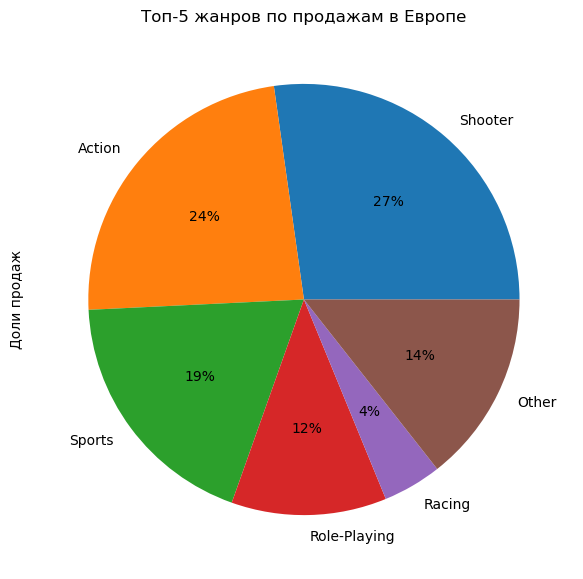

In [154]:
eu_2015_genre.plot(kind = 'pie', y='eu_sales', legend = False, autopct = '%.0f%%',figsize=(7,7))

plt.title("Топ-5 жанров по продажам в Европе")
plt.ylabel("Доли продаж")
plt.show()

In [155]:
na_2015_genre.loc['Other', 'na_sales'] = na_2015_genre.iloc[5:].sum()[0]
na_2015_genre = na_2015_genre.drop(na_2015_genre.iloc[5:-1].index)

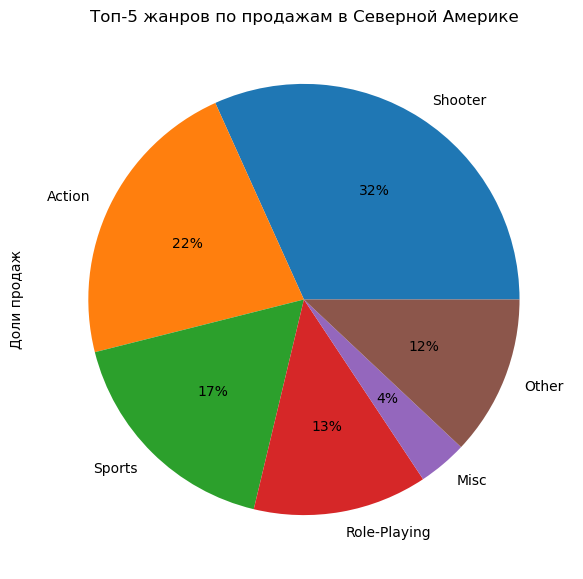

In [156]:
na_2015_genre.plot(kind = 'pie', y='na_sales', legend = False, autopct = '%.0f%%',figsize=(7,7))

plt.title("Топ-5 жанров по продажам в Северной Америке")
plt.ylabel("Доли продаж")
plt.show()

In [157]:
jp_2015_genre.loc['Other', 'jp_sales'] = jp_2015_genre.iloc[5:].sum()[0]
jp_2015_genre = jp_2015_genre.drop(jp_2015_genre.iloc[5:-1].index)

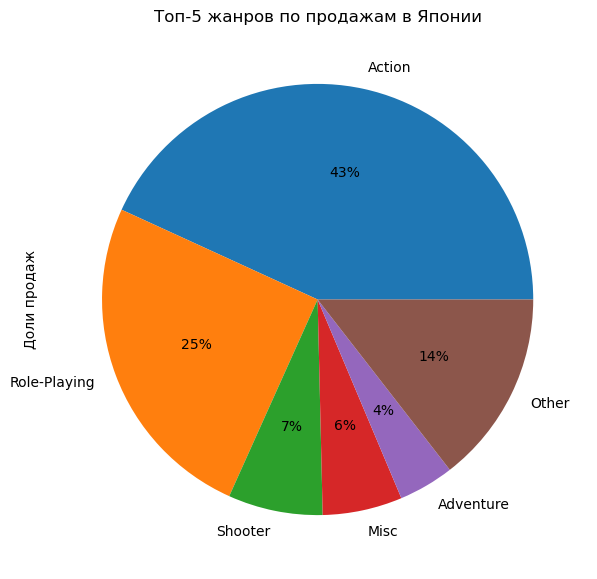

In [158]:
jp_2015_genre.plot(kind = 'pie', y='jp_sales', legend = False, autopct = '%.0f%%',figsize=(7,7))

plt.title("Топ-5 жанров по продажам в Японии")
plt.ylabel("Доли продаж")
plt.show()

В Северной Америке и Европе за период с 2002 по 2016 год наиболее популярными были жанры: Action, Sports, Shooter, Misc, Role-Playing.\
В Японии те же жанры, но в другом порядке: Role-Playing, Action, Misc, Sports, Platform. Только вместо Shooter игры жанра Platform.\
То есть если всего взять все регионы, то получим такие популярные жанры:Action, Sports, Shooter, Misc, Role-Playing, Platform.

В период с 2015 по 2016 год Европе и Северной Америке, первые 4 места были те же, что в 2002-2016, но немного в ином порядке: Shooter, Action, Sports, Role-Playing. На 5-ом месте в США был жанр Misc (прочие), а в Европе Racing.\
В Японии первые пять жанров по популярности выглядели так: Action, Role-Playing, Shooter, Misc, Adventure. Нет жанра Sports, как в Европе и Северной Америке.\
То есть если взять все регионы, то получим такие популярные жанры:Shooter, Action, Sports, Role-Playing, Misc, Adventure.

Ранее мы проводили ислледование по популярным жанрам без разбивки по регионам, и пришли к выводы, что саме большие и самые эффективные продажи(по коэффициенту востребованности) показывают жанры: "Action", "Shooter", "Sports". В целом, выводы совпадают с данными текущего раздела.
В этом разделе в популярных жанрах также видим "Misc", "Adventure", "Role-Playing". Но у этих жанров коэффициент востребованности в разбивке по всем популярным платформам ниже, чем у "Action", "Shooter", "Sports".\
Жанр "Adventure" попал в рейтинг топовых жанров только за счет Японии. Поэтому его рассматривать стоит только если ориентироваться сугубо на этот рынок.\
Жанр "Misc" - это прочие жанры, не попавшие в другие, и тут тяжело определить, что под этим подразумевается, плюс к тому доля этого жанра от общих продаж везде мала, поэтому по-настоящему топовым этот жанр считать не стоит.\
**И того, мы получаем, что по-настоящему на популярность кроме "Action", "Shooter", "Sports" может претендовать "Role-Playing".**

#### Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе?
<a id='ESRB'></a>

Посмотрим какие у нас есть рейтинги. Для этого проанализируем данные с 2002 года. Данных только за 2015-2016 год мало.

In [159]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Можно таким образом описать рейтинги:

In [160]:
ratigs_descript = pd.DataFrame(
    {
        "rating_name": ['E', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'],
        "description": ["Everyone - все возрасты","Mature - лица от 17 лет", "Teen - лица от 13 лет",\
                        "Everyone 10 and older - все старше 10","Adults Only 18+","Early childhood - дети от 3-ех лет",\
                       "Rating Pending - рейтинг ожидается"],
    }
)
ratigs_descript

,rating_name,description
0,E,Everyone - все возрасты
1,M,Mature - лица от 17 лет
2,T,Teen - лица от 13 лет
3,E10+,Everyone 10 and older - все старше 10
4,AO,Adults Only 18+
5,EC,Early childhood - дети от 3-ех лет
6,RP,Rating Pending - рейтинг ожидается


In [161]:
na_2002_rating = data.query('2002 <= year_of_release').pivot_table(
    index = 'rating', values = ['na_sales'], aggfunc ='sum').sort_values(
    by = 'na_sales', ascending = False) / data.query('2002 <= year_of_release')['na_sales'].sum()*100

eu_2002_rating = data.query('2002 <= year_of_release').pivot_table(
    index = 'rating', values = ['eu_sales'], aggfunc ='sum').sort_values(
    by = 'eu_sales', ascending = False) / data.query('2002 <= year_of_release')['eu_sales'].sum()*100

jp_2002_rating = data.query('2002 <= year_of_release').pivot_table(
    index = 'rating', values = ['jp_sales'], aggfunc = 'sum').sort_values(
    by = 'jp_sales', ascending = False) / data.query('2002 <= year_of_release')['jp_sales'].sum()*100

# na_2002_rating.join([eu_2002_rating,jp_2002_rating], how='left')

In [162]:
display(jp_2002_rating)
display(eu_2002_rating)
na_2002_rating

,jp_sales
rating,
E,23.920130
T,15.588047
M,7.288697
E10+,5.482890
AO,0.000000
EC,0.000000
RP,0.000000


,eu_sales
rating,
E,32.517351
M,23.537759
T,18.498413
E10+,9.459996
AO,0.031477
EC,0.005676
RP,0.001548


,na_sales
rating,
E,34.937890
M,21.433981
T,19.932355
E10+,10.594487
EC,0.046916
AO,0.038637
RP,0.000000


По Японии вовсе нет данных о продажах игр с рейтингами: 'AO', 'EC', 'RP' или такие игры там не продавались. В Европе и Северной Америке таких продаж почти нет, какие-то микро доли в общих продажах.\
В остальном разбивка продаж по рейтингам одинаковая. Чаще всего продают игры с рейтингом 'E' - все возрасты, затем 'M' - лица от 17 лет и затем 'T' - лица от 13 лет. И на 4-ом месте игры с рейтингом 'E10+'.\
Но примерно треть столбца в исходных данных с рейтингами - это пропуски - NaN. Поэтому, вполне возможно, что при полных данных, к примеру, игры с рейтингом 'T' могли бы быть популярнее игр 'M' или было бы больше данных о рейтингах 'AO', 'EC', 'RP'.

Так как ранее мы выяснили, что критики имеют влияние на покупки, то посмотрим, какие медианные оценки у критиков в каждов жанре и каждом рейтинге. Жанры берем только "Action", "Shooter", "Sports", "Role-Playing" как самые интересные для потребителя.

In [163]:
genre_rating_score = data.query(
    '2002 <= year_of_release and genre in ["Action", "Shooter", "Sports", "Role-Playing"]').groupby(
           ['genre','rating']).agg(
    critic_median = pd.NamedAgg(column = 'critic_score', aggfunc='median'),
    critic_count = pd.NamedAgg(column = 'critic_score', aggfunc='count'))

#выберем те значения, где кол-во оценок критиков более 30
genre_rating_score[genre_rating_score['critic_count']>30]

critic_median  critic_count
genre        rating                             
Action       E                63.0           267
             E10+             66.0           364
             M                74.0           543
             T                65.0           591
Role-Playing E                69.0            66
             E10+             70.0           105
             M                78.0           145
             T                74.0           349
Shooter      E10+             69.0            40
             M                75.0           512
             T                70.0           287
Sports       E                76.0           830
             E10+             72.5            90
             T                69.0           112

Получаем, что медианные оценки критиков достаточно ровно распределены по жанрам и рейтингам ESRB. Все оценки в диапазоне от 63 до 78.

Тройка самых высокий значений:
* Жанр "Role-Playing" - рейтинг "M" - 78.
* Жанр "Sports" - рейтинг "E" - 76.
* Жанр "Shooter" - рейтинг "M" - 75.

In [164]:
genre_rating_score1 = data.query(
    '2015 <= year_of_release and genre in ["Action", "Shooter", "Sports", "Role-Playing"]').groupby(
           ['genre','rating']).agg(
    critic_median = pd.NamedAgg(column = 'critic_score', aggfunc='median'),
    critic_count = pd.NamedAgg(column = 'critic_score', aggfunc='count'))

#выберем те значения, где кол-во оценок критиков более 30
genre_rating_score1[genre_rating_score1['critic_count']>30]

critic_median  critic_count
genre   rating                             
Action  M                74.0            59
        T                73.0            39
Shooter M                77.0            37
Sports  E                83.0            33

Для интереса можно сделать такую же таблицу для периода 2015-2016 годов. Видим, что таких данных очень мало для каких-либо выводов.

**Выводы по разделу 4:**
* Видно, что за исключением 2016 года Северная Америка показывала наибольшие продажи, далее идет Европа и затем Япония. Но в Северной Америке продажи заметно просели с 2009 года и Европа уже начинает перегонять по продажам.
* Популярными во всех регионах жанрами являются "Action", "Shooter", "Sports" и "Role-Playing"
* "PS4", "XOne", "3DS" - это наиболее популярные платформы. "PS4", "XOne" популярны в Европе и Северной Америке, где продаж больше, чем в Японии. "3DS" Популярная платформа одновременно в Северной Америке, Японии и Европе.
* Игры с рейтингами "E","M","T" продаются лучше всего. "E" - Everyone - все возрасты, "M" - Mature - лица от 17 лет, "T" - Teen - лица от 13 лет.
* По Японии вовсе нет данных о продажах игр с рейтингами: 'AO', 'EC', 'RP' или такие игры там не продавались. В Европе и Северной Америке таких продаж почти нет, какие-то микро доли в общих продажах.
* В Северной Америке и Европе тройка лучших по продажам рейтингов с 1 по 3 место выглядит так: "E","M","T".
* В Японии тройка лучших по продажам рейтингов с 1 по 3 место выглядит так: "E","T","M".
* Медианные оценки критиков достаточно ровно распределены по жанрам и рейтингам ESRB. Все оценки в диапазоне от 63 до 78.
* Тройка самых высокий значений:\
Жанр "Role-Playing" - рейтинг "M" - 78.\
Жанр "Sports" - рейтинг "E" - 76.\
Жанр "Shooter" - рейтинг "M" - 75.

### Проверим гипотезы

#### Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
**Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны.**

Традиционно выберем временной диапазон с 2002 года.

In [165]:
data_hypothesis = data.query('2002 <= year_of_release and platform in ["XOne", "PC"]')

Сделаем "заглушки" для пропусков в оценках пользователей.

In [166]:
data_hypothesis['user_score'] = data_hypothesis['user_score'].fillna(200)

In [167]:
data_hypothesis['user_score'].unique()

array([  7.6, 200. ,   7.3,   7.9,   5.4,   4. ,   8.2,   6.4,   6.2,
         8.1,   8. ,   4.1,   5.5,   7.5,   4.4,   7.2,   7.8,   3.9,
         5.9,   4.3,   3.1,   6.1,   9.1,   7.4,   6.9,   5.6,   6.6,
         8.6,   4.8,   6.3,   2.5,   5.3,   6.8,   5.8,   9. ,   4.2,
         7. ,   2.2,   6. ,   9.2,   8.4,   8.5,   5.1,   5.2,   6.7,
         7.7,   8.9,   5.7,   8.8,   9.3,   8.3,   6.5,   4.5,   3.6,
         4.6,   3. ,   4.7,   7.1,   3.2,   2.1,   8.7,   3.7,   5. ,
         3.5,   3.3,   4.9,   3.8,   2.9,   3.4,   2.8,   1.6,   1.4,
         2.4], dtype=float32)

У нас разброс значений ограничен 10. Поэтому он наврядли будет очень большим для оценок для любой платформы. Поэтому можно не указывать, что дисперсии разные.  
Параметр alpha = 5% для такой выборки кажется оптимальным. Так как 10% было бы слишком высоким порогом. Это бы означало, что нужна вероятность получить одинаковые средние выше 10% . Вероятность 9% уже достаточно высокая, но нам бы в таком случае это не подошло. 

In [168]:
x_one_pvalue = (data_hypothesis.loc[(data_hypothesis['platform']=="XOne")&
                                    (data_hypothesis['user_score']!=200)]['user_score'])
pc_pvalue = (data_hypothesis.loc[(data_hypothesis['platform']=="PC")&
                                 (data_hypothesis['user_score']!=200)]['user_score'])

In [169]:
alpha = 0.05
results = st.ttest_ind(x_one_pvalue,pc_pvalue)
print('p-значение:',results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.00010751528691521164
Отвергаем нулевую гипотезу


Значение pvalue ниже порога говорит, о том, что вероятность того, что выборочные средние оказались равны слишком мала. Ниже нашего порога в 5%. Вероятно, гипотеза не верна и средние пользовательские рейтинги Xbox One и PC разные. У нас двусторонняя гипотеза.\
Соотвествтенно, если нулевая гипотеза говорит о равенстве, то альтернативная подразумевает, что средние пользовательские рейтинги не равны.

#### Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.
**Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports одиннаковые.**

In [170]:
data_genre_hypothesis = data.query('2002 <= year_of_release and genre in ["Action", "Sports"]')

In [171]:
data_genre_hypothesis['user_score'] = data_genre_hypothesis['user_score'].fillna(200)

In [172]:
data_genre_hypothesis['user_score'].unique()

array([  8. ,   7.7,   7.4,   8.2,   9. ,   8.1,   8.7,   8.3, 200. ,
         7.9,   7.5,   4.3,   6.6,   7.6,   5. ,   8.8,   6.9,   5.7,
         9.1,   8.9,   8.6,   6.7,   6.1,   5.4,   8.4,   4.5,   9.3,
         4.2,   7.8,   7.2,   6.3,   4.9,   8.5,   6.8,   4.1,   4.4,
         5.9,   6.5,   5.8,   7. ,   5.6,   3.2,   5.5,   6.4,   6.2,
         5.2,   7.1,   5.1,   6. ,   7.3,   3.5,   9.4,   9.2,   3. ,
         2.9,   4.8,   2.7,   2. ,   5.3,   2.8,   4.6,   3.1,   3.3,
         1.6,   4. ,   3.6,   2.1,   3.8,   3.4,   3.7,   2.4,   4.7,
         1.8,   3.9,   1.7,   1.1,   0.3,   9.5,   1.5,   0.7,   2.5,
         2.3,   0.2,   1.4,   1.9,   2.2], dtype=float32)

In [173]:
action_pvalue = data_genre_hypothesis.loc[(
    data_genre_hypothesis['genre']=="Action")&(data_genre_hypothesis['user_score']!=200)]['user_score']
sports_pvalue = data_genre_hypothesis.loc[(
    data_genre_hypothesis['genre']=="Sports")&(data_genre_hypothesis['user_score']!=200)]['user_score']

In [174]:
alpha = 0.05
results = st.ttest_ind(action_pvalue,sports_pvalue)
print('p-значение:',results.pvalue)
if results.pvalue>alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.02185745487571348
Не получилось отвергнуть нулевую гипотезу


Так как наша нулевая гипотеза - это не равенство средних, то надо, чтобы pvalue была меньше alpha, чтобы гипотезу принять, т.е. не отвергнуть. В таком случае вероятность получить на выборке одинаковые средние слишком мала, ниже 5%.\
В нашем случае вероятность равных средних составляет около 2,2%, что слишком мало. Поэтому можно предполагать, что средние пользовательские рейтинги жанров Action и Sports разные.

### Общий вывод

У нас было задание выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Выводы:
* Самые большие продажи в Северной Америке и Европе. Это самые емкие рынки. При этом с 2009 года продажи в обоих региона падают, но в Европе медленнее, поэтому продажи почти сравнялись.
* Следом идет Япония. Продажи в регионе сопоставимы с продажами во всех остальных регионах, которые у нас в столбце "other_sales".
---
* Средний срок жизни одной игровой платформы 7,5 лет. Но новые платформы появляются в среднем каждый год.
* Поэтому наиболее популярные платформы целесообразно посмотреть за последние 2 года (2015,2016).
"PS4", "XOne", "3DS" - это наиболее популярные платформы.\
"PS4", "XOne" самые популярные в Европе и Северной Америке.\
"3DS" самая популярная платформа в Японии и занимает долю 7% и 5% в Северной Америке и Европе.
---
* В Европе и Северной Америке в 2015-2016 годах по популярности с 1 по 5 место жанры расположились таким образом: Shooter, Action, Sports, Role-Playing. На 5-ом месте в США был жанр Misc (прочие), а в Европе Racing, занимая оба долю в 4% в продажах.
* В Японии первые пять жанров по популярности выглядели так: Action, Role-Playing, Shooter, Misc, Adventure. Нет жанра Sports, как в Европе и Северной Америке.
---
* В Северной Америке и Европе за период с 2002 по 2016 год наиболее популярными были жанры: Action, Sports, Shooter, Misc, Role-Playing.
* В Японии почти те же жанры, но в другом порядке: Role-Playing, Action, Misc, Sports, Platform. Только вместо Shooter игры жанра Platform.
* За период с 2002-2016 и 2015-2016 очень похожие результаты в Европе и Северной Америке. Видно, что предпочтения там почти не менялись. В Японии есть изменения, но первые два места все те же  - Role-Playing и Action.
---
* Видим, что по платформам и жанрам в Европе и Северной Америке очень схожие предпочтения. Япония отличается.
---
* Также мы посмотрели на продажи в общем, без разреза по регионам и рассчитали коэффициент востребованности за период с 2002-2016. Коэффициент - это соотношение количества проданных копий к количеству выпущенных игр. Чем выше данный коэффициент тем больше продаж на одну выпущенную игру жанра и тем жанр как будто бы более дефицитный, более востребован. 
* Игра жанра "Shooter" продается в среднем в количестве около 1,1 млн. копий. Самый востребованный жанр.
Следом идет жанр "Платформер" - "Platform". Затем с небольшим отрывом друг от друга идут игры жанров "Sports","Racing","Action","Role-Playing", "Fighting".\
На графике коэффициента и на графике объема продаж игры жанров "Puzzle","Strategy","Adventure" на последних местах. Эти игры пользуются наименьшим спросом.
---
* Для влияния оценки критиков и пользователей на продажи был выбран период с 2002 по 2016 год и самые популярные платформы за этот период, чтобы учесть как можно больше данных. Было выявлено, что нет линейной связи у оценок пользователей и продаж. При этом влияние оценок критиков на продажи заметно.
* Наиболее сильно связь с оценкой критиков видна в продажах в Северной Америке.
* В случае продаж в Северной Америке от 1 млн. копий  оценка критиков выше 70 баллов.
* Для общих продаж по всем ригионам тиражом от 2 млн. копий оценки критиков почти всегда от 60 баллов. 
* Доля оценок критиков выше 70 баллов больше всего у игр на спортивную тематику. Составляет более 82%.
* Мы проверили гипотезы о равенстве оценок критиков для разных жанров. Для этого брали период с 2002 по 2016 год и самые популярные платформы для него, чтобы учесть как можно больше данных.
* Получаем, что нельзя однозначно утверждать, что оценки критиков в среднем одинаковые для жанров "Action" и "Sports", а также "Action" и "Shooter". Вероятность получить одинаковые средние на наших выборках оказалось достаточно мала, чтобы так утверждать.
При этом вероятность получить одинаковые средние оценки критиков на выборках с жанрами "Sports" и "Shooter" оказалась около 15.5%. Это достаточно много, поэтому мы не отвергаем гипотезу и предполагаем, что средние оценки критиков этих жанров могут быть одинаковыми.
* Такой вывод может свидетельствовать о том, что критики примерно одинаково хорошо относятся к жанрам "Sports" и "Shooter".
---
* Игры с рейтингами "E","M","T" продаются лучше всего. "E" - Everyone - все возрасты, "M" - Mature - лица от 17 лет, "T" - Teen - лица от 13 лет.
* По Японии вовсе нет данных о продажах игр с рейтингами: 'AO', 'EC', 'RP' или такие игры там не продавались. В Европе и Северной Америке таких продаж почти нет, какие-то микро доли в общих продажах.
* В Северной Америке и Европе тройка лучших по продажам рейтингов с 1 по 3 место выглядит так: "E","M","T".
* В Японии тройка лучших по продажам рейтингов с 1 по 3 место выглядит так: "E","T","M".
* Медианные оценки критиков достаточно ровно распределены по жанрам и рейтингам ESRB. Все оценки в диапазоне от 63 до 78.
* Тройка самых высокий значений:

Жанр "Role-Playing" - рейтинг "M" - 78.\
Жанр "Sports" - рейтинг "E" - 76.\
Жанр "Shooter" - рейтинг "M" - 75.
* Также как в жанрах и платформах видно, что есть большая схожесть в выводах для Европы и Северной Америки.
---
* В ходе раздела 5 с оценками гипотез не удалось подтвердить гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Такая вероятность очень мала. Поэтому останавливаемся на альтернативное гипотезе - средние пользовательские рейтинги платформ Xbox One и PC разные.
* Также не удалось отвергнуть гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные. В нашем случае вероятность равных средних составляет около 2,2%, что слишком мало. Поэтому можно предполагать, что средние пользовательские рейтинги жанров Action и Sports разные.